In [1]:
import pandas as pd
%pylab inline
import seaborn as sns
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


# Lecture du Dataframe

In [2]:
names = ["Project name", "Region", "OG_01", "Project type", "Operation", "Announcement",
         "Project Status", "Announced capacity (low) (Mt CO2/yr)", "Announced capacity (high) (Mt CO2/yr)",
         "Sector", "Fate of carbon"]


types = [str, str, int, str, str, str, str, float, float, str, str]

data_types = dict()
for key, value in zip(names, types):
    data_types[key] = value

df_iea = pd.read_excel("C:/Users/louis8613/Documents/Analyse_Ambre/20230702_BDD Mémoire.xlsx",
                        sheet_name = "IEA Projects",
                        skiprows = 1,
                        dtype = data_types,
                        usecols = names)

df_iea.head()

Project name        Region  OG_01  \
0                           Yara Sluiskil fertiliser        Europe      0   
1      Yangchang integrated CCUS Yulin Coal Chemical          Asia      1   
2                                   H2Perth Woodside  Asia Pacific      1   
3  Multi-user Burrup CCUS hub and network (Karrat...  Asia Pacific      1   
4                     Woodside Browse CCS Assessment  Asia Pacific      1   

  Project type Announcement Operation Project Status  \
0      Capture         2022      2025        Planned   
1   Full chain         2015      2023        Planned   
2   Full chain         2021       NaN        Planned   
3          T&S         2022       NaN        Planned   
4   Full chain         2022       NaN        Planned   

   Announced capacity (low) (Mt CO2/yr)  \
0                                   0.8   
1                                   0.3   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   Announced capacity (high) (Mt CO2/yr)                     Sector  \
0                                    0.8             Other industry   
1                                    0.3  Other fuel transformation   
2                                    NaN           Hydrogen/ammonia   
3                                    NaN                    CO2 T&S   
4                                    NaN     Natural gas processing   

        Fate of carbon  
0    Dedicated storage  
1                  EOR  
2  Unknown/unspecified  
3    Dedicated storage  
4    Dedicated storage

In [3]:
df_iea.dtypes

Project name                              object
Region                                    object
OG_01                                      int32
Project type                              object
Announcement                              object
Operation                                 object
Project Status                            object
Announced capacity (low) (Mt CO2/yr)     float64
Announced capacity (high) (Mt CO2/yr)    float64
Sector                                    object
Fate of carbon                            object
dtype: object

##### Stats Univariés

- count : Nombre de valeurs renseignés (pas NA)

- unique : Nombre de modalités différentes

- top: Valeur la plus fréquente

- freq : Nombre d'itération de la valeur "top"

In [4]:
df_iea.astype("str").replace("nan", nan).describe()

Project name         Region  \
count                                                 573            571   
unique                                                571              8   
top     CO2TransPorts phase 2 (cross-border pipeline, ...  North America   
freq                                                    2            250   

       OG_01 Project type Announcement Operation Project Status  \
count    573          573          553       388            573   
unique     2            6           21        42              5   
top        0      Capture         2021      2025        Planned   
freq     333          234          190        69            499   

       Announced capacity (low) (Mt CO2/yr)  \
count                                   425   
unique                                  132   
top                                     1.0   
freq                                     24   

       Announced capacity (high) (Mt CO2/yr)          Sector  \
count                                    425             573   
unique                                   145              12   
top                                      2.0  Power and heat   
freq                                      25              83   

           Fate of carbon  
count                 526  
unique                  9  
top     Dedicated storage  
freq                  352

### Affichage des distributions univariées

Objectif: pour l'instant on ne croise pas les données entre elles on se demande juste "Combien de O&G dans la base globale?", "Combien de projets en Amérique?"

On va afficher:

- Stats: nombre de projets dans la classe donnée (classe = modalité de réponse à une question) et pourcentage des projets dans cette modalité
- Histogramme : en abcisses les classes et en ordonnée le nombre de projets par classe. Il s'agit de la meilleure représentation possible des données de ta base

_________Watching at distribution of  Region ___________


1: Stats 




Values  Count  Percentage of total
4                  Africa      2                 0.35
1                    Asia     39                 6.83
2            Asia Pacific     44                 7.71
0                  Europe    216                37.83
5  Europe + North America      1                 0.18
7             Middle East     14                 2.45
3           North America    250                43.78
6           South America      5                 0.88
8                     NaN      0                 0.00

Check sum to 100 --  0.010000000000005116
2: Histogram 




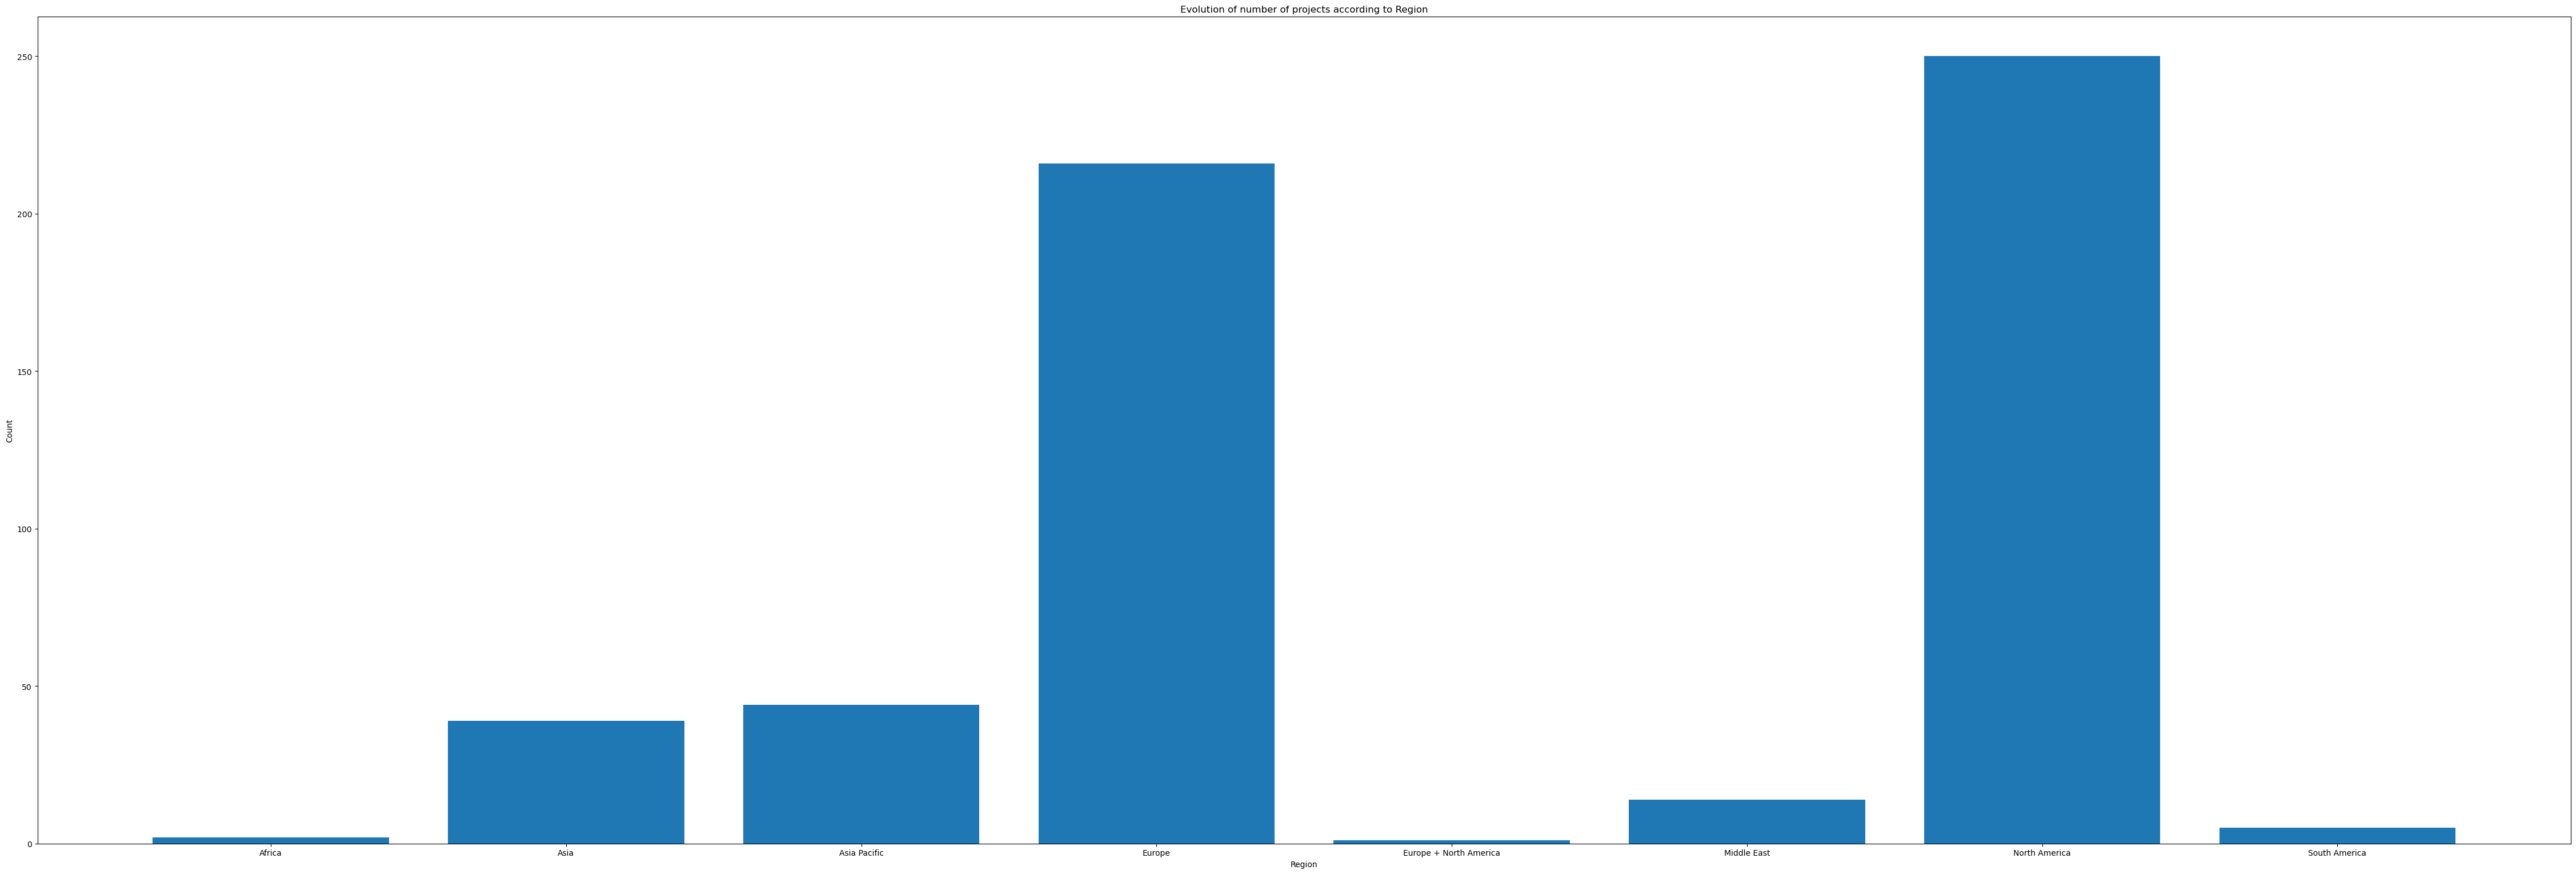

_________Watching at distribution of  OG_01 ___________


1: Stats 




Values  Count  Percentage of total
0       0    333                58.12
1       1    240                41.88

Check sum to 100 --  0.0
2: Histogram 




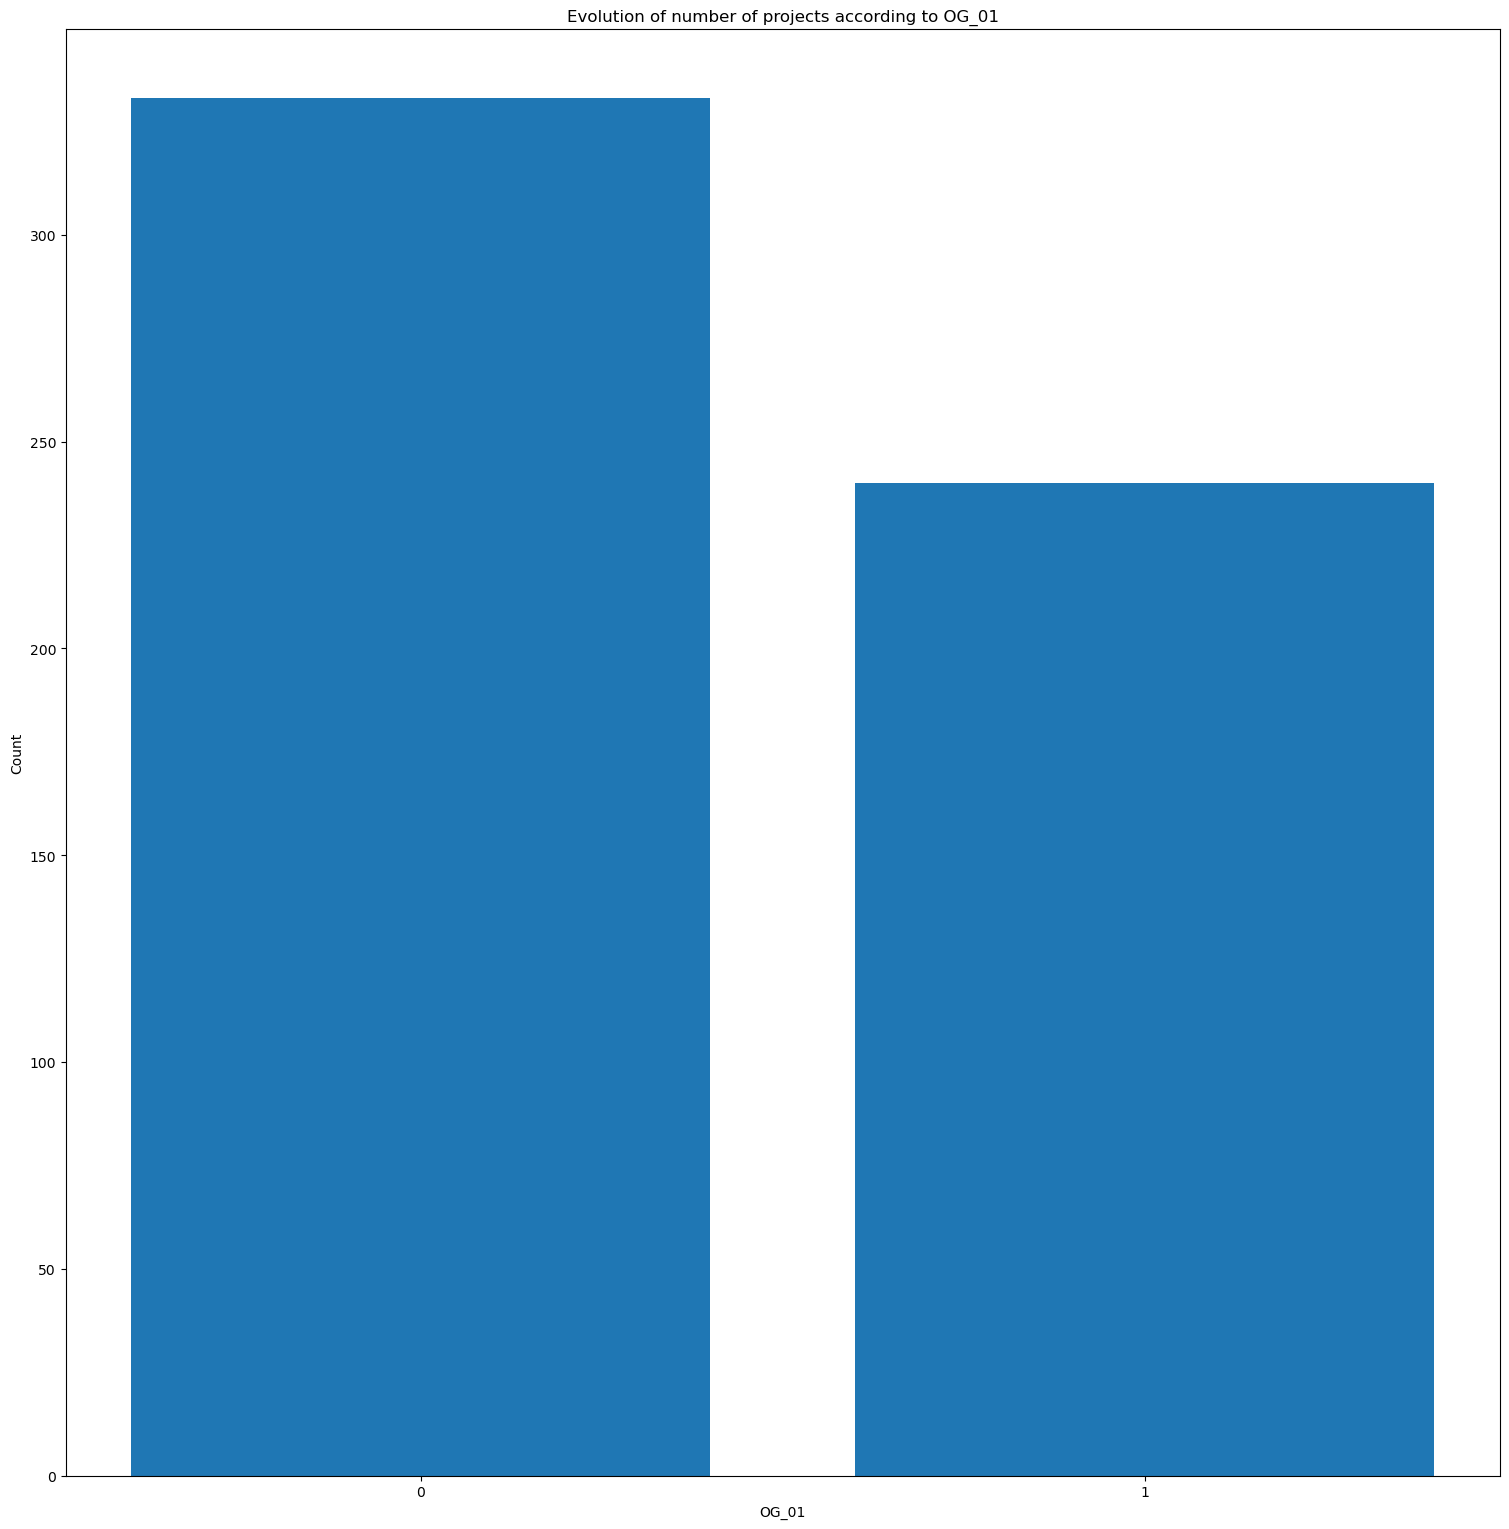

_________Watching at distribution of  Project type ___________


1: Stats 




Values  Count  Percentage of total
5         CCU     32                 5.58
0     Capture    234                40.84
1  Full chain    145                25.31
4     Storage     52                 9.08
2         T&S     64                11.17
3   Transport     46                 8.03

Check sum to 100 --  0.010000000000005116
2: Histogram 




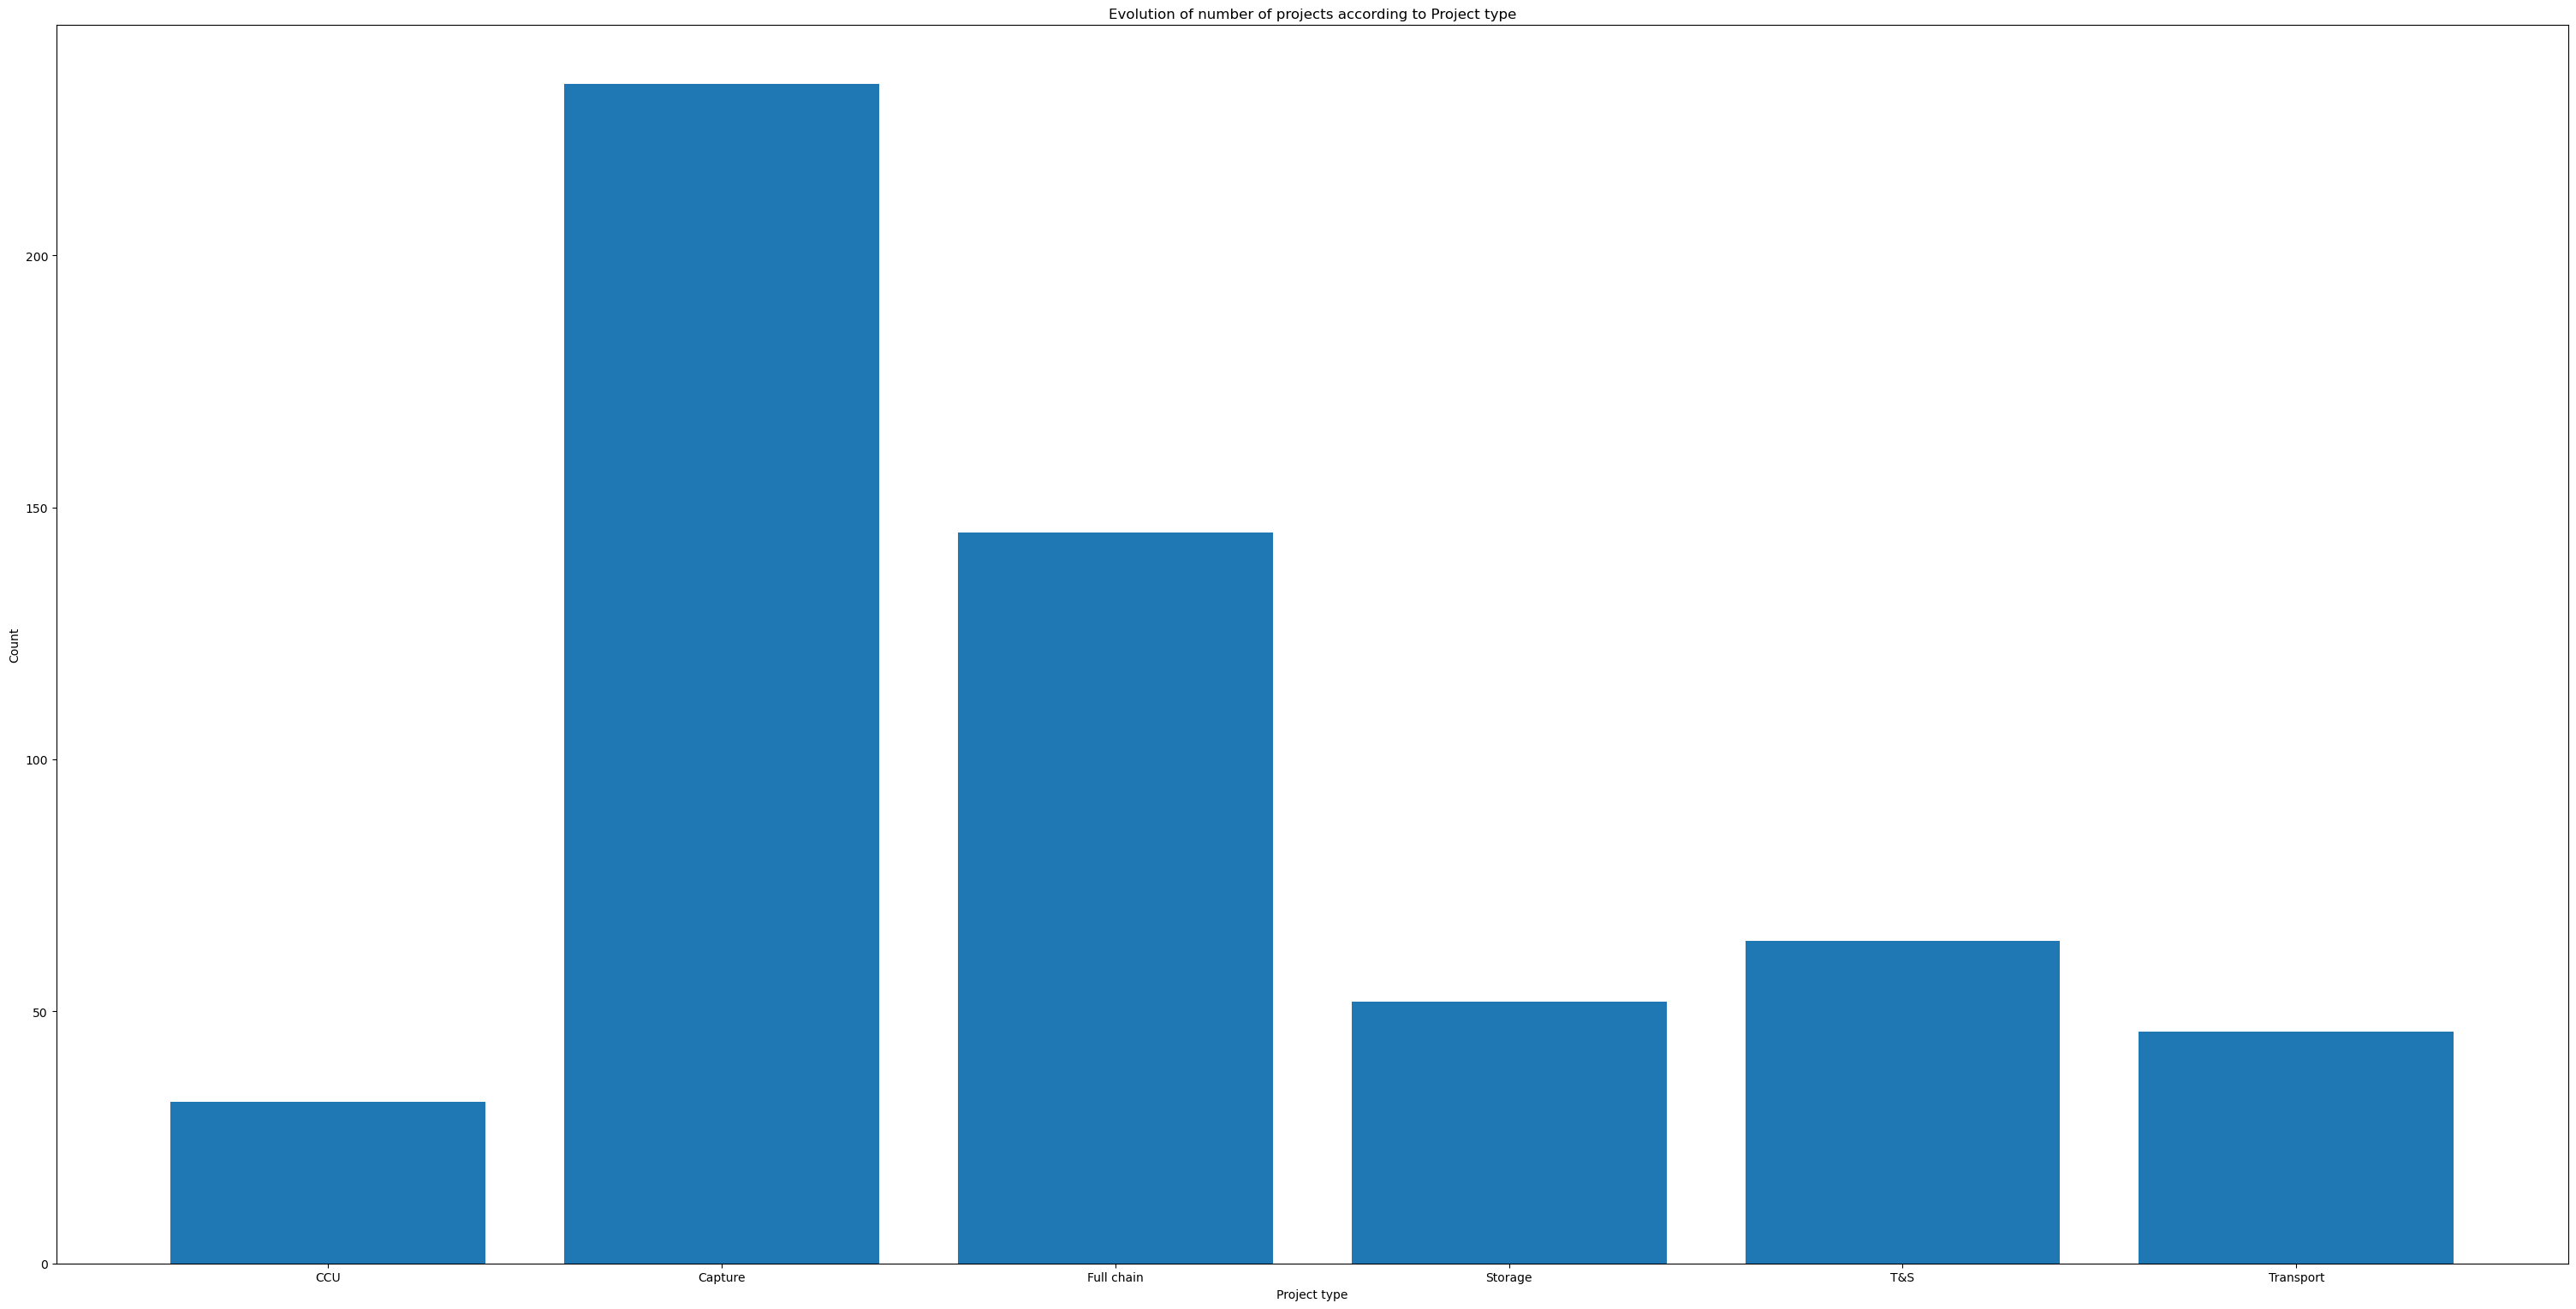

_________Watching at distribution of  Announcement ___________


1: Stats 




Values  Count  Percentage of total
19   1991      1                 0.18
20   1997      1                 0.18
18   2002      1                 0.18
16   2006      1                 0.18
21   2007      1                 0.18
15   2008      4                 0.72
12   2009      7                 1.27
8    2010      5                 0.90
3    2011     10                 1.81
10   2012      3                 0.54
14   2013      5                 0.90
17   2014      1                 0.18
1    2015      2                 0.36
6    2016      8                 1.45
11   2017      7                 1.27
5    2018     22                 3.98
7    2019     35                 6.33
9    2020     47                 8.50
2    2021    190                34.36
0    2022    165                29.84
4    2023     37                 6.69
13    NaN      0                 0.00

Check sum to 100 --  0.0
2: Histogram 




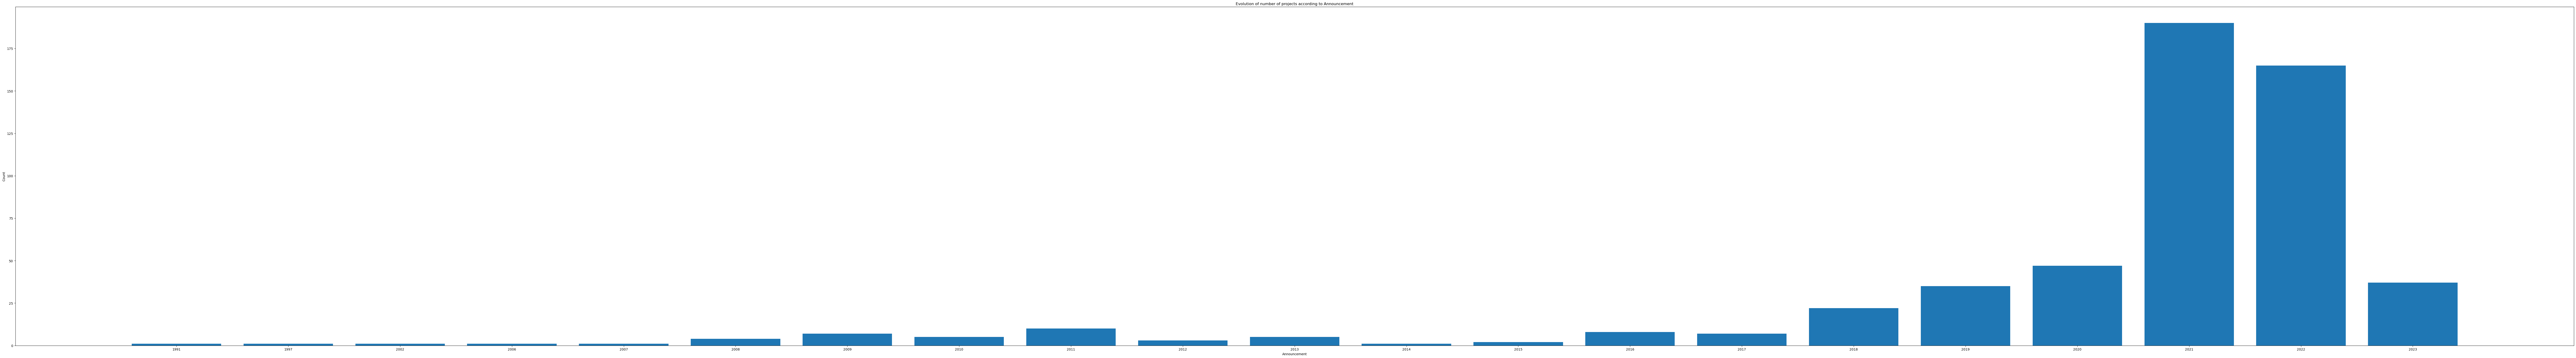

_________Watching at distribution of  Project Status ___________


1: Stats 




Values  Count  Percentage of total
3      Decommissioned      3                 0.52
1         Operational     47                 8.20
0             Planned    499                87.09
4           Suspended      1                 0.17
2  Under construction     23                 4.01

Check sum to 100 --  -0.009999999999990905
2: Histogram 




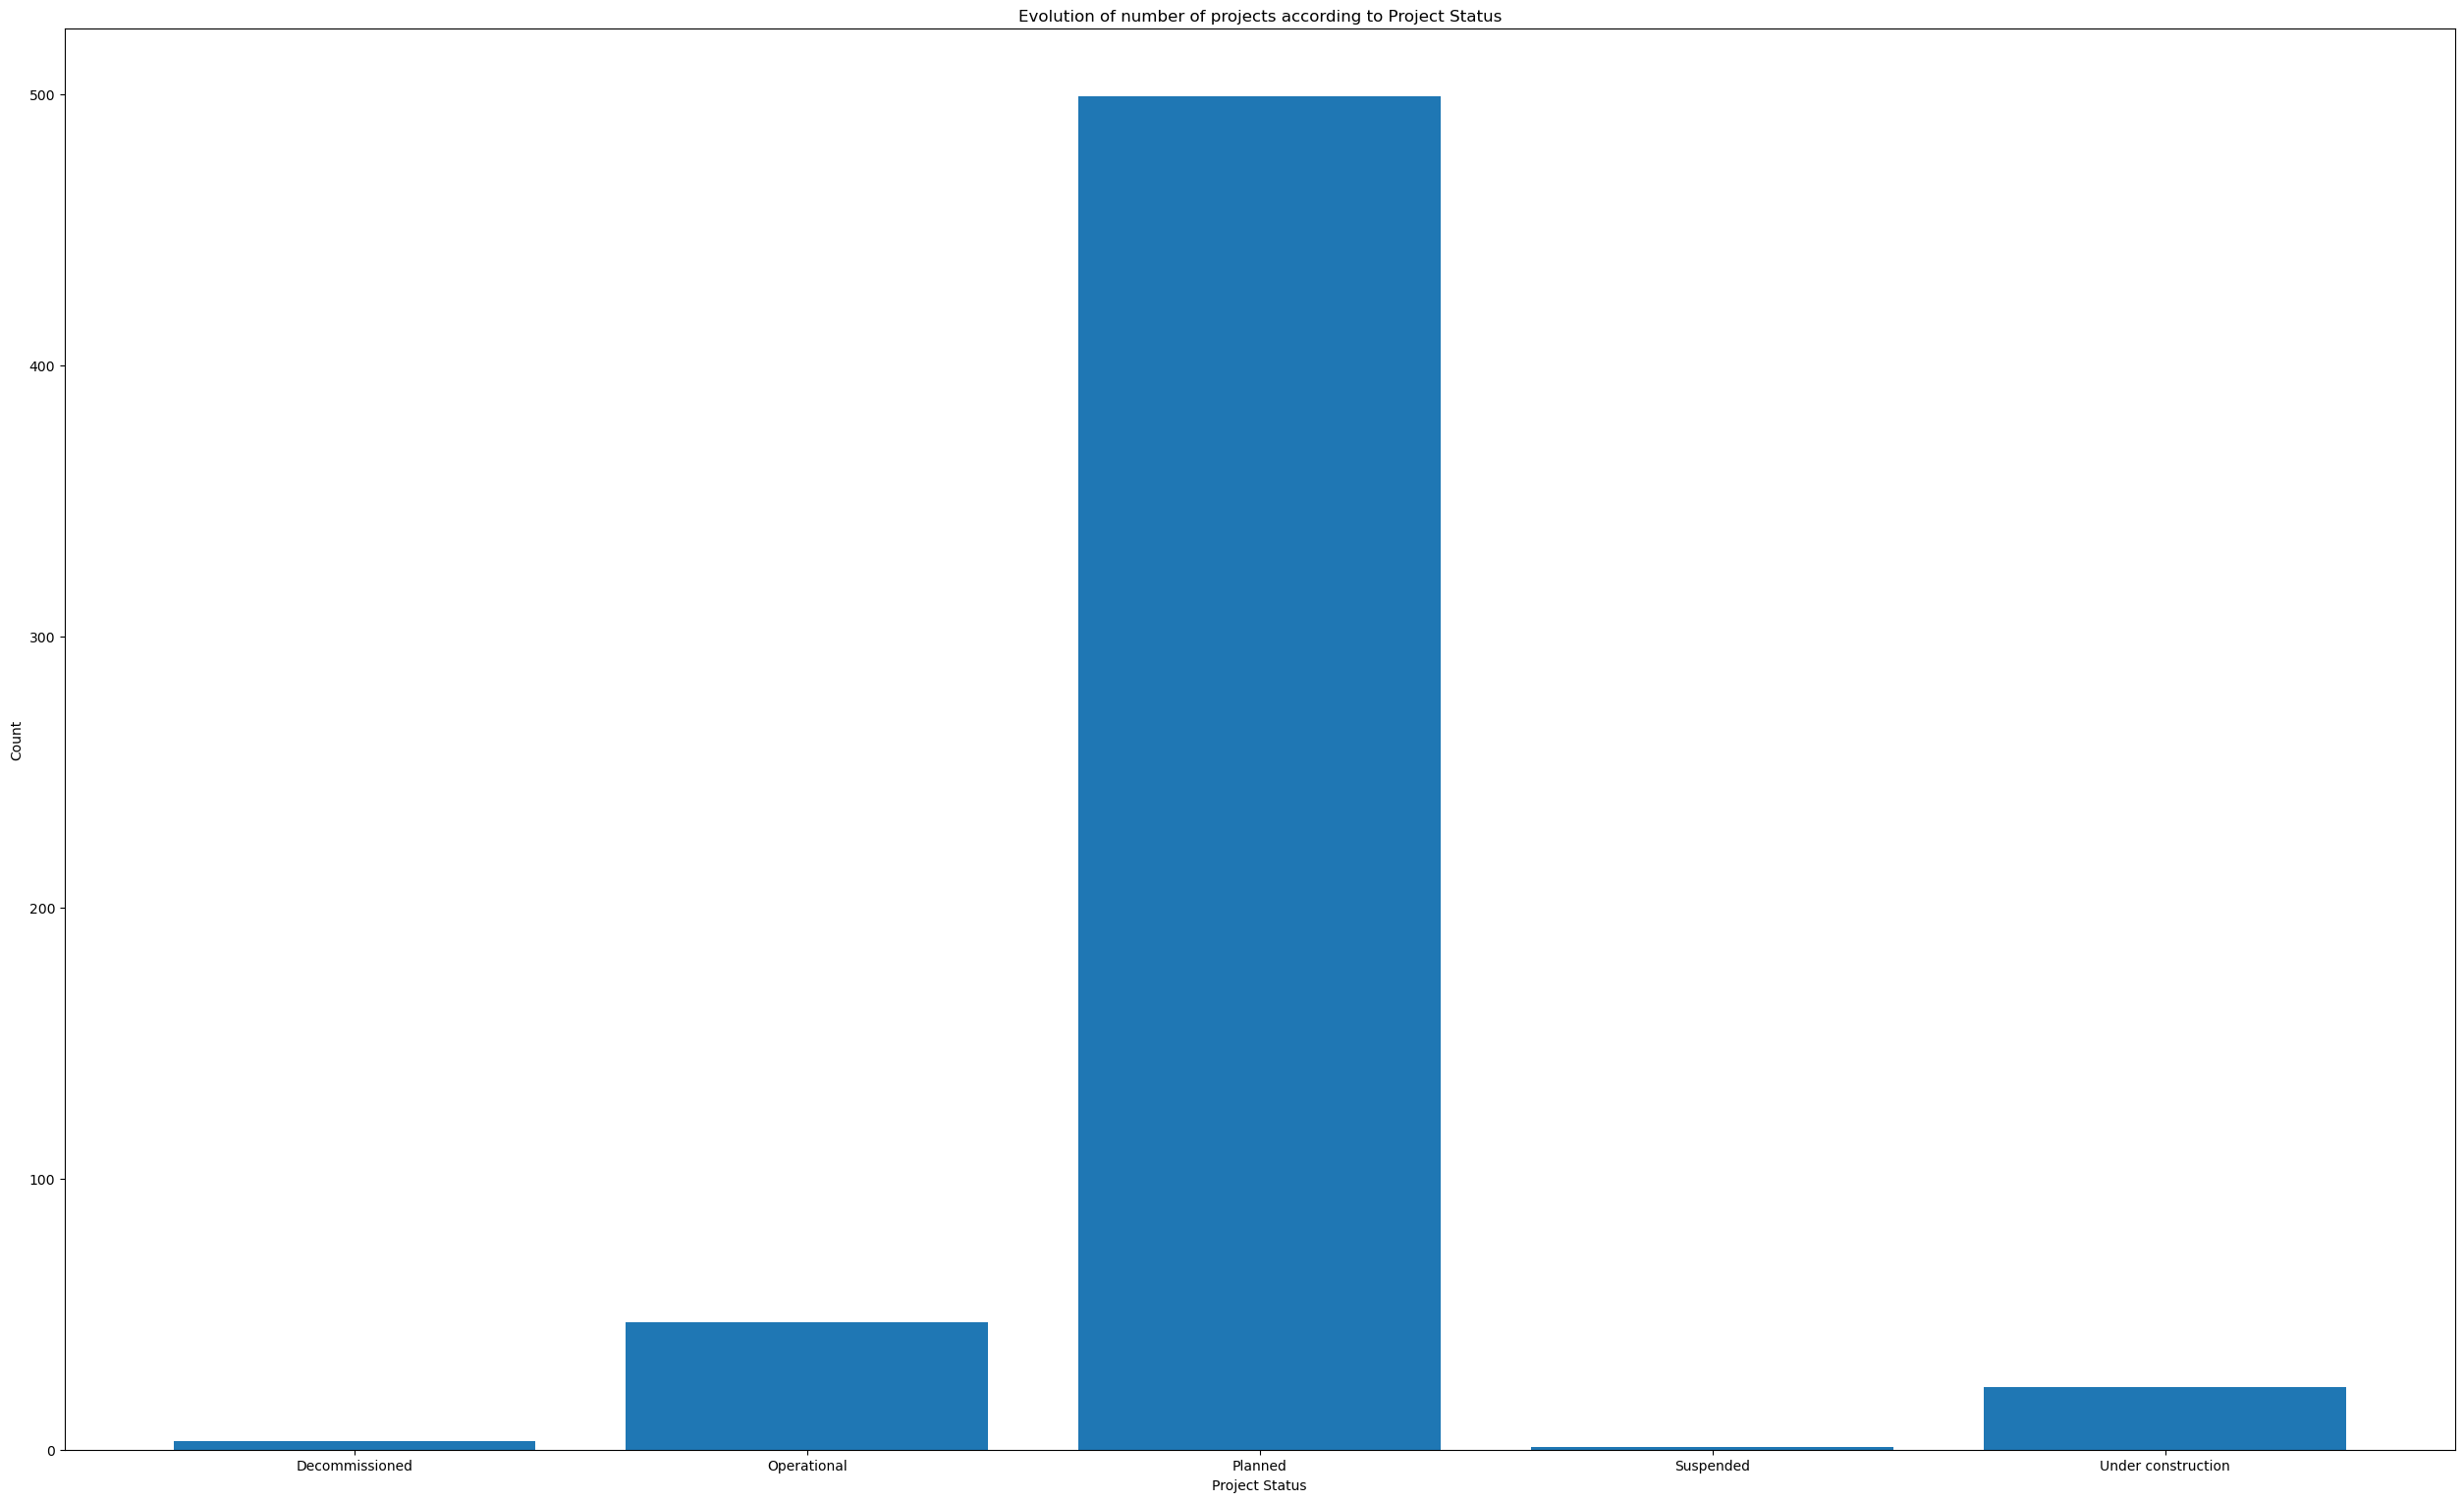

_________Watching at distribution of  Sector ___________


1: Stats 




Values  Count  Percentage of total
8                    Biofuels     60                10.47
3                     CO2 T&S     66                11.52
6                 CO2 storage     51                 8.90
5               CO2 transport     46                 8.03
9                      Cement     27                 4.71
10         Direct Air Capture     32                 5.58
2            Hydrogen/ammonia     73                12.74
11             Iron and steel      7                 1.22
4      Natural gas processing     50                 8.73
1   Other fuel transformation     41                 7.16
0              Other industry     37                 6.46
7              Power and heat     83                14.49

Check sum to 100 --  0.009999999999990905
2: Histogram 




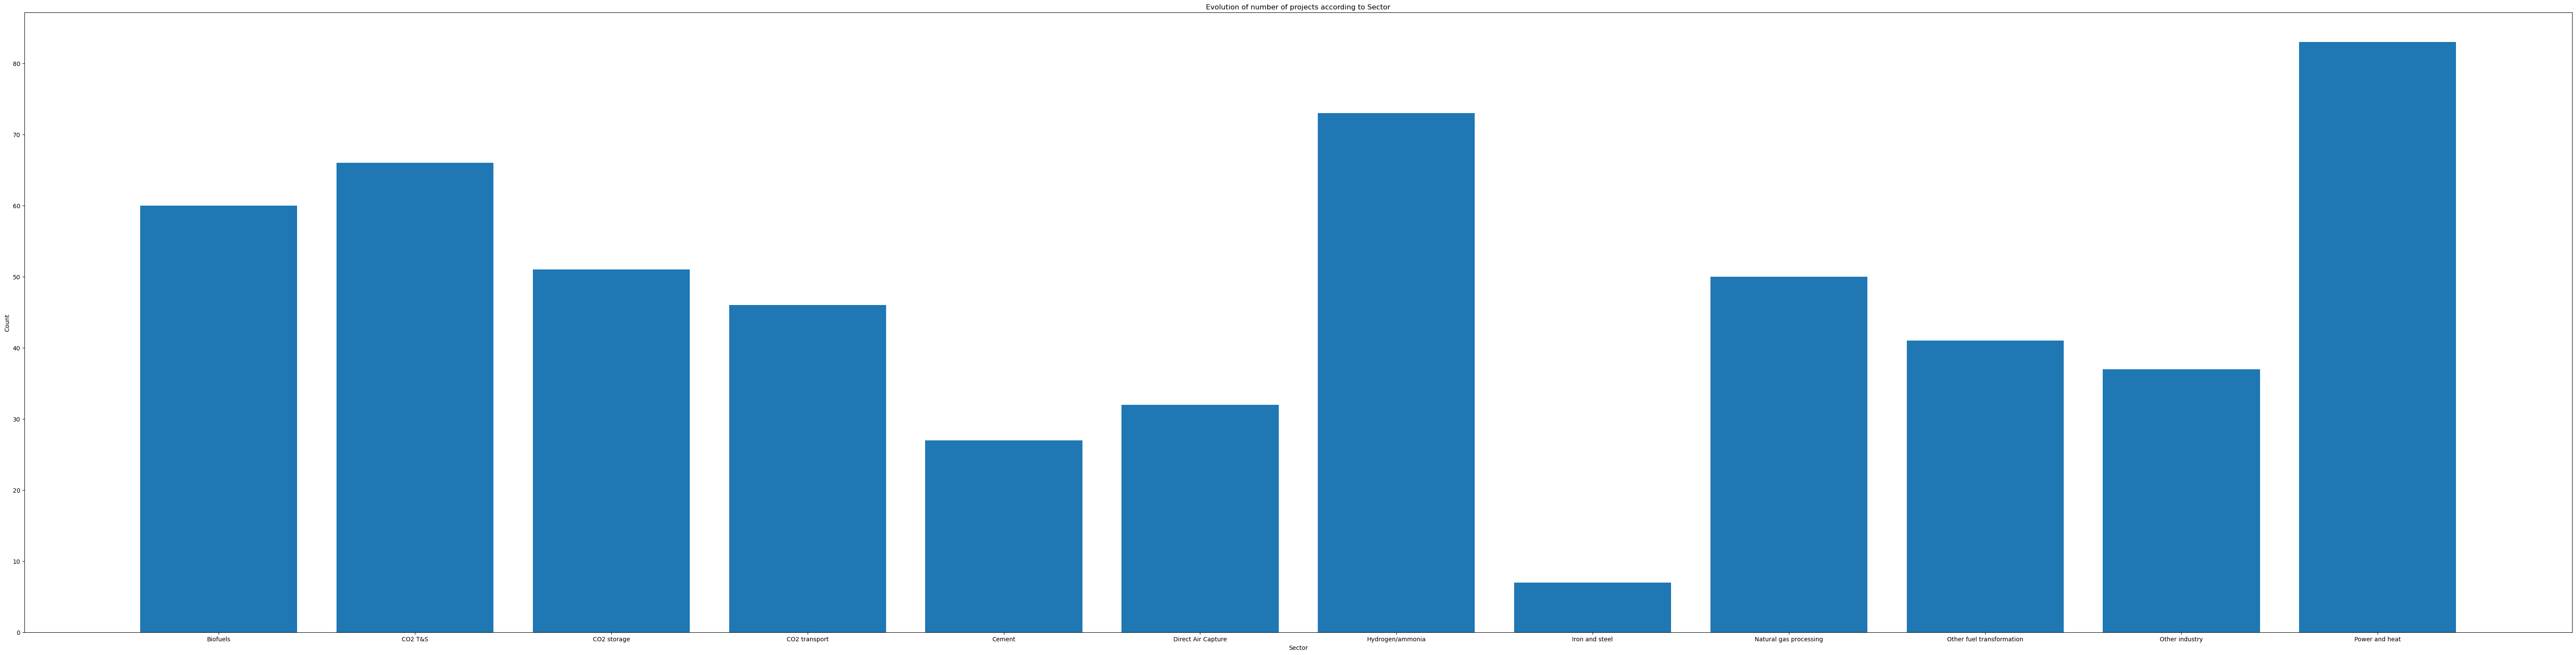

_________Watching at distribution of  Fate of carbon ___________


1: Stats 




Values  Count  Percentage of total
0    Dedicated storage    352                66.92
1                  EOR     61                11.60
8          EOR and use      1                 0.19
9                Mixed      1                 0.19
5              Storage      1                 0.19
2  Unknown/unspecified     73                13.88
4                  Use     34                 6.46
6          Use and EOR      1                 0.19
7      Use and storage      2                 0.38
3                  NaN      0                 0.00

Check sum to 100 --  -1.4210854715202004e-14
2: Histogram 




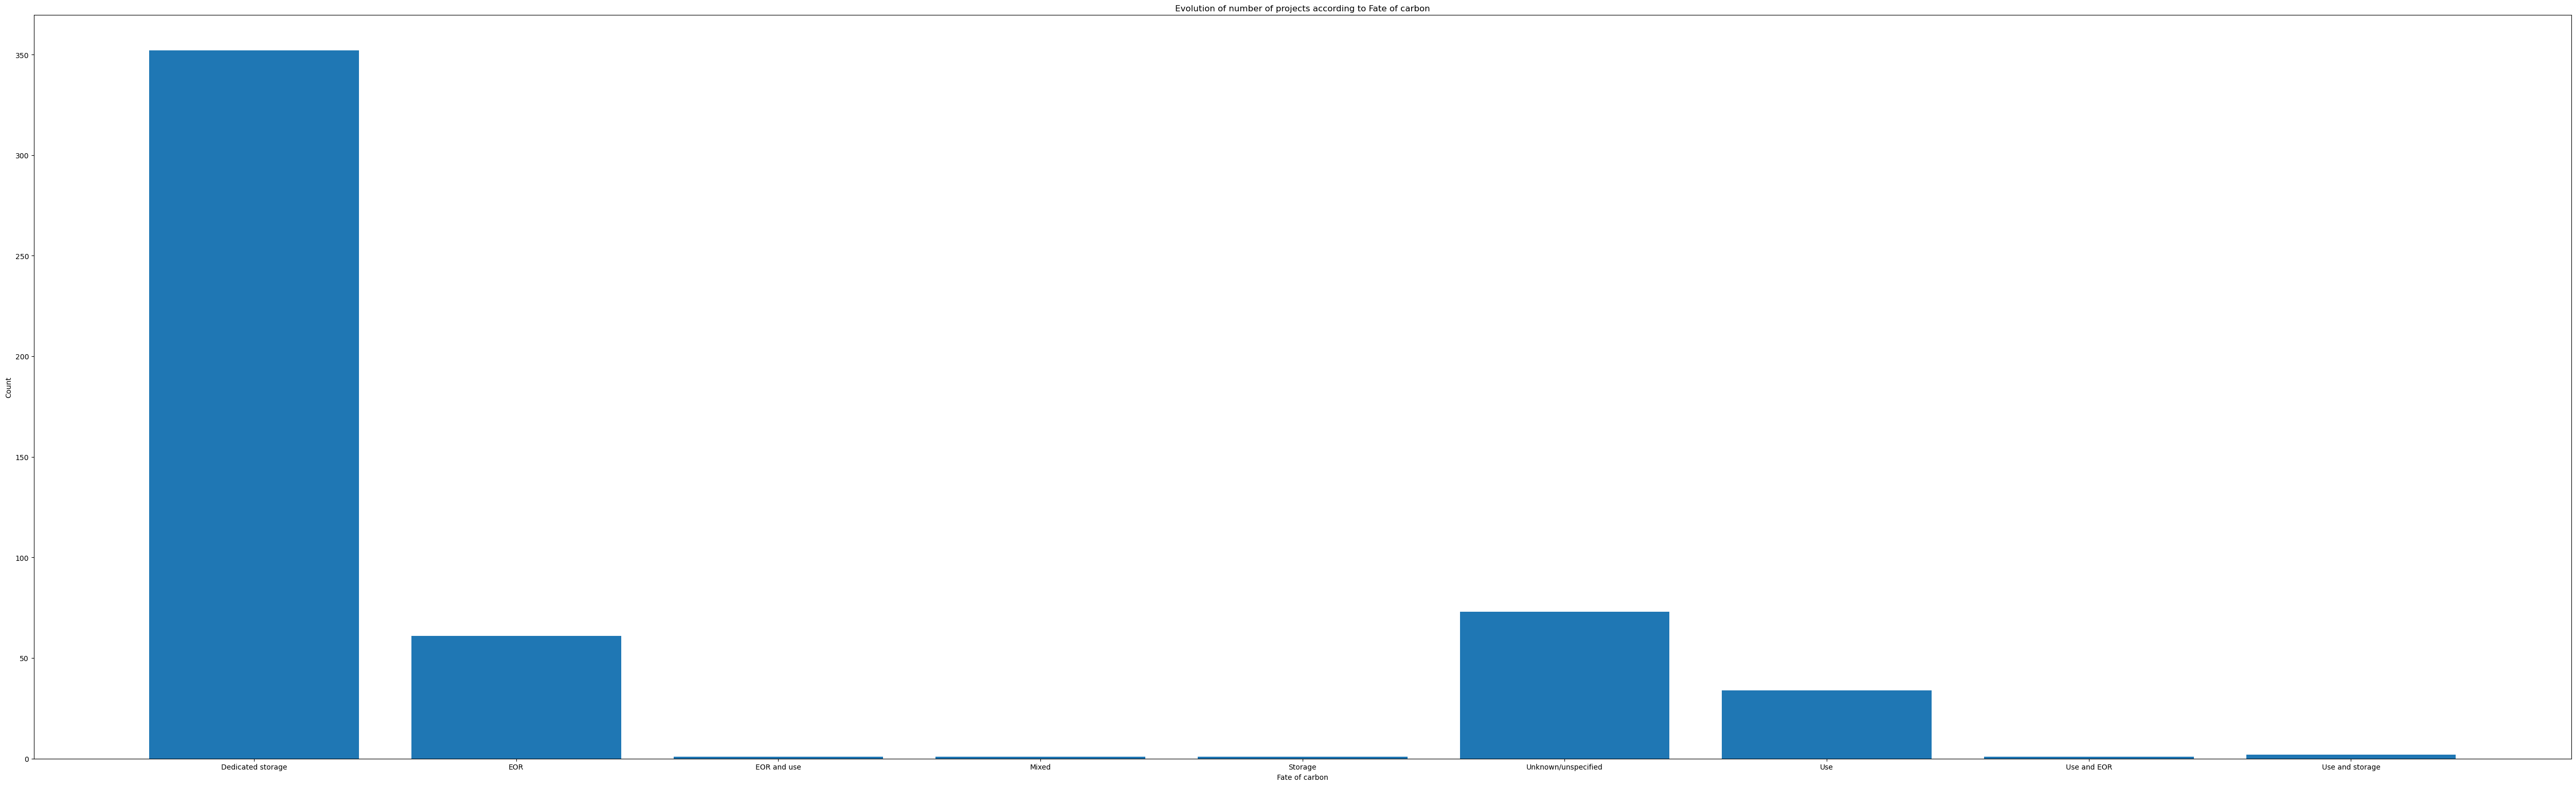

In [5]:
for i in ["Region", "OG_01", "Project type", "Announcement",
         "Project Status",
         "Sector", "Fate of carbon"]:
    
    print("_________Watching at distribution of ", i, "___________\n\n")

    print("1: Stats \n\n")
    keys = df_iea[i].unique()
    counts = []
    percentages = []
    for g in keys:
        value = len(df_iea.loc[df_iea[i] == g])
        counts.append(value)
        percentage = value
        percentages.append(percentage)
    percentages = around(percentages/sum(counts)*100, 2)
    to_display = pd.DataFrame({"Values" : keys, "Count" : counts, "Percentage of total" : percentages})
    to_display = to_display.sort_values("Values")
    display(to_display)
    print("Check sum to 100 -- ", sum(to_display["Percentage of total"]) - 100)

    print("2: Histogram \n\n")  
    figure(figsize = (max(15, len(keys)*5), 15))
    # Make a random dataset:
    filtered_df = to_display.dropna()
    height = filtered_df["Count"]
    bars = filtered_df["Values"]
    y_pos = arange(len(bars))
    # Create bars
    bar(y_pos, height)
    # Create names on the x-axis
    xticks(y_pos, bars)
    tight_layout()
    title("Evolution of number of projects according to " + i)  
    xlabel(i)
    ylabel("Count")
    show()

_________Watching at distribution of  Operation ___________


1: Stats 




Values  Count  Percentage of total
39   1972      1             0.257732
25   1982      1             0.257732
26   1983      1             0.257732
29   1986      1             0.257732
23   1992      1             0.257732
31   1996      1             0.257732
16   1997      1             0.257732
35   2000      1             0.257732
32   2001      1             0.257732
36   2003      1             0.257732
33   2006      1             0.257732
34   2007      1             0.257732
30   2008      2             0.515464
37   2009      2             0.515464
22   2010      3             0.773196
42   2011      1             0.257732
38   2012      1             0.257732
21   2013      5             1.288660
17   2014      2             0.515464
15   2015      3             0.773196
27   2016      3             0.773196
24   2017      2             0.515464
20   2018      1             0.257732
19   2019      3             0.773196
3    2020      4             1.030928
14   2021      3             0.773196
13   2022      3             0.773196
1    2023     16             4.123711
9    2024     62            15.979381
0    2025     69            17.783505
10   2026     37             9.536082
8    2027     44            11.340206
7    2028     27             6.958763
11   2029      9             2.319588
4    2030     54            13.917526
28   2031      5             1.288660
5    2032      4             1.030928
41   2033      1             0.257732
12   2035      6             1.546392
40   2036      1             0.257732
6    2037      1             0.257732
18   2040      2             0.515464
2     NaN      0             0.000000

Check sum to 100 --  0.0
2: Stats with retreatment 


2: Histogram 




C:\Users\louis8613\AppData\Local\Temp\ipykernel_13116\665556195.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Values"] = filtered_df["Values"].astype("int")


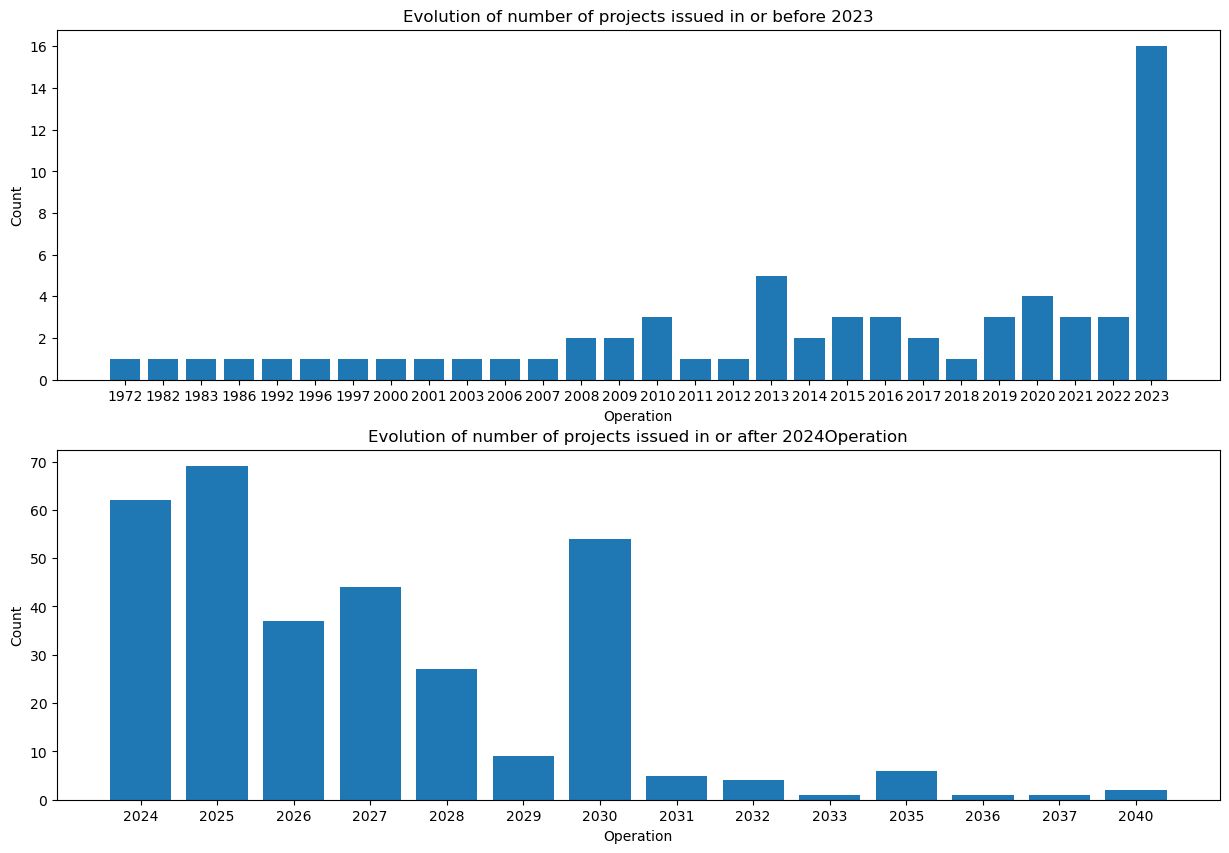

In [6]:
for i in ["Operation"]:
    
    print("_________Watching at distribution of ", i, "___________\n\n")

    print("1: Stats \n\n")
    keys = df_iea[i].unique()
    counts = []
    percentages = []
    for g in keys:
        value = len(df_iea.loc[df_iea[i] == g])
        counts.append(value)
        percentage = value
        percentages.append(percentage)
    to_display = pd.DataFrame({"Values" : keys, "Count" : counts, "Percentage of total" : percentages/sum(counts)*100})
    to_display = to_display.sort_values("Values")
    display(to_display)
    print("Check sum to 100 -- ", sum(to_display["Percentage of total"]) - 100)
    
    print("2: Stats with retreatment \n\n")
    filtered_df = to_display.dropna()
    filtered_df["Values"] = filtered_df["Values"].astype("int")
    old_projects = filtered_df.loc[filtered_df["Values"] <= 2023]
    new_projects = filtered_df.loc[filtered_df["Values"] > 2023]
    

    print("2: Histogram \n\n")  
    figure(figsize = (15, 10))
    subplot(211)
    # Make a random dataset:
    height = old_projects["Count"]
    bars = old_projects["Values"]
    y_pos = arange(len(bars))
    # Create bars
    bar(y_pos, height)
    # Create names on the x-axis
    xticks(y_pos, bars)
    title("Evolution of number of projects issued in or before 2023")  
    xlabel(i)
    ylabel("Count")
    subplot(212)
    height = new_projects["Count"]
    bars = new_projects["Values"]
    y_pos = arange(len(bars))
    # Create bars
    bar(y_pos, height)
    # Create names on the x-axis
    xticks(y_pos, bars)
    title("Evolution of number of projects issued in or after 2024" + i)  
    xlabel(i)
    ylabel("Count")
    show()

### Affichage des Matrices de Confusion

Tableau de statistiques à lire "i % des gens ont répondu x à la question 1 et y à la question 2"

Important : cette partie on va essayer de trouver des liens entre les données. Par lien j'entends prouver (du moins prouver que les alternatives sont fausses) que si une personne a répondu x à la question 1 alors statistiquement la probabilité qu'il réponde y à la question 2 est amoindri ou augmenté - ce n'est pas la même que s'il avait répondu z à la place de x à la question 1.

On va tester:

- Hypothèse: les données sont indépendantes (ou du moins on ne peut pas prouver qu'elles ne le sont pas)
- Alternative: il existe un lien entre les données

Voici un exemple:

> Variable "O&G" vs Variable "Region"

> On veut savoir si la répartition géographique des projets est la même ou pas selon la nature O&G oui/non. Peut-être parce qu'on veut prouver que O&G investissent beaucoup plus dans certaines régions que les autres.

> Le test sera de comparer le nombre de projets des O&G par aire géographique au nombre de projets des non O&G par aire géographique, tout en prenant en compte le nombre total d'individus (si tu avais 1 seule donnée dans ta base, tu trouverais que 100% des projets sont concentrés dans une région, mais tu ne pourrais pas généraliser) et la variance (prendre en compte que certaines régions sont peu représentées dans ta base et d'autres plus représentées, une différence élevée sur une classe avec beaucoup de données a plus de valeur que des différences sur des régions peu représentées), afin de conclure sur une différence statistiquement significative de nombre d'investissements O&G dans certaines régions par rapport aux autres. 

> Si mon test revient "pas indépendant", on pourra travailler avec une conclusion "Les O&G investissent dans des régions différentes des autres", si mon test revient "indépendant", on pourra dire que "Les O&G sont des investisseurs comme les autres au sens de la représentation géographique".


https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

Tu devrais y trouver des refs

#### A inserer dans le mémoire - les éléments entre dollars sont lisibles par latex


In order to highlight relationsheeps between data that have been shown through vizualisation tools, we will run statistical tests. Indeed, if plots are useful tools that can be used to understand data and get intuition on results, we need to take into account the number of projects that are mentionned in the database, the number of different possible categories per field and the variance to make sure that our conclusions made based on IEA data are not due to statistical chance but are generalisable.

Let's denote by $X \in \mathbf{X}$ the first variable to study and $Y \in \mathbf{Y}$ the second one. (Example: $X = \text{OG_01 }, \mathbf{X} = \{0,1\}, Y = \text{Project Type }, \mathbf{Y} = \{CCU, Capture, \dots\}$)

We want to prove that there is a statistical relationship between $X$ and $Y$ (Example: 0&G do not invest in the same kind of projects as other LOB). In general, if 2 variables are independent then $\mathbf{P}(X = x, Y = y) = \mathbf{P}(X = x).\mathbf{P}(Y = y)$, if there are not  $\mathbf{P}(X = x, Y = y) = \mathbf{P}(X = x).\mathbf{P}(Y = y|X = x)$. Using our example, if OG_01 and Project Type are independant then, the frequence of investment of O&G in capture projects is simply the probability that the project is led by O&G times the probability that the project is of type CO2 capture. In that case, there is no interaction between the project leader and the project type, because we did not use the information "The project leader is an O&G company" to estimate the probability that "The project type is Capture knowing that the project leader is an O&G company". That is why to test independance we will compare the following quantities:

- $E_{x,y} =  \frac{\text{Number of observations such that } X = x \text{. Number of observations such that } Y = y}{\text{Total number of observations}}$ that is to say the expected value of number of projects suach as  $(X = x, Y = y)$ under independance assumption.
- $O_{x,y}$ the observed number of observation sucht that $(X = x, Y = y)$

In order to do so, we will compute the following statistic: $T = \sum_{x \in \mathbf{X}, y \in \mathbf{Y}} \frac{(E_{x,y} - O_{x, y})^{2}}{E_{x, y}}$. Under the hypothesis of independance of X and Y , we know that with with high probabilty (we will use 95%) T should be less than a value $z$. Indeed we know that for a large number of projects, T should look like a $\chi_{2}$ with degrees of freedom  given by the number of different values taken by X and Y. So, if $T>z$ we will reject the hypothesis of independance (there is a statistical link between X and Y), else we will not reject the hypothesis of independance (either there is no statistical relationship within data or we cannot conclude).




#### Remarque: je fais 2 fois les mêmes tests: tu auras OG_01 vs Project Type et Project Type vs OG_01. Les conclusions sont les mêmes et les tableaux sont juste inversés. La seule raison, c'est que le rendu graphique est différent, à toi de chosir ta version préférée.

____________ Test #  1   OG_01  vs  Project type  ______________


1.: Counts


A lire de la façon suivante:  25  projets sont tels que  OG_01  =  0  et  Project type  =  CCU


Project type  CCU  Capture  Full chain  Storage  T&S  Transport
OG_01                                                          
0              25      162          66       32   18         30
1               7       72          79       20   46         16

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  OG_01  =  0 ;  7.5075075075075075 % sont des projets tels que  Project type  =  CCU 
 tandis que Parmi les projets tels que  OG_01  =  1 ;  2.9166666666666665 % sont des projets tels que  Project type  =  CCU


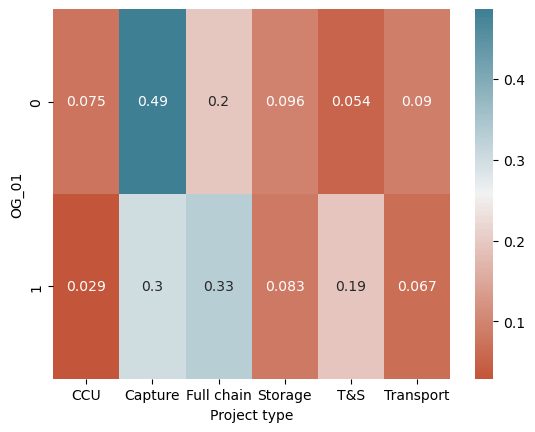

3: Histograms to compare distributions 




<Figure size 1000x3000 with 0 Axes>

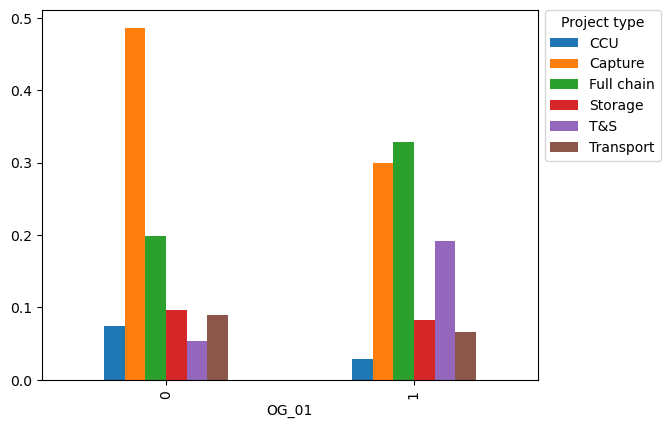

4: Test d'indépendance


Running Tests using answers:  Index(['CCU', 'Capture', 'Full chain', 'Storage', 'T&S', 'Transport'], dtype='object', name='Project type')
Test Statistic Value:  51.45
Test P-Value:  7.004133275830073e-08 %
Conclusion: we reject the hypothesis of independance between  OG_01 and  Project type that is to say with probability 95% or more, there is at least one value of  OG_01  that impacts significantly  Project type



____________ Test #  1   OG_01  vs  Sector  ______________


1.: Counts


A lire de la façon suivante:  57  projets sont tels que  OG_01  =  0  et  Sector  =  Biofuels


Sector  Biofuels  CO2 T&S  CO2 storage  CO2 transport  Cement  \
OG_01                                                           
0             57       17           33             30      25   
1              3       49           18             16       2   

Sector  Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
OG_01                                                          
0                       25                34               4   
1                        7                39               3   

Sector  Natural gas processing  Other fuel transformation  Other industry  \
OG_01                                                                       
0                            9                          6              27   
1                           41                         35              10   

Sector  Power and heat  
OG_01                   
0                   66  
1                   17

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  OG_01  =  0 ;  17.117117117117118 % sont des projets tels que  Sector  =  Biofuels 
 tandis que Parmi les projets tels que  OG_01  =  1 ;  1.25 % sont des projets tels que  Sector  =  Biofuels


Sector  Biofuels   CO2 T&S  CO2 storage  CO2 transport    Cement  \
OG_01                                                              
0       0.171171  0.051051     0.099099       0.090090  0.075075   
1       0.012500  0.204167     0.075000       0.066667  0.008333   

Sector  Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
OG_01                                                          
0                 0.075075          0.102102        0.012012   
1                 0.029167          0.162500        0.012500   

Sector  Natural gas processing  Other fuel transformation  Other industry  \
OG_01                                                                       
0                     0.027027                   0.018018        0.081081   
1                     0.170833                   0.145833        0.041667   

Sector  Power and heat  
OG_01                   
0             0.198198  
1             0.070833

3: Histograms to compare distributions 




<Figure size 1000x6000 with 0 Axes>

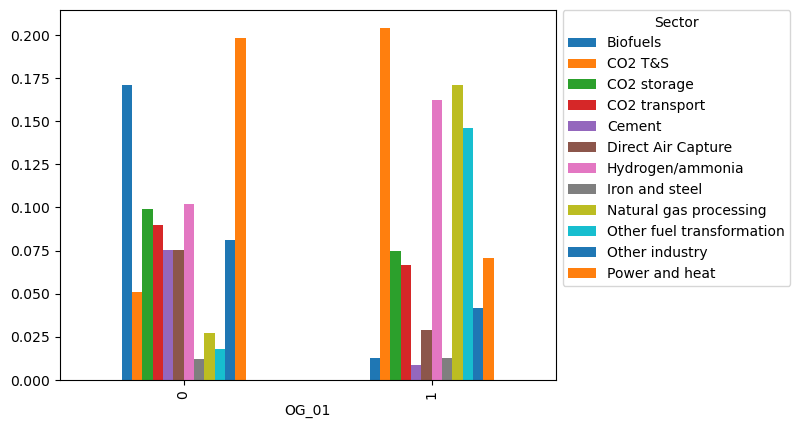

4: Test d'indépendance


Running Tests using answers:  Index(['CO2 T&S', 'CO2 storage', 'CO2 transport', 'Direct Air Capture',
       'Hydrogen/ammonia', 'Natural gas processing',
       'Other fuel transformation', 'Other industry', 'Power and heat'],
      dtype='object', name='Sector')
Test Statistic Value:  112.03
Test P-Value:  1.4588777178689822e-18 %
Conclusion: we reject the hypothesis of independance between  OG_01 and  Sector that is to say with probability 95% or more, there is at least one value of  OG_01  that impacts significantly  Sector



____________ Test #  1   OG_01  vs  Fate of carbon  ______________


1.: Counts


A lire de la façon suivante:  207  projets sont tels que  OG_01  =  0  et  Fate of carbon  =  Dedicated storage


Fate of carbon  Dedicated storage  EOR  EOR and use  Mixed  Storage  \
OG_01                                                                 
0                             207   24            0      1        0   
1                             145   37            1      0        1   

Fate of carbon  Unknown/unspecified  Use  Use and EOR  Use and storage  
OG_01                                                                   
0                                41   27            0                2  
1                                32    7            1                0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  OG_01  =  0 ;  68.54304635761589 % sont des projets tels que  Fate of carbon  =  Dedicated storage 
 tandis que Parmi les projets tels que  OG_01  =  1 ;  64.73214285714286 % sont des projets tels que  Fate of carbon  =  Dedicated storage


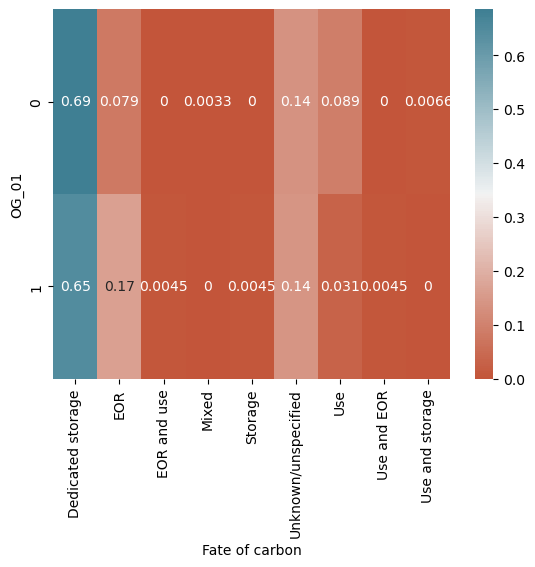

3: Histograms to compare distributions 




<Figure size 1000x4500 with 0 Axes>

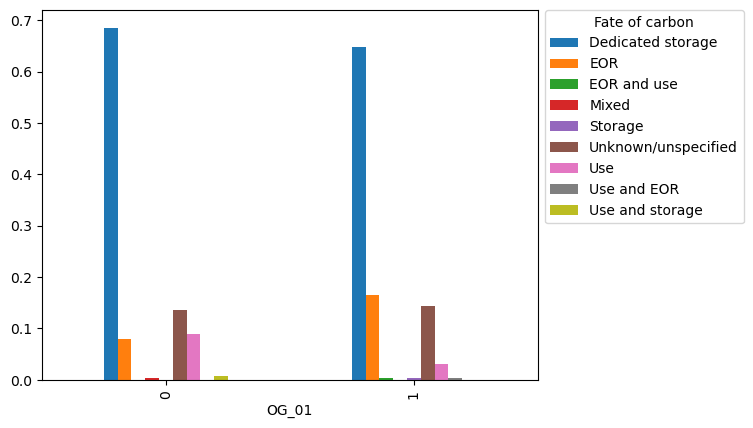

4: Test d'indépendance


Running Tests using answers:  Index(['Dedicated storage', 'EOR', 'Unknown/unspecified', 'Use'], dtype='object', name='Fate of carbon')
Test Statistic Value:  15.21
Test P-Value:  0.16477147874979536 %
Conclusion: we reject the hypothesis of independance between  OG_01 and  Fate of carbon that is to say with probability 95% or more, there is at least one value of  OG_01  that impacts significantly  Fate of carbon



____________ Test #  1   OG_01  vs  Region  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  OG_01  =  0  et  Region  =  Africa


Region  Africa  Asia  Asia Pacific  Europe  Europe + North America  \
OG_01                                                                
0            0    13            16     119                       1   
1            2    26            28      97                       0   

Region  Middle East  North America  South America  
OG_01                                              
0                 2            179              1  
1                12             71              4

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  OG_01  =  0 ;  0.0 % sont des projets tels que  Region  =  Africa 
 tandis que Parmi les projets tels que  OG_01  =  1 ;  0.8333333333333334 % sont des projets tels que  Region  =  Africa


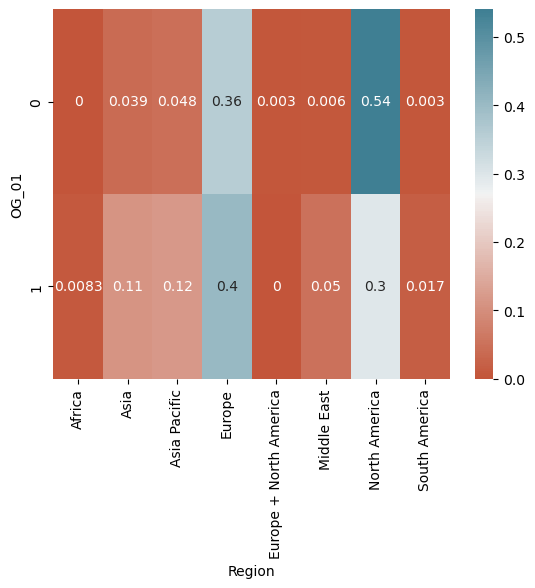

3: Histograms to compare distributions 




<Figure size 1000x4000 with 0 Axes>

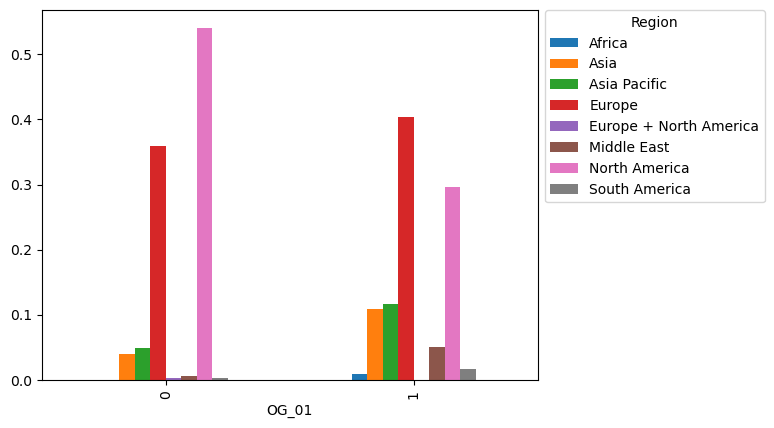

4: Test d'indépendance


Running Tests using answers:  Index(['Asia', 'Asia Pacific', 'Europe', 'North America'], dtype='object', name='Region')
Test Statistic Value:  37.8
Test P-Value:  3.1103544722105685e-06 %
Conclusion: we reject the hypothesis of independance between  OG_01 and  Region that is to say with probability 95% or more, there is at least one value of  OG_01  that impacts significantly  Region



____________ Test #  1   OG_01  vs  Operation  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  OG_01  =  0  et  Operation  =  1972


Operation  1972  1982  1983  1986  1992  1996  1997  2000  2001  2003  ...  \
OG_01                                                                  ...   
0             0     0     1     0     0     0     0     0     1     1  ...   
1             1     1     0     1     1     1     1     1     0     0  ...   

Operation  2028  2029  2030  2031  2032  2033  2035  2036  2037  2040  
OG_01                                                                  
0            15     5    26     4     2     1     4     0     0     1  
1            12     4    28     1     2     0     2     1     1     1  

[2 rows x 42 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  OG_01  =  0 ;  0.0 % sont des projets tels que  Operation  =  1972 
 tandis que Parmi les projets tels que  OG_01  =  1 ;  0.5714285714285714 % sont des projets tels que  Operation  =  1972


Operation      1972      1982      1983      1986      1992      1996  \
OG_01                                                                   
0          0.000000  0.000000  0.004695  0.000000  0.000000  0.000000   
1          0.005714  0.005714  0.000000  0.005714  0.005714  0.005714   

Operation      1997      2000      2001      2003  ...      2028      2029  \
OG_01                                              ...                       
0          0.000000  0.000000  0.004695  0.004695  ...  0.070423  0.023474   
1          0.005714  0.005714  0.000000  0.000000  ...  0.068571  0.022857   

Operation      2030      2031      2032      2033      2035      2036  \
OG_01                                                                   
0          0.122066  0.018779  0.009390  0.004695  0.018779  0.000000   
1          0.160000  0.005714  0.011429  0.000000  0.011429  0.005714   

Operation      2037      2040  
OG_01                          
0          0.000000  0.004695  
1          0.005714  0.005714  

[2 rows x 42 columns]

3: Histograms to compare distributions 




<Figure size 1000x21000 with 0 Axes>

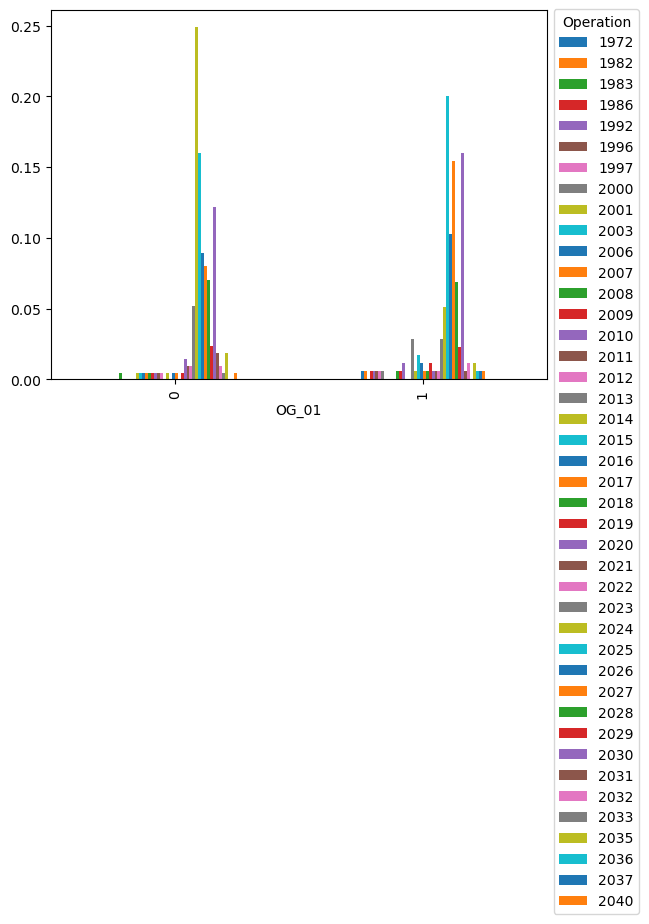

4: Test d'indépendance


Running Tests using answers:  Index(['2023', '2024', '2025', '2026', '2027', '2028', '2030'], dtype='object', name='Operation')
Test Statistic Value:  31.31
Test P-Value:  0.002213205212103794 %
Conclusion: we reject the hypothesis of independance between  OG_01 and  Operation that is to say with probability 95% or more, there is at least one value of  OG_01  that impacts significantly  Operation



____________ Test #  1   OG_01  vs  Announcement  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  OG_01  =  0  et  Announcement  =  1991


Announcement  1991  1997  2002  2006  2007  2008  2009  2010  2011  2012  ...  \
OG_01                                                                     ...   
0                0     0     0     0     0     2     3     4     5     2  ...   
1                1     1     1     1     1     2     4     1     5     1  ...   

Announcement  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
OG_01                                                                     
0                1     0     6     3    11    16    20   117   106    24  
1                0     2     2     4    11    19    27    73    59    13  

[2 rows x 21 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  OG_01  =  0 ;  0.0 % sont des projets tels que  Announcement  =  1991 
 tandis que Parmi les projets tels que  OG_01  =  1 ;  0.43668122270742354 % sont des projets tels que  Announcement  =  1991


Announcement      1991      1997      2002      2006      2007      2008  \
OG_01                                                                      
0             0.000000  0.000000  0.000000  0.000000  0.000000  0.006173   
1             0.004367  0.004367  0.004367  0.004367  0.004367  0.008734   

Announcement      2009      2010      2011      2012  ...      2014      2015  \
OG_01                                                 ...                       
0             0.009259  0.012346  0.015432  0.006173  ...  0.003086  0.000000   
1             0.017467  0.004367  0.021834  0.004367  ...  0.000000  0.008734   

Announcement      2016      2017      2018      2019      2020      2021  \
OG_01                                                                      
0             0.018519  0.009259  0.033951  0.049383  0.061728  0.361111   
1             0.008734  0.017467  0.048035  0.082969  0.117904  0.318777   

Announcement      2022      2023  
OG_01                             
0             0.327160  0.074074  
1             0.257642  0.056769  

[2 rows x 21 columns]

3: Histograms to compare distributions 




<Figure size 1000x10500 with 0 Axes>

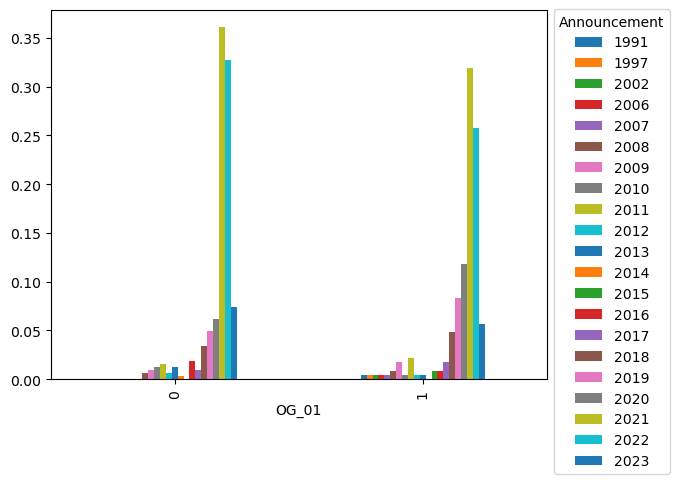

4: Test d'indépendance


Running Tests using answers:  Index(['2011', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object', name='Announcement')
Test Statistic Value:  11.81
Test P-Value:  6.633291423701694 %
Conclusion: we cannot reject the hypothesis of independance between  OG_01 and  Announcement , that is to say any difference noticed in the distributions of  OG_01  according to  Announcement  may be due to statistical coincidence



____________ Test #  1   OG_01  vs  Project Status  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  OG_01  =  0  et  Project Status  =  Decommissioned


Project Status  Decommissioned  Operational  Planned  Suspended  \
OG_01                                                             
0                            1           20      298          0   
1                            2           27      201          1   

Project Status  Under construction  
OG_01                               
0                               14  
1                                9

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  OG_01  =  0 ;  0.3003003003003003 % sont des projets tels que  Project Status  =  Decommissioned 
 tandis que Parmi les projets tels que  OG_01  =  1 ;  0.8333333333333334 % sont des projets tels que  Project Status  =  Decommissioned


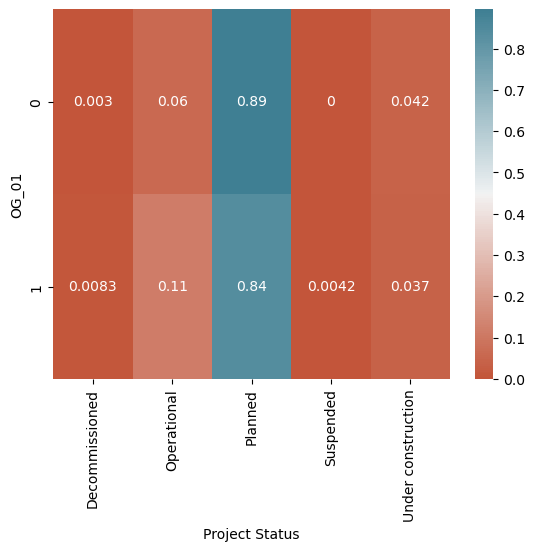

3: Histograms to compare distributions 




<Figure size 1000x2500 with 0 Axes>

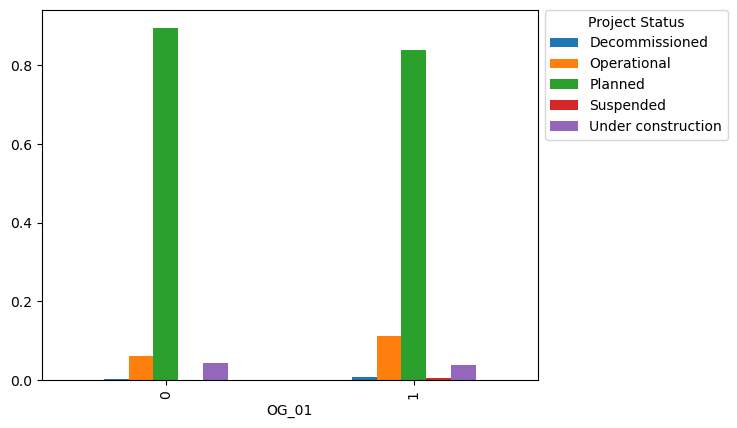

4: Test d'indépendance


Running Tests using answers:  Index(['Operational', 'Planned', 'Under construction'], dtype='object', name='Project Status')
Test Statistic Value:  5.27
Test P-Value:  7.168337804751144 %
Conclusion: we cannot reject the hypothesis of independance between  OG_01 and  Project Status , that is to say any difference noticed in the distributions of  OG_01  according to  Project Status  may be due to statistical coincidence



____________ Test #  1   Project type  vs  Sector  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Project type  =  CCU  et  Sector  =  Biofuels


Sector        Biofuels  CO2 T&S  CO2 storage  CO2 transport  Cement  \
Project type                                                          
CCU                  1        0            0              0       4   
Capture             41        0            0              0      20   
Full chain          18        1            0              0       3   
Storage              0        4           48              0       0   
T&S                  0       61            3              0       0   
Transport            0        0            0             46       0   

Sector        Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Project type                                                         
CCU                           11                 1               2   
Capture                        9                46               3   
Full chain                    12                26               2   
Storage                        0                 0               0   
T&S                            0                 0               0   
Transport                      0                 0               0   

Sector        Natural gas processing  Other fuel transformation  \
Project type                                                      
CCU                                0                          3   
Capture                            7                         28   
Full chain                        43                         10   
Storage                            0                          0   
T&S                                0                          0   
Transport                          0                          0   

Sector        Other industry  Power and heat  
Project type                                  
CCU                        4               6  
Capture                   26              54  
Full chain                 7              23  
Storage                    0               0  
T&S                        0               0  
Transport                  0               0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project type  =  CCU ;  3.125 % sont des projets tels que  Sector  =  Biofuels 
 tandis que Parmi les projets tels que  Project type  =  Capture ;  17.52136752136752 % sont des projets tels que  Sector  =  Biofuels


Sector        Biofuels   CO2 T&S  CO2 storage  CO2 transport   Cement  \
Project type                                                            
CCU           0.031250  0.000000     0.000000            0.0  0.12500   
Capture       0.175214  0.000000     0.000000            0.0  0.08547   
Full chain    0.124138  0.006897     0.000000            0.0  0.02069   
Storage       0.000000  0.076923     0.923077            0.0  0.00000   
T&S           0.000000  0.953125     0.046875            0.0  0.00000   
Transport     0.000000  0.000000     0.000000            1.0  0.00000   

Sector        Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Project type                                                         
CCU                     0.343750          0.031250        0.062500   
Capture                 0.038462          0.196581        0.012821   
Full chain              0.082759          0.179310        0.013793   
Storage                 0.000000          0.000000        0.000000   
T&S                     0.000000          0.000000        0.000000   
Transport               0.000000          0.000000        0.000000   

Sector        Natural gas processing  Other fuel transformation  \
Project type                                                      
CCU                         0.000000                   0.093750   
Capture                     0.029915                   0.119658   
Full chain                  0.296552                   0.068966   
Storage                     0.000000                   0.000000   
T&S                         0.000000                   0.000000   
Transport                   0.000000                   0.000000   

Sector        Other industry  Power and heat  
Project type                                  
CCU                 0.125000        0.187500  
Capture             0.111111        0.230769  
Full chain          0.048276        0.158621  
Storage             0.000000        0.000000  
T&S                 0.000000        0.000000  
Transport           0.000000        0.000000

3: Histograms to compare distributions 




<Figure size 3000x6000 with 0 Axes>

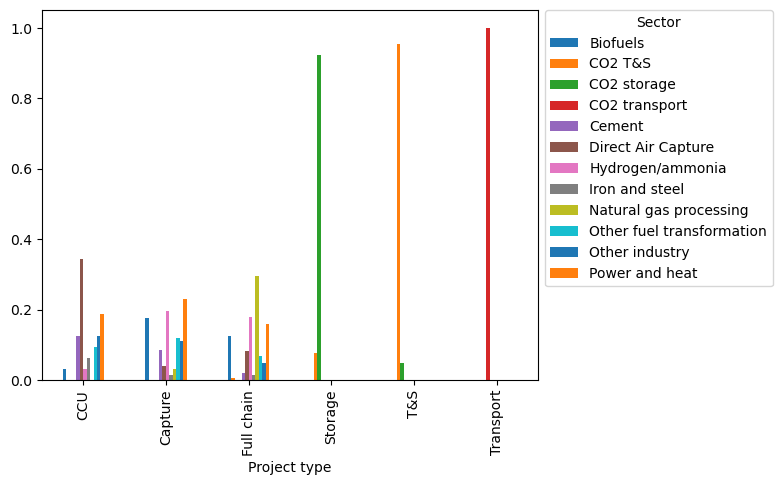

4: Test d'indépendance


Not enough values to run a test



____________ Test #  5   Project type  vs  Fate of carbon  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Project type  =  CCU  et  Fate of carbon  =  Dedicated storage


Fate of carbon  Dedicated storage  EOR  EOR and use  Mixed  Storage  \
Project type                                                          
CCU                             0    0            0      0        0   
Capture                       165   13            0      1        0   
Full chain                     78   44            1      0        0   
Storage                        51    1            0      0        0   
T&S                            58    3            0      0        1   

Fate of carbon  Unknown/unspecified  Use  Use and EOR  Use and storage  
Project type                                                            
CCU                               0   32            0                0  
Capture                          50    2            0                2  
Full chain                       21    0            1                0  
Storage                           0    0            0                0  
T&S                               2    0            0                0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project type  =  CCU ;  0.0 % sont des projets tels que  Fate of carbon  =  Dedicated storage 
 tandis que Parmi les projets tels que  Project type  =  Capture ;  70.81545064377683 % sont des projets tels que  Fate of carbon  =  Dedicated storage


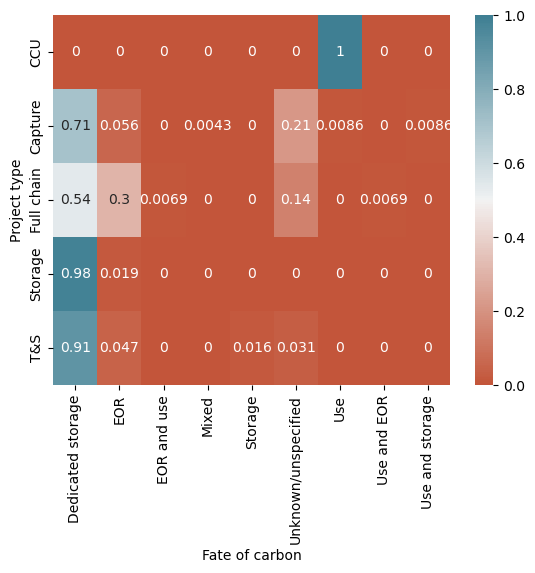

3: Histograms to compare distributions 




<Figure size 2500x4500 with 0 Axes>

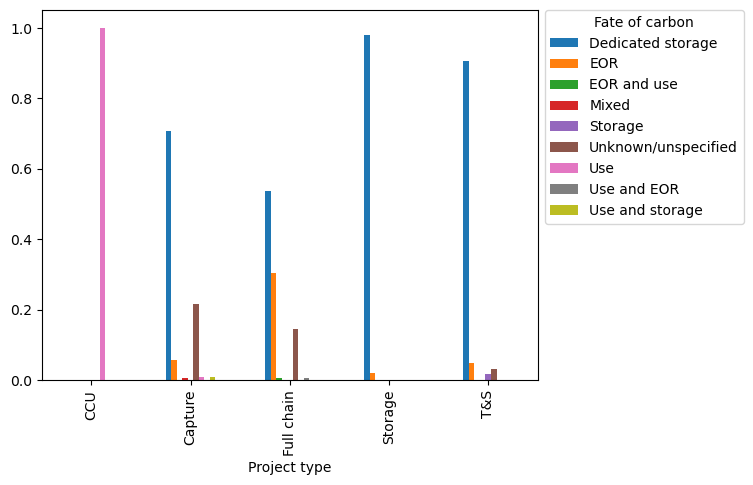

4: Test d'indépendance


Not enough values to run a test



____________ Test #  4   Project type  vs  Region  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Project type  =  CCU  et  Region  =  Africa


Region        Africa  Asia  Asia Pacific  Europe  Europe + North America  \
Project type                                                               
CCU                0     2             3      19                       0   
Capture            0     7             9     108                       0   
Full chain         2    25            18      11                       0   
Storage            0     0             6       6                       0   
T&S                0     5             7      38                       0   
Transport          0     0             1      34                       1   

Region        Middle East  North America  South America  
Project type                                             
CCU                     1              5              2  
Capture                 3            106              1  
Full chain              9             76              2  
Storage                 0             40              0  
T&S                     1             13              0  
Transport               0             10              0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project type  =  CCU ;  0.0 % sont des projets tels que  Region  =  Africa 
 tandis que Parmi les projets tels que  Project type  =  Capture ;  0.0 % sont des projets tels que  Region  =  Africa


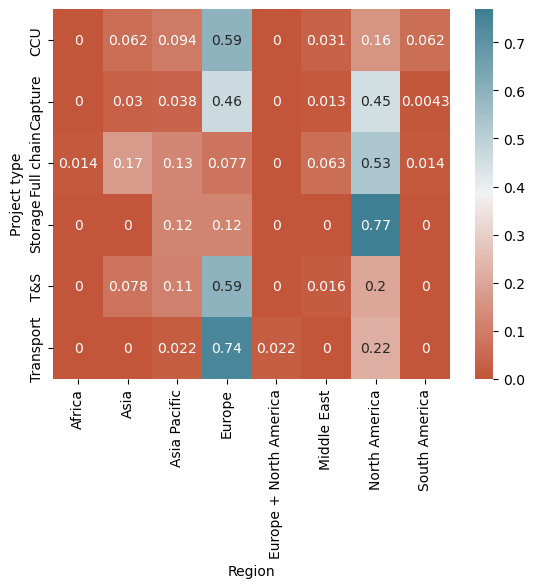

3: Histograms to compare distributions 




<Figure size 3000x4000 with 0 Axes>

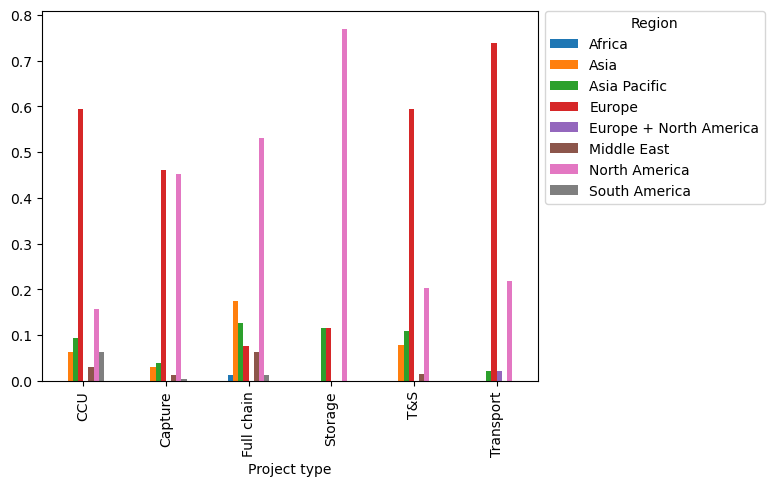

4: Test d'indépendance


Running Tests using answers:  Index(['Europe', 'North America'], dtype='object', name='Region')
Test Statistic Value:  105.3
Test P-Value:  4.019534816153344e-19 %
Conclusion: we reject the hypothesis of independance between  Project type and  Region that is to say with probability 95% or more, there is at least one value of  Project type  that impacts significantly  Region



____________ Test #  5   Project type  vs  Operation  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Project type  =  CCU  et  Operation  =  1972


Operation     1972  1982  1983  1986  1992  1996  1997  2000  2001  2003  ...  \
Project type                                                              ...   
CCU              0     0     0     0     0     0     1     0     0     0  ...   
Capture          0     0     0     0     0     0     0     0     0     0  ...   
Full chain       1     1     0     1     1     1     0     1     0     1  ...   
Storage          0     0     0     0     0     0     0     0     0     0  ...   
T&S              0     0     0     0     0     0     0     0     0     0  ...   
Transport        0     0     1     0     0     0     0     0     1     0  ...   

Operation     2028  2029  2030  2031  2032  2033  2035  2036  2037  2040  
Project type                                                              
CCU              0     2     0     0     0     0     0     0     0     0  
Capture         13     3    27     0     1     0     2     0     0     1  
Full chain       7     0     9     0     1     0     1     0     0     0  
Storage          1     0     2     0     0     0     0     0     0     0  
T&S              2     2    10     2     1     0     2     0     0     0  
Transport        4     2     6     3     1     1     1     1     1     1  

[6 rows x 42 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project type  =  CCU ;  0.0 % sont des projets tels que  Operation  =  1972 
 tandis que Parmi les projets tels que  Project type  =  Capture ;  0.0 % sont des projets tels que  Operation  =  1972


Operation         1972      1982      1983      1986      1992      1996  \
Project type                                                               
CCU           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Capture       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Full chain    0.008475  0.008475  0.000000  0.008475  0.008475  0.008475   
Storage       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
T&S           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Transport     0.000000  0.000000  0.027778  0.000000  0.000000  0.000000   

Operation         1997      2000      2001      2003  ...      2028      2029  \
Project type                                          ...                       
CCU           0.045455  0.000000  0.000000  0.000000  ...  0.000000  0.090909   
Capture       0.000000  0.000000  0.000000  0.000000  ...  0.082278  0.018987   
Full chain    0.000000  0.008475  0.000000  0.008475  ...  0.059322  0.000000   
Storage       0.000000  0.000000  0.000000  0.000000  ...  0.076923  0.000000   
T&S           0.000000  0.000000  0.000000  0.000000  ...  0.048780  0.048780   
Transport     0.000000  0.000000  0.027778  0.000000  ...  0.111111  0.055556   

Operation         2030      2031      2032      2033      2035      2036  \
Project type                                                               
CCU           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Capture       0.170886  0.000000  0.006329  0.000000  0.012658  0.000000   
Full chain    0.076271  0.000000  0.008475  0.000000  0.008475  0.000000   
Storage       0.153846  0.000000  0.000000  0.000000  0.000000  0.000000   
T&S           0.243902  0.048780  0.024390  0.000000  0.048780  0.000000   
Transport     0.166667  0.083333  0.027778  0.027778  0.027778  0.027778   

Operation         2037      2040  
Project type                      
CCU           0.000000  0.000000  
Capture       0.000000  0.006329  
Full chain    0.000000  0.000000  
Storage       0.000000  0.000000  
T&S           0.000000  0.000000  
Transport     0.027778  0.027778  

[6 rows x 42 columns]

3: Histograms to compare distributions 




<Figure size 3000x21000 with 0 Axes>

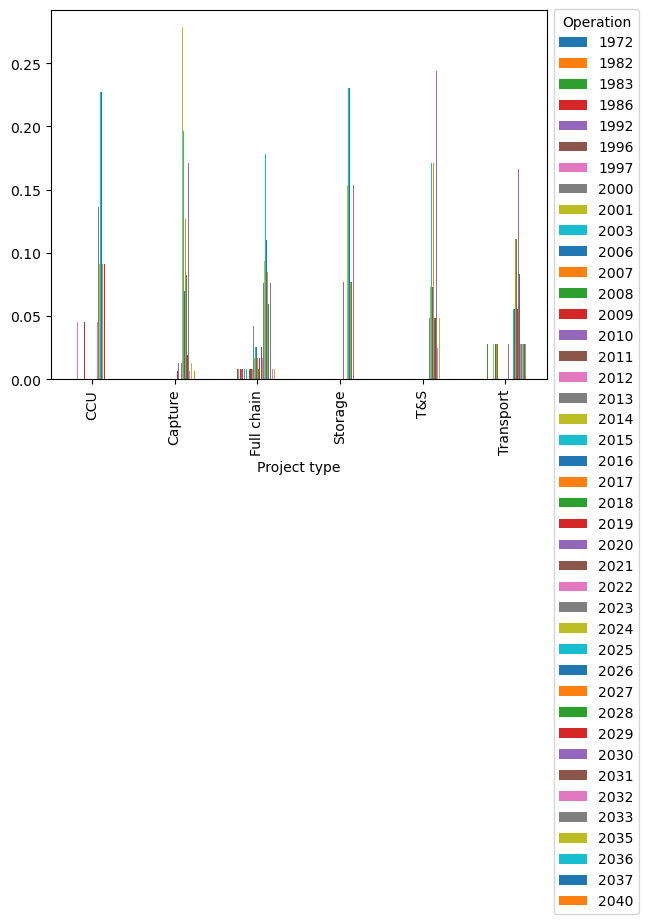

4: Test d'indépendance


Not enough values to run a test



____________ Test #  5   Project type  vs  Announcement  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Project type  =  CCU  et  Announcement  =  1991


Announcement  1991  1997  2002  2006  2007  2008  2009  2010  2011  2012  ...  \
Project type                                                              ...   
CCU              0     0     0     0     0     0     0     0     1     0  ...   
Capture          0     0     0     0     0     0     1     0     2     1  ...   
Full chain       1     1     1     1     1     4     6     3     5     2  ...   
Storage          0     0     0     0     0     0     0     1     1     0  ...   
T&S              0     0     0     0     0     0     0     1     0     0  ...   
Transport        0     0     0     0     0     0     0     0     1     0  ...   

Announcement  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
Project type                                                              
CCU              0     0     0     1     0     2     5    14     6     1  
Capture          1     0     4     1    12    19    17   107    56     8  
Full chain       0     2     3     0     7     7    10    38    36     5  
Storage          0     0     0     0     0     1     1     4    34    10  
T&S              0     0     1     5     3     4    13    19    14     4  
Transport        0     0     0     0     0     2     1     8    19     9  

[6 rows x 21 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project type  =  CCU ;  0.0 % sont des projets tels que  Announcement  =  1991 
 tandis que Parmi les projets tels que  Project type  =  Capture ;  0.0 % sont des projets tels que  Announcement  =  1991


Announcement      1991      1997      2002      2006      2007      2008  \
Project type                                                               
CCU           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Capture       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Full chain    0.007463  0.007463  0.007463  0.007463  0.007463  0.029851   
Storage       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
T&S           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Transport     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Announcement      2009      2010      2011      2012  ...      2014      2015  \
Project type                                          ...                       
CCU           0.000000  0.000000  0.033333  0.000000  ...  0.000000  0.000000   
Capture       0.004292  0.000000  0.008584  0.004292  ...  0.004292  0.000000   
Full chain    0.044776  0.022388  0.037313  0.014925  ...  0.000000  0.014925   
Storage       0.000000  0.019231  0.019231  0.000000  ...  0.000000  0.000000   
T&S           0.000000  0.015625  0.000000  0.000000  ...  0.000000  0.000000   
Transport     0.000000  0.000000  0.025000  0.000000  ...  0.000000  0.000000   

Announcement      2016      2017      2018      2019      2020      2021  \
Project type                                                               
CCU           0.000000  0.033333  0.000000  0.066667  0.166667  0.466667   
Capture       0.017167  0.004292  0.051502  0.081545  0.072961  0.459227   
Full chain    0.022388  0.000000  0.052239  0.052239  0.074627  0.283582   
Storage       0.000000  0.000000  0.000000  0.019231  0.019231  0.076923   
T&S           0.015625  0.078125  0.046875  0.062500  0.203125  0.296875   
Transport     0.000000  0.000000  0.000000  0.050000  0.025000  0.200000   

Announcement      2022      2023  
Project type                      
CCU           0.200000  0.033333  
Capture       0.240343  0.034335  
Full chain    0.268657  0.037313  
Storage       0.653846  0.192308  
T&S           0.218750  0.062500  
Transport     0.475000  0.225000  

[6 rows x 21 columns]

3: Histograms to compare distributions 




<Figure size 3000x10500 with 0 Axes>

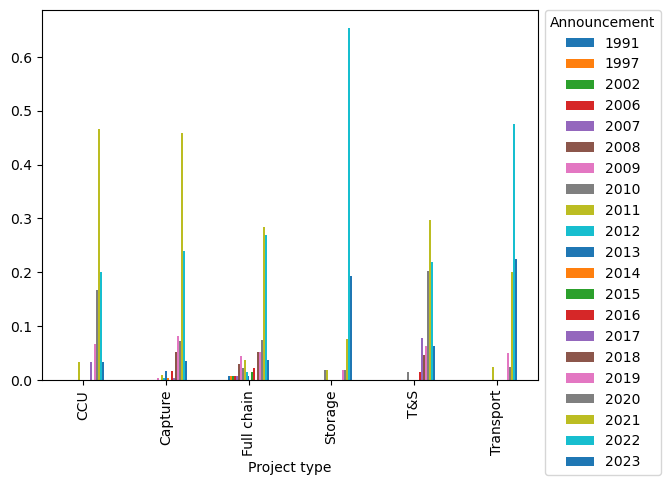

4: Test d'indépendance


Running Tests using answers:  Index(['2022'], dtype='object', name='Announcement')
Test Statistic Value:  0.0
Test P-Value:  100.0 %
Conclusion: we cannot reject the hypothesis of independance between  Project type and  Announcement , that is to say any difference noticed in the distributions of  Project type  according to  Announcement  may be due to statistical coincidence



____________ Test #  5   Project type  vs  Project Status  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Project type  =  CCU  et  Project Status  =  Decommissioned


Project Status  Decommissioned  Operational  Planned  Suspended  \
Project type                                                      
CCU                          0            3       26          0   
Capture                      0            3      223          0   
Full chain                   3           33       98          1   
Storage                      0            1       51          0   
T&S                          0            0       62          0   
Transport                    0            7       39          0   

Project Status  Under construction  
Project type                        
CCU                              3  
Capture                          8  
Full chain                      10  
Storage                          0  
T&S                              2  
Transport                        0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project type  =  CCU ;  0.0 % sont des projets tels que  Project Status  =  Decommissioned 
 tandis que Parmi les projets tels que  Project type  =  Capture ;  0.0 % sont des projets tels que  Project Status  =  Decommissioned


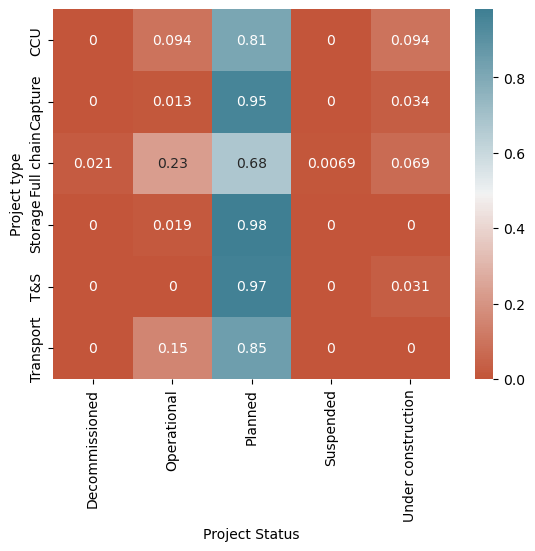

3: Histograms to compare distributions 




<Figure size 3000x2500 with 0 Axes>

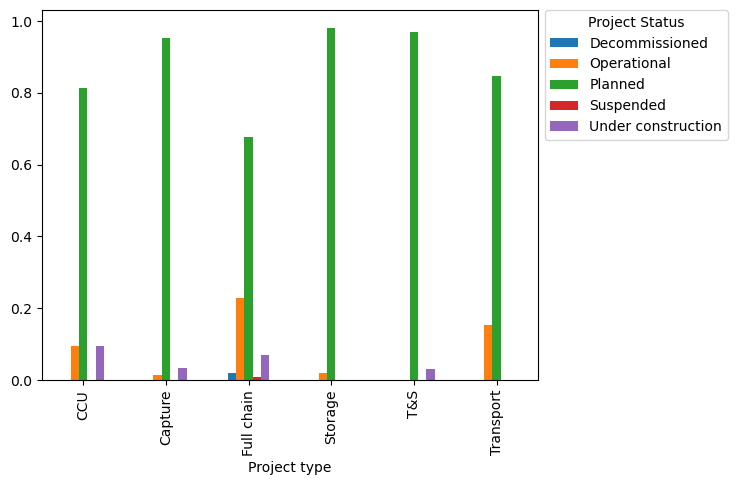

4: Test d'indépendance


Running Tests using answers:  Index(['Planned'], dtype='object', name='Project Status')
Test Statistic Value:  0.0
Test P-Value:  100.0 %
Conclusion: we cannot reject the hypothesis of independance between  Project type and  Project Status , that is to say any difference noticed in the distributions of  Project type  according to  Project Status  may be due to statistical coincidence



____________ Test #  5   Sector  vs  Project type  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Sector  =  Biofuels  et  Project type  =  CCU


Project type               CCU  Capture  Full chain  Storage  T&S  Transport
Sector                                                                      
Biofuels                     1       41          18        0    0          0
CO2 T&S                      0        0           1        4   61          0
CO2 storage                  0        0           0       48    3          0
CO2 transport                0        0           0        0    0         46
Cement                       4       20           3        0    0          0
Direct Air Capture          11        9          12        0    0          0
Hydrogen/ammonia             1       46          26        0    0          0
Iron and steel               2        3           2        0    0          0
Natural gas processing       0        7          43        0    0          0
Other fuel transformation    3       28          10        0    0          0
Other industry               4       26           7        0    0          0
Power and heat               6       54          23        0    0          0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Sector  =  Biofuels ;  1.6666666666666667 % sont des projets tels que  Project type  =  CCU 
 tandis que Parmi les projets tels que  Sector  =  CO2 T&S ;  0.0 % sont des projets tels que  Project type  =  CCU


Project type                    CCU   Capture  Full chain   Storage       T&S  \
Sector                                                                          
Biofuels                   0.016667  0.683333    0.300000  0.000000  0.000000   
CO2 T&S                    0.000000  0.000000    0.015152  0.060606  0.924242   
CO2 storage                0.000000  0.000000    0.000000  0.941176  0.058824   
CO2 transport              0.000000  0.000000    0.000000  0.000000  0.000000   
Cement                     0.148148  0.740741    0.111111  0.000000  0.000000   
Direct Air Capture         0.343750  0.281250    0.375000  0.000000  0.000000   
Hydrogen/ammonia           0.013699  0.630137    0.356164  0.000000  0.000000   
Iron and steel             0.285714  0.428571    0.285714  0.000000  0.000000   
Natural gas processing     0.000000  0.140000    0.860000  0.000000  0.000000   
Other fuel transformation  0.073171  0.682927    0.243902  0.000000  0.000000   
Other industry             0.108108  0.702703    0.189189  0.000000  0.000000   
Power and heat             0.072289  0.650602    0.277108  0.000000  0.000000   

Project type               Transport  
Sector                                
Biofuels                         0.0  
CO2 T&S                          0.0  
CO2 storage                      0.0  
CO2 transport                    1.0  
Cement                           0.0  
Direct Air Capture               0.0  
Hydrogen/ammonia                 0.0  
Iron and steel                   0.0  
Natural gas processing           0.0  
Other fuel transformation        0.0  
Other industry                   0.0  
Power and heat                   0.0

3: Histograms to compare distributions 




<Figure size 6000x3000 with 0 Axes>

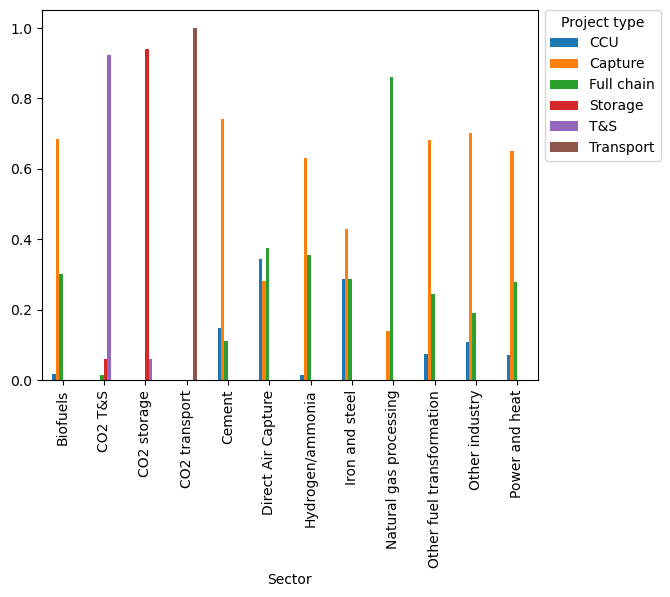

4: Test d'indépendance


Not enough values to run a test



____________ Test #  11   Sector  vs  Fate of carbon  ______________


1.: Counts


A lire de la façon suivante:  53  projets sont tels que  Sector  =  Biofuels  et  Fate of carbon  =  Dedicated storage


Fate of carbon             Dedicated storage  EOR  EOR and use  Mixed  \
Sector                                                                  
Biofuels                                  53    6            0      0   
CO2 T&S                                   60    3            0      0   
CO2 storage                               50    1            0      0   
Cement                                    17    0            0      0   
Direct Air Capture                        18    2            0      0   
Hydrogen/ammonia                          50    3            0      0   
Iron and steel                             2    1            0      0   
Natural gas processing                    23   16            0      0   
Other fuel transformation                 16   10            1      0   
Other industry                            16    9            0      0   
Power and heat                            47   10            0      1   

Fate of carbon             Storage  Unknown/unspecified  Use  Use and EOR  \
Sector                                                                      
Biofuels                         0                    0    1            0   
CO2 T&S                          1                    2    0            0   
CO2 storage                      0                    0    0            0   
Cement                           0                    4    6            0   
Direct Air Capture               0                    0   11            0   
Hydrogen/ammonia                 0                   18    1            0   
Iron and steel                   0                    2    2            0   
Natural gas processing           0                   10    0            1   
Other fuel transformation        0                   11    3            0   
Other industry                   0                    7    4            0   
Power and heat                   0                   19    6            0   

Fate of carbon             Use and storage  
Sector                                      
Biofuels                                 0  
CO2 T&S                                  0  
CO2 storage                              0  
Cement                                   0  
Direct Air Capture                       0  
Hydrogen/ammonia                         1  
Iron and steel                           0  
Natural gas processing                   0  
Other fuel transformation                0  
Other industry                           1  
Power and heat                           0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Sector  =  Biofuels ;  88.33333333333333 % sont des projets tels que  Fate of carbon  =  Dedicated storage 
 tandis que Parmi les projets tels que  Sector  =  CO2 T&S ;  90.9090909090909 % sont des projets tels que  Fate of carbon  =  Dedicated storage


Fate of carbon             Dedicated storage       EOR  EOR and use     Mixed  \
Sector                                                                          
Biofuels                            0.883333  0.100000      0.00000  0.000000   
CO2 T&S                             0.909091  0.045455      0.00000  0.000000   
CO2 storage                         0.980392  0.019608      0.00000  0.000000   
Cement                              0.629630  0.000000      0.00000  0.000000   
Direct Air Capture                  0.580645  0.064516      0.00000  0.000000   
Hydrogen/ammonia                    0.684932  0.041096      0.00000  0.000000   
Iron and steel                      0.285714  0.142857      0.00000  0.000000   
Natural gas processing              0.460000  0.320000      0.00000  0.000000   
Other fuel transformation           0.390244  0.243902      0.02439  0.000000   
Other industry                      0.432432  0.243243      0.00000  0.000000   
Power and heat                      0.566265  0.120482      0.00000  0.012048   

Fate of carbon              Storage  Unknown/unspecified       Use  \
Sector                                                               
Biofuels                   0.000000             0.000000  0.016667   
CO2 T&S                    0.015152             0.030303  0.000000   
CO2 storage                0.000000             0.000000  0.000000   
Cement                     0.000000             0.148148  0.222222   
Direct Air Capture         0.000000             0.000000  0.354839   
Hydrogen/ammonia           0.000000             0.246575  0.013699   
Iron and steel             0.000000             0.285714  0.285714   
Natural gas processing     0.000000             0.200000  0.000000   
Other fuel transformation  0.000000             0.268293  0.073171   
Other industry             0.000000             0.189189  0.108108   
Power and heat             0.000000             0.228916  0.072289   

Fate of carbon             Use and EOR  Use and storage  
Sector                                                   
Biofuels                          0.00         0.000000  
CO2 T&S                           0.00         0.000000  
CO2 storage                       0.00         0.000000  
Cement                            0.00         0.000000  
Direct Air Capture                0.00         0.000000  
Hydrogen/ammonia                  0.00         0.013699  
Iron and steel                    0.00         0.000000  
Natural gas processing            0.02         0.000000  
Other fuel transformation         0.00         0.000000  
Other industry                    0.00         0.027027  
Power and heat                    0.00         0.000000

3: Histograms to compare distributions 




<Figure size 5500x4500 with 0 Axes>

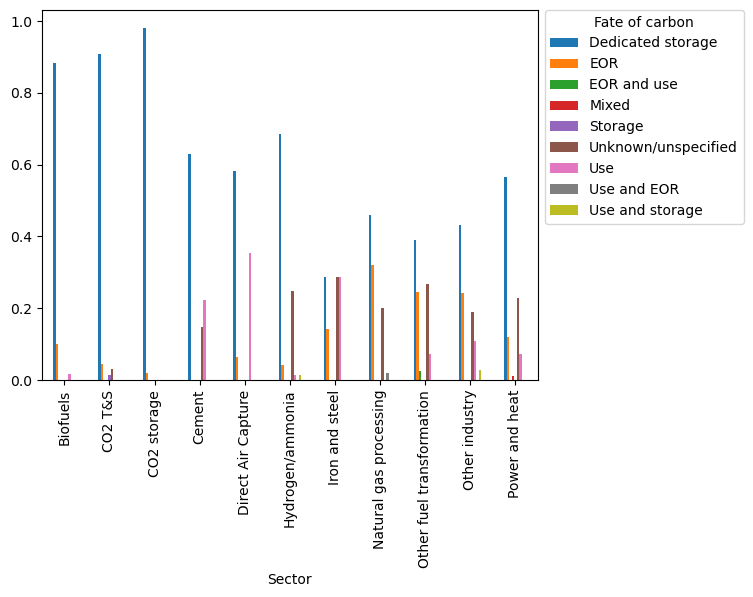

4: Test d'indépendance


Not enough values to run a test



____________ Test #  10   Sector  vs  Region  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Sector  =  Biofuels  et  Region  =  Africa


Region                     Africa  Asia  Asia Pacific  Europe  \
Sector                                                          
Biofuels                        0     0             0       4   
CO2 T&S                         0     6             9      37   
CO2 storage                     0     0             4       7   
CO2 transport                   0     0             1      34   
Cement                          0     1             0      19   
Direct Air Capture              0     0             0      10   
Hydrogen/ammonia                0     9            10      29   
Iron and steel                  0     0             0       4   
Natural gas processing          2     4            13       5   
Other fuel transformation       0     6             2      16   
Other industry                  0     5             4      11   
Power and heat                  0     8             1      40   

Region                     Europe + North America  Middle East  North America  \
Sector                                                                          
Biofuels                                        0            0             55   
CO2 T&S                                         0            1             13   
CO2 storage                                     0            0             40   
CO2 transport                                   1            0             10   
Cement                                          0            0              7   
Direct Air Capture                              0            1             17   
Hydrogen/ammonia                                0            2             23   
Iron and steel                                  0            1              2   
Natural gas processing                          0            7             18   
Other fuel transformation                       0            0             16   
Other industry                                  0            2             15   
Power and heat                                  0            0             34   

Region                     South America  
Sector                                    
Biofuels                               1  
CO2 T&S                                0  
CO2 storage                            0  
CO2 transport                          0  
Cement                                 0  
Direct Air Capture                     2  
Hydrogen/ammonia                       0  
Iron and steel                         0  
Natural gas processing                 1  
Other fuel transformation              1  
Other industry                         0  
Power and heat                         0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Sector  =  Biofuels ;  0.0 % sont des projets tels que  Region  =  Africa 
 tandis que Parmi les projets tels que  Sector  =  CO2 T&S ;  0.0 % sont des projets tels que  Region  =  Africa


Region                     Africa      Asia  Asia Pacific    Europe  \
Sector                                                                
Biofuels                     0.00  0.000000      0.000000  0.066667   
CO2 T&S                      0.00  0.090909      0.136364  0.560606   
CO2 storage                  0.00  0.000000      0.078431  0.137255   
CO2 transport                0.00  0.000000      0.021739  0.739130   
Cement                       0.00  0.037037      0.000000  0.703704   
Direct Air Capture           0.00  0.000000      0.000000  0.333333   
Hydrogen/ammonia             0.00  0.123288      0.136986  0.397260   
Iron and steel               0.00  0.000000      0.000000  0.571429   
Natural gas processing       0.04  0.080000      0.260000  0.100000   
Other fuel transformation    0.00  0.146341      0.048780  0.390244   
Other industry               0.00  0.135135      0.108108  0.297297   
Power and heat               0.00  0.096386      0.012048  0.481928   

Region                     Europe + North America  Middle East  North America  \
Sector                                                                          
Biofuels                                 0.000000     0.000000       0.916667   
CO2 T&S                                  0.000000     0.015152       0.196970   
CO2 storage                              0.000000     0.000000       0.784314   
CO2 transport                            0.021739     0.000000       0.217391   
Cement                                   0.000000     0.000000       0.259259   
Direct Air Capture                       0.000000     0.033333       0.566667   
Hydrogen/ammonia                         0.000000     0.027397       0.315068   
Iron and steel                           0.000000     0.142857       0.285714   
Natural gas processing                   0.000000     0.140000       0.360000   
Other fuel transformation                0.000000     0.000000       0.390244   
Other industry                           0.000000     0.054054       0.405405   
Power and heat                           0.000000     0.000000       0.409639   

Region                     South America  
Sector                                    
Biofuels                        0.016667  
CO2 T&S                         0.000000  
CO2 storage                     0.000000  
CO2 transport                   0.000000  
Cement                          0.000000  
Direct Air Capture              0.066667  
Hydrogen/ammonia                0.000000  
Iron and steel                  0.000000  
Natural gas processing          0.020000  
Other fuel transformation       0.024390  
Other industry                  0.000000  
Power and heat                  0.000000

3: Histograms to compare distributions 




<Figure size 6000x4000 with 0 Axes>

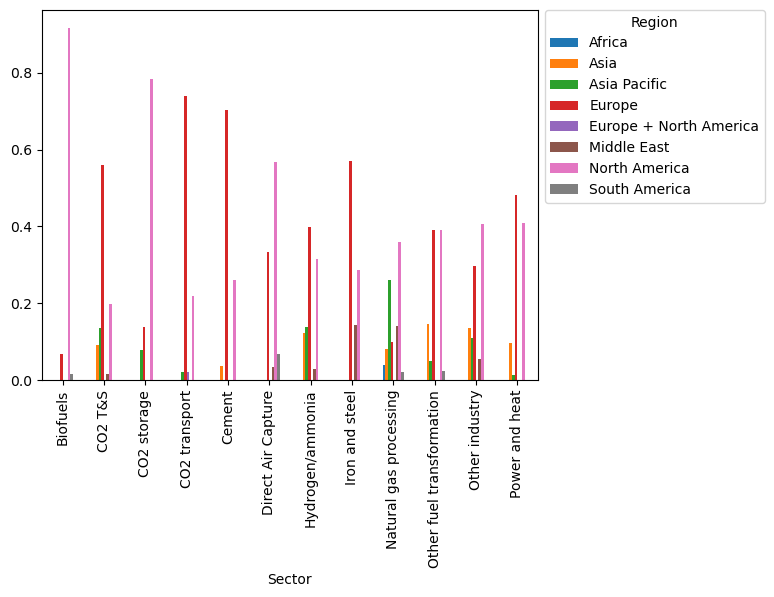

4: Test d'indépendance


Not enough values to run a test



____________ Test #  11   Sector  vs  Operation  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Sector  =  Biofuels  et  Operation  =  1972


Operation                  1972  1982  1983  1986  1992  1996  1997  2000  \
Sector                                                                      
Biofuels                      0     0     0     0     0     0     0     0   
CO2 T&S                       0     0     0     0     0     0     0     0   
CO2 storage                   0     0     0     0     0     0     0     0   
CO2 transport                 0     0     1     0     0     0     0     0   
Cement                        0     0     0     0     0     0     0     0   
Direct Air Capture            0     0     0     0     0     0     0     0   
Hydrogen/ammonia              0     0     0     0     0     0     0     0   
Iron and steel                0     0     0     0     0     0     0     0   
Natural gas processing        1     0     0     1     1     1     0     0   
Other fuel transformation     0     0     0     0     0     0     1     1   
Other industry                0     1     0     0     0     0     0     0   
Power and heat                0     0     0     0     0     0     0     0   

Operation                  2001  2003  ...  2028  2029  2030  2031  2032  \
Sector                                 ...                                 
Biofuels                      0     0  ...     1     0     1     0     0   
CO2 T&S                       0     0  ...     2     2    11     2     1   
CO2 storage                   0     0  ...     1     0     2     0     0   
CO2 transport                 1     0  ...     4     2     6     3     1   
Cement                        0     0  ...     5     0     4     0     0   
Direct Air Capture            0     0  ...     2     2     4     0     0   
Hydrogen/ammonia              0     0  ...     2     1     9     0     0   
Iron and steel                0     0  ...     0     0     1     0     0   
Natural gas processing        0     1  ...     2     0     3     0     0   
Other fuel transformation     0     0  ...     4     1     4     0     0   
Other industry                0     0  ...     1     1     2     0     0   
Power and heat                0     0  ...     3     0     7     0     2   

Operation                  2033  2035  2036  2037  2040  
Sector                                                   
Biofuels                      0     0     0     0     0  
CO2 T&S                       0     2     0     0     0  
CO2 storage                   0     0     0     0     0  
CO2 transport                 1     1     1     1     1  
Cement                        0     0     0     0     0  
Direct Air Capture            0     2     0     0     0  
Hydrogen/ammonia              0     1     0     0     0  
Iron and steel                0     0     0     0     0  
Natural gas processing        0     0     0     0     0  
Other fuel transformation     0     0     0     0     0  
Other industry                0     0     0     0     0  
Power and heat                0     0     0     0     1  

[12 rows x 42 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Sector  =  Biofuels ;  0.0 % sont des projets tels que  Operation  =  1972 
 tandis que Parmi les projets tels que  Sector  =  CO2 T&S ;  0.0 % sont des projets tels que  Operation  =  1972


Operation                     1972      1982      1983     1986     1992  \
Sector                                                                     
Biofuels                   0.00000  0.000000  0.000000  0.00000  0.00000   
CO2 T&S                    0.00000  0.000000  0.000000  0.00000  0.00000   
CO2 storage                0.00000  0.000000  0.000000  0.00000  0.00000   
CO2 transport              0.00000  0.000000  0.027778  0.00000  0.00000   
Cement                     0.00000  0.000000  0.000000  0.00000  0.00000   
Direct Air Capture         0.00000  0.000000  0.000000  0.00000  0.00000   
Hydrogen/ammonia           0.00000  0.000000  0.000000  0.00000  0.00000   
Iron and steel             0.00000  0.000000  0.000000  0.00000  0.00000   
Natural gas processing     0.02381  0.000000  0.000000  0.02381  0.02381   
Other fuel transformation  0.00000  0.000000  0.000000  0.00000  0.00000   
Other industry             0.00000  0.052632  0.000000  0.00000  0.00000   
Power and heat             0.00000  0.000000  0.000000  0.00000  0.00000   

Operation                     1996      1997      2000      2001     2003  \
Sector                                                                      
Biofuels                   0.00000  0.000000  0.000000  0.000000  0.00000   
CO2 T&S                    0.00000  0.000000  0.000000  0.000000  0.00000   
CO2 storage                0.00000  0.000000  0.000000  0.000000  0.00000   
CO2 transport              0.00000  0.000000  0.000000  0.027778  0.00000   
Cement                     0.00000  0.000000  0.000000  0.000000  0.00000   
Direct Air Capture         0.00000  0.000000  0.000000  0.000000  0.00000   
Hydrogen/ammonia           0.00000  0.000000  0.000000  0.000000  0.00000   
Iron and steel             0.00000  0.000000  0.000000  0.000000  0.00000   
Natural gas processing     0.02381  0.000000  0.000000  0.000000  0.02381   
Other fuel transformation  0.00000  0.033333  0.033333  0.000000  0.00000   
Other industry             0.00000  0.000000  0.000000  0.000000  0.00000   
Power and heat             0.00000  0.000000  0.000000  0.000000  0.00000   

Operation                  ...      2028      2029      2030      2031  \
Sector                     ...                                           
Biofuels                   ...  0.019608  0.000000  0.019608  0.000000   
CO2 T&S                    ...  0.047619  0.047619  0.261905  0.047619   
CO2 storage                ...  0.076923  0.000000  0.153846  0.000000   
CO2 transport              ...  0.111111  0.055556  0.166667  0.083333   
Cement                     ...  0.250000  0.000000  0.200000  0.000000   
Direct Air Capture         ...  0.076923  0.076923  0.153846  0.000000   
Hydrogen/ammonia           ...  0.040816  0.020408  0.183673  0.000000   
Iron and steel             ...  0.000000  0.000000  0.250000  0.000000   
Natural gas processing     ...  0.047619  0.000000  0.071429  0.000000   
Other fuel transformation  ...  0.133333  0.033333  0.133333  0.000000   
Other industry             ...  0.052632  0.052632  0.105263  0.000000   
Power and heat             ...  0.053571  0.000000  0.125000  0.000000   

Operation                      2032      2033      2035      2036      2037  \
Sector                                                                        
Biofuels                   0.000000  0.000000  0.000000  0.000000  0.000000   
CO2 T&S                    0.023810  0.000000  0.047619  0.000000  0.000000   
CO2 storage                0.000000  0.000000  0.000000  0.000000  0.000000   
CO2 transport              0.027778  0.027778  0.027778  0.027778  0.027778   
Cement                     0.000000  0.000000  0.000000  0.000000  0.000000   
Direct Air Capture         0.000000  0.000000  0.076923  0.000000  0.000000   
Hydrogen/ammonia           0.000000  0.000000  0.020408  0.000000  0.000000   
Iron and steel             0.000000  0.000000  0.000000  0.000000  0.000000   
Natural gas processing     0.

3: Histograms to compare distributions 




<Figure size 6000x21000 with 0 Axes>

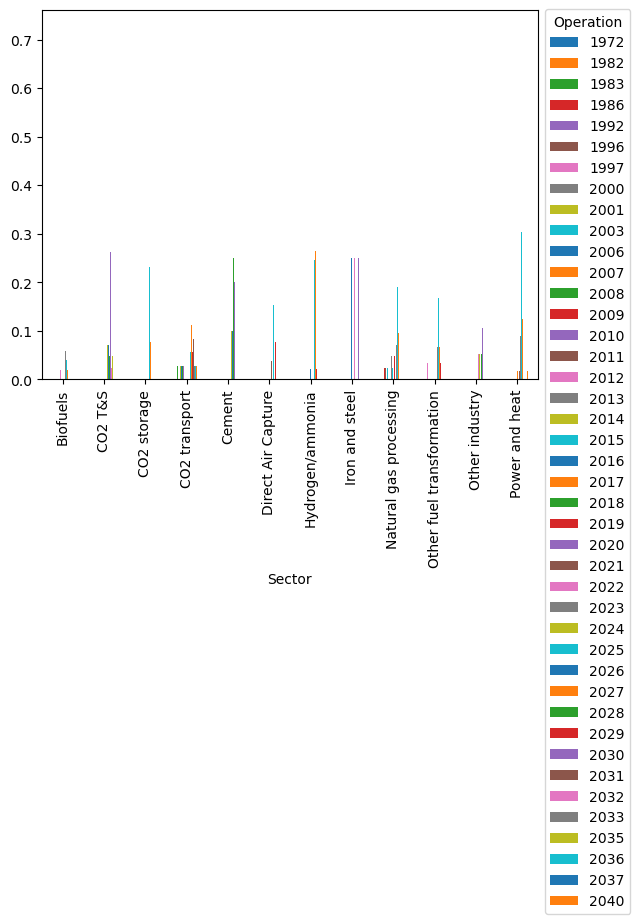

4: Test d'indépendance


Not enough values to run a test



____________ Test #  11   Sector  vs  Announcement  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Sector  =  Biofuels  et  Announcement  =  1991


Announcement               1991  1997  2002  2006  2007  2008  2009  2010  \
Sector                                                                      
Biofuels                      0     0     0     0     0     0     2     1   
CO2 T&S                       0     0     0     0     0     0     0     2   
CO2 storage                   0     0     0     0     0     0     0     0   
CO2 transport                 0     0     0     0     0     0     0     0   
Cement                        0     0     0     0     0     0     0     0   
Direct Air Capture            0     0     0     0     0     0     0     0   
Hydrogen/ammonia              0     0     0     0     0     1     0     0   
Iron and steel                0     0     0     0     1     0     0     0   
Natural gas processing        1     0     1     1     0     2     1     1   
Other fuel transformation     0     1     0     0     0     0     2     0   
Other industry                0     0     0     0     0     0     1     0   
Power and heat                0     0     0     0     0     1     1     1   

Announcement               2011  2012  ...  2014  2015  2016  2017  2018  \
Sector                                 ...                                 
Biofuels                      0     0  ...     0     0     1     0     2   
CO2 T&S                       0     0  ...     0     0     1     4     3   
CO2 storage                   1     0  ...     0     0     0     1     0   
CO2 transport                 1     0  ...     0     0     0     0     0   
Cement                        0     0  ...     0     0     1     0     0   
Direct Air Capture            0     0  ...     0     0     0     0     0   
Hydrogen/ammonia              0     0  ...     1     0     1     1     5   
Iron and steel                1     0  ...     0     0     0     1     0   
Natural gas processing        1     0  ...     0     0     1     0     3   
Other fuel transformation     1     1  ...     0     1     0     0     2   
Other industry                3     1  ...     0     1     0     0     1   
Power and heat                2     1  ...     0     0     3     0     6   

Announcement               2019  2020  2021  2022  2023  
Sector                                                   
Biofuels                      1     3    39     8     1  
CO2 T&S                       5    13    18    15     5  
CO2 storage                   0     1     5    33    10  
CO2 transport                 2     1     8    19     9  
Cement                        2     4    10     6     4  
Direct Air Capture            2     3     7    19     0  
Hydrogen/ammonia              3     6    35    16     4  
Iron and steel                1     2     0     1     0  
Natural gas processing        2     6    12    10     1  
Other fuel transformation     3     1    17     9     0  
Other industry                1     0    14    10     2  
Power and heat               13     7    25    19     1  

[12 rows x 21 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Sector  =  Biofuels ;  0.0 % sont des projets tels que  Announcement  =  1991 
 tandis que Parmi les projets tels que  Sector  =  CO2 T&S ;  0.0 % sont des projets tels que  Announcement  =  1991


Announcement                   1991      1997      2002      2006      2007  \
Sector                                                                        
Biofuels                   0.000000  0.000000  0.000000  0.000000  0.000000   
CO2 T&S                    0.000000  0.000000  0.000000  0.000000  0.000000   
CO2 storage                0.000000  0.000000  0.000000  0.000000  0.000000   
CO2 transport              0.000000  0.000000  0.000000  0.000000  0.000000   
Cement                     0.000000  0.000000  0.000000  0.000000  0.000000   
Direct Air Capture         0.000000  0.000000  0.000000  0.000000  0.000000   
Hydrogen/ammonia           0.000000  0.000000  0.000000  0.000000  0.000000   
Iron and steel             0.000000  0.000000  0.000000  0.000000  0.142857   
Natural gas processing     0.022727  0.000000  0.022727  0.022727  0.000000   
Other fuel transformation  0.000000  0.026316  0.000000  0.000000  0.000000   
Other industry             0.000000  0.000000  0.000000  0.000000  0.000000   
Power and heat             0.000000  0.000000  0.000000  0.000000  0.000000   

Announcement                   2008      2009      2010      2011      2012  \
Sector                                                                        
Biofuels                   0.000000  0.033898  0.016949  0.000000  0.000000   
CO2 T&S                    0.000000  0.000000  0.030303  0.000000  0.000000   
CO2 storage                0.000000  0.000000  0.000000  0.019608  0.000000   
CO2 transport              0.000000  0.000000  0.000000  0.025000  0.000000   
Cement                     0.000000  0.000000  0.000000  0.000000  0.000000   
Direct Air Capture         0.000000  0.000000  0.000000  0.000000  0.000000   
Hydrogen/ammonia           0.013699  0.000000  0.000000  0.000000  0.000000   
Iron and steel             0.000000  0.000000  0.000000  0.142857  0.000000   
Natural gas processing     0.045455  0.022727  0.022727  0.022727  0.000000   
Other fuel transformation  0.000000  0.052632  0.000000  0.026316  0.026316   
Other industry             0.000000  0.028571  0.000000  0.085714  0.028571   
Power and heat             0.012195  0.012195  0.012195  0.024390  0.012195   

Announcement               ...      2014      2015      2016      2017  \
Sector                     ...                                           
Biofuels                   ...  0.000000  0.000000  0.016949  0.000000   
CO2 T&S                    ...  0.000000  0.000000  0.015152  0.060606   
CO2 storage                ...  0.000000  0.000000  0.000000  0.019608   
CO2 transport              ...  0.000000  0.000000  0.000000  0.000000   
Cement                     ...  0.000000  0.000000  0.037037  0.000000   
Direct Air Capture         ...  0.000000  0.000000  0.000000  0.000000   
Hydrogen/ammonia           ...  0.013699  0.000000  0.013699  0.013699   
Iron and steel             ...  0.000000  0.000000  0.000000  0.142857   
Natural gas processing     ...  0.000000  0.000000  0.022727  0.000000   
Other fuel transformation  ...  0.000000  0.026316  0.000000  0.000000   
Other industry             ...  0.000000  0.028571  0.000000  0.000000   
Power and heat             ...  0.000000  0.000000  0.036585  0.000000   

Announcement                   2018      2019      2020      2021      2022  \
Sector                                                                        
Biofuels                   0.033898  0.016949  0.050847  0.661017  0.135593   
CO2 T&S                    0.045455  0.075758  0.196970  0.272727  0.227273   
CO2 storage                0.000000  0.000000  0.019608  0.098039  0.647059   
CO2 transport              0.000000  0.050000  0.025000  0.200000  0.475000   
Cement                     0.000000  0.074074  0.148148  0.370370  0.222222   
Direct Air Capture         0.000000  0.064516  0.096774  0.225806  0.612903   
Hydrogen/ammonia           0.068493  0.041096  0.082192  0.479452  0.219178   
Iron and steel             0.000000  0

3: Histograms to compare distributions 




<Figure size 6000x10500 with 0 Axes>

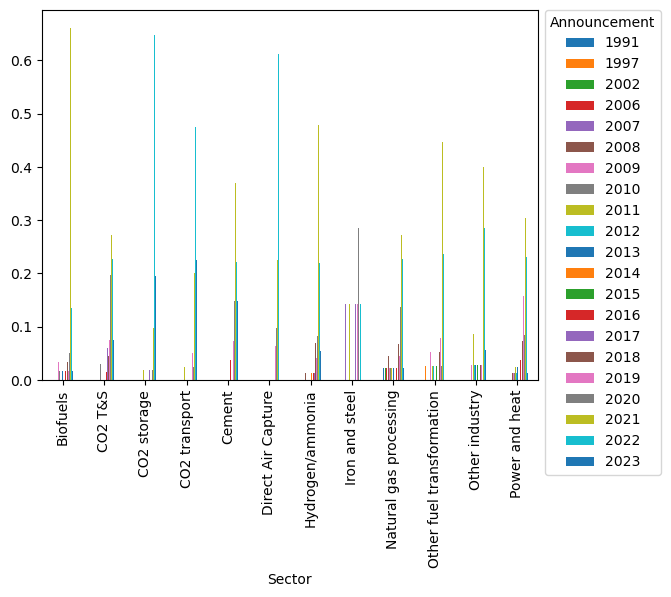

4: Test d'indépendance


Not enough values to run a test



____________ Test #  11   Sector  vs  Project Status  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Sector  =  Biofuels  et  Project Status  =  Decommissioned


Project Status             Decommissioned  Operational  Planned  Suspended  \
Sector                                                                       
Biofuels                                1            4       54          0   
CO2 T&S                                 0            0       64          0   
CO2 storage                             0            1       50          0   
CO2 transport                           0            7       39          0   
Cement                                  0            0       26          0   
Direct Air Capture                      0            1       29          0   
Hydrogen/ammonia                        0            1       69          0   
Iron and steel                          0            2        5          0   
Natural gas processing                  1           14       29          0   
Other fuel transformation               0            7       33          0   
Other industry                          0            7       28          0   
Power and heat                          1            3       73          1   

Project Status             Under construction  
Sector                                         
Biofuels                                    1  
CO2 T&S                                     2  
CO2 storage                                 0  
CO2 transport                               0  
Cement                                      1  
Direct Air Capture                          2  
Hydrogen/ammonia                            3  
Iron and steel                              0  
Natural gas processing                      6  
Other fuel transformation                   1  
Other industry                              2  
Power and heat                              5

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Sector  =  Biofuels ;  1.6666666666666667 % sont des projets tels que  Project Status  =  Decommissioned 
 tandis que Parmi les projets tels que  Sector  =  CO2 T&S ;  0.0 % sont des projets tels que  Project Status  =  Decommissioned


Project Status             Decommissioned  Operational   Planned  Suspended  \
Sector                                                                        
Biofuels                         0.016667     0.066667  0.900000   0.000000   
CO2 T&S                          0.000000     0.000000  0.969697   0.000000   
CO2 storage                      0.000000     0.019608  0.980392   0.000000   
CO2 transport                    0.000000     0.152174  0.847826   0.000000   
Cement                           0.000000     0.000000  0.962963   0.000000   
Direct Air Capture               0.000000     0.031250  0.906250   0.000000   
Hydrogen/ammonia                 0.000000     0.013699  0.945205   0.000000   
Iron and steel                   0.000000     0.285714  0.714286   0.000000   
Natural gas processing           0.020000     0.280000  0.580000   0.000000   
Other fuel transformation        0.000000     0.170732  0.804878   0.000000   
Other industry                   0.000000     0.189189  0.756757   0.000000   
Power and heat                   0.012048     0.036145  0.879518   0.012048   

Project Status             Under construction  
Sector                                         
Biofuels                             0.016667  
CO2 T&S                              0.030303  
CO2 storage                          0.000000  
CO2 transport                        0.000000  
Cement                               0.037037  
Direct Air Capture                   0.062500  
Hydrogen/ammonia                     0.041096  
Iron and steel                       0.000000  
Natural gas processing               0.120000  
Other fuel transformation            0.024390  
Other industry                       0.054054  
Power and heat                       0.060241

3: Histograms to compare distributions 




<Figure size 6000x2500 with 0 Axes>

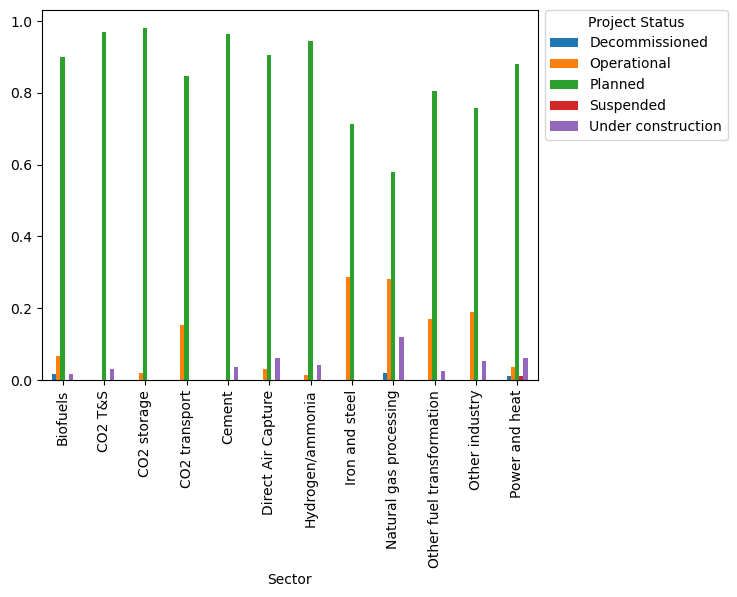

4: Test d'indépendance


Running Tests using answers:  Index(['Planned'], dtype='object', name='Project Status')
Test Statistic Value:  0.0
Test P-Value:  100.0 %
Conclusion: we cannot reject the hypothesis of independance between  Sector and  Project Status , that is to say any difference noticed in the distributions of  Sector  according to  Project Status  may be due to statistical coincidence



____________ Test #  11   Fate of carbon  vs  Project type  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Fate of carbon  =  Dedicated storage  et  Project type  =  CCU


Project type         CCU  Capture  Full chain  Storage  T&S
Fate of carbon                                             
Dedicated storage      0      165          78       51   58
EOR                    0       13          44        1    3
EOR and use            0        0           1        0    0
Mixed                  0        1           0        0    0
Storage                0        0           0        0    1
Unknown/unspecified    0       50          21        0    2
Use                   32        2           0        0    0
Use and EOR            0        0           1        0    0
Use and storage        0        2           0        0    0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Fate of carbon  =  Dedicated storage ;  0.0 % sont des projets tels que  Project type  =  CCU 
 tandis que Parmi les projets tels que  Fate of carbon  =  EOR ;  0.0 % sont des projets tels que  Project type  =  CCU


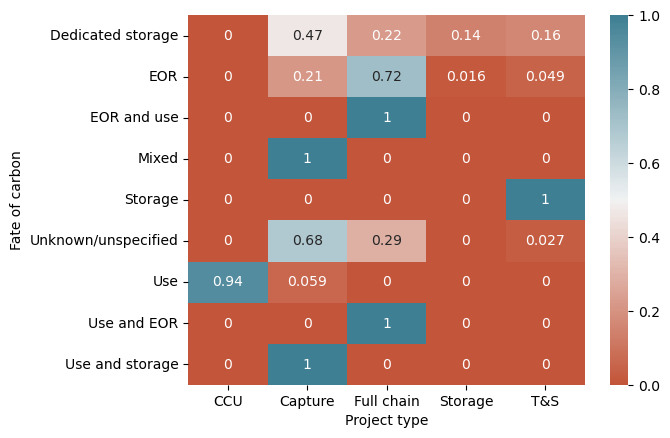

3: Histograms to compare distributions 




<Figure size 4500x2500 with 0 Axes>

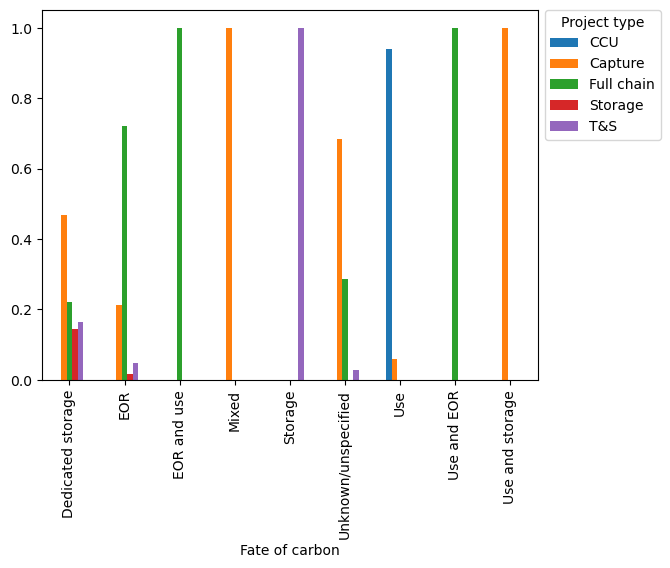

4: Test d'indépendance


Not enough values to run a test



____________ Test #  8   Fate of carbon  vs  Sector  ______________


1.: Counts


A lire de la façon suivante:  53  projets sont tels que  Fate of carbon  =  Dedicated storage  et  Sector  =  Biofuels


Sector               Biofuels  CO2 T&S  CO2 storage  Cement  \
Fate of carbon                                                
Dedicated storage          53       60           50      17   
EOR                         6        3            1       0   
EOR and use                 0        0            0       0   
Mixed                       0        0            0       0   
Storage                     0        1            0       0   
Unknown/unspecified         0        2            0       4   
Use                         1        0            0       6   
Use and EOR                 0        0            0       0   
Use and storage             0        0            0       0   

Sector               Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Fate of carbon                                                              
Dedicated storage                    18                50               2   
EOR                                   2                 3               1   
EOR and use                           0                 0               0   
Mixed                                 0                 0               0   
Storage                               0                 0               0   
Unknown/unspecified                   0                18               2   
Use                                  11                 1               2   
Use and EOR                           0                 0               0   
Use and storage                       0                 1               0   

Sector               Natural gas processing  Other fuel transformation  \
Fate of carbon                                                           
Dedicated storage                        23                         16   
EOR                                      16                         10   
EOR and use                               0                          1   
Mixed                                     0                          0   
Storage                                   0                          0   
Unknown/unspecified                      10                         11   
Use                                       0                          3   
Use and EOR                               1                          0   
Use and storage                           0                          0   

Sector               Other industry  Power and heat  
Fate of carbon                                       
Dedicated storage                16              47  
EOR                               9              10  
EOR and use                       0               0  
Mixed                             0               1  
Storage                           0               0  
Unknown/unspecified               7              19  
Use                               4               6  
Use and EOR                       0               0  
Use and storage                   1               0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Fate of carbon  =  Dedicated storage ;  15.056818181818182 % sont des projets tels que  Sector  =  Biofuels 
 tandis que Parmi les projets tels que  Fate of carbon  =  EOR ;  9.836065573770492 % sont des projets tels que  Sector  =  Biofuels


Sector               Biofuels   CO2 T&S  CO2 storage    Cement  \
Fate of carbon                                                   
Dedicated storage    0.150568  0.170455     0.142045  0.048295   
EOR                  0.098361  0.049180     0.016393  0.000000   
EOR and use          0.000000  0.000000     0.000000  0.000000   
Mixed                0.000000  0.000000     0.000000  0.000000   
Storage              0.000000  1.000000     0.000000  0.000000   
Unknown/unspecified  0.000000  0.027397     0.000000  0.054795   
Use                  0.029412  0.000000     0.000000  0.176471   
Use and EOR          0.000000  0.000000     0.000000  0.000000   
Use and storage      0.000000  0.000000     0.000000  0.000000   

Sector               Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Fate of carbon                                                              
Dedicated storage              0.051136          0.142045        0.005682   
EOR                            0.032787          0.049180        0.016393   
EOR and use                    0.000000          0.000000        0.000000   
Mixed                          0.000000          0.000000        0.000000   
Storage                        0.000000          0.000000        0.000000   
Unknown/unspecified            0.000000          0.246575        0.027397   
Use                            0.323529          0.029412        0.058824   
Use and EOR                    0.000000          0.000000        0.000000   
Use and storage                0.000000          0.500000        0.000000   

Sector               Natural gas processing  Other fuel transformation  \
Fate of carbon                                                           
Dedicated storage                  0.065341                   0.045455   
EOR                                0.262295                   0.163934   
EOR and use                        0.000000                   1.000000   
Mixed                              0.000000                   0.000000   
Storage                            0.000000                   0.000000   
Unknown/unspecified                0.136986                   0.150685   
Use                                0.000000                   0.088235   
Use and EOR                        1.000000                   0.000000   
Use and storage                    0.000000                   0.000000   

Sector               Other industry  Power and heat  
Fate of carbon                                       
Dedicated storage          0.045455        0.133523  
EOR                        0.147541        0.163934  
EOR and use                0.000000        0.000000  
Mixed                      0.000000        1.000000  
Storage                    0.000000        0.000000  
Unknown/unspecified        0.095890        0.260274  
Use                        0.117647        0.176471  
Use and EOR                0.000000        0.000000  
Use and storage            0.500000        0.000000

3: Histograms to compare distributions 




<Figure size 4500x5500 with 0 Axes>

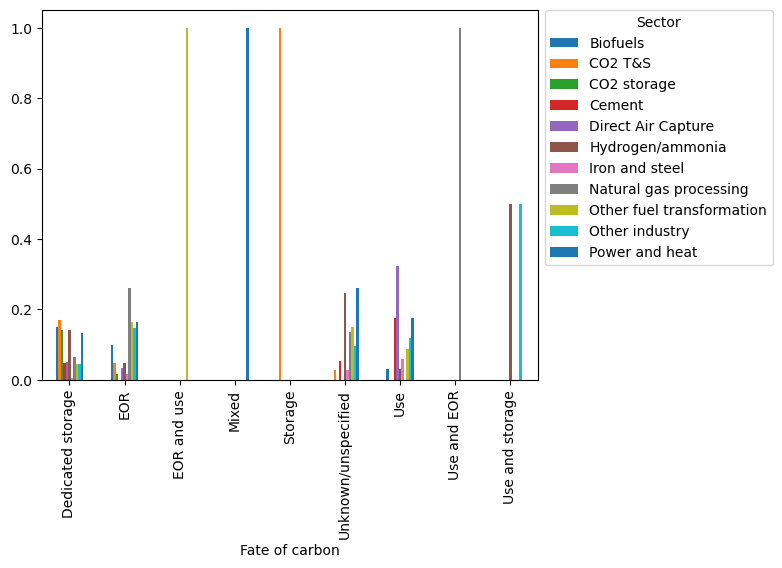

4: Test d'indépendance


Not enough values to run a test



____________ Test #  8   Fate of carbon  vs  Region  ______________


1.: Counts


A lire de la façon suivante:  2  projets sont tels que  Fate of carbon  =  Dedicated storage  et  Region  =  Africa


Region               Africa  Asia  Asia Pacific  Europe  Middle East  \
Fate of carbon                                                         
Dedicated storage         2    11            29     146            4   
EOR                       0    15             5       1            3   
EOR and use               0     1             0       0            0   
Mixed                     0     1             0       0            0   
Storage                   0     0             0       1            0   
Unknown/unspecified       0     8             6      13            5   
Use                       0     3             3      20            1   
Use and EOR               0     0             0       0            1   
Use and storage           0     0             0       0            0   

Region               North America  South America  
Fate of carbon                                     
Dedicated storage              157              1  
EOR                             36              1  
EOR and use                      0              0  
Mixed                            0              0  
Storage                          0              0  
Unknown/unspecified             40              1  
Use                              5              2  
Use and EOR                      0              0  
Use and storage                  2              0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Fate of carbon  =  Dedicated storage ;  0.5714285714285714 % sont des projets tels que  Region  =  Africa 
 tandis que Parmi les projets tels que  Fate of carbon  =  EOR ;  0.0 % sont des projets tels que  Region  =  Africa


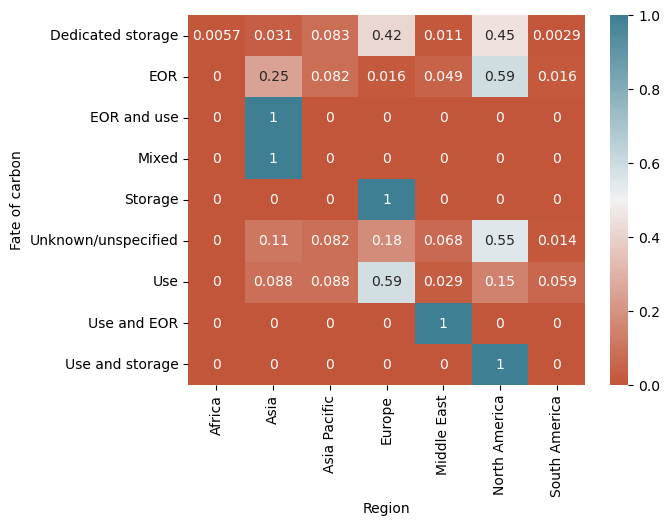

3: Histograms to compare distributions 




<Figure size 4500x3500 with 0 Axes>

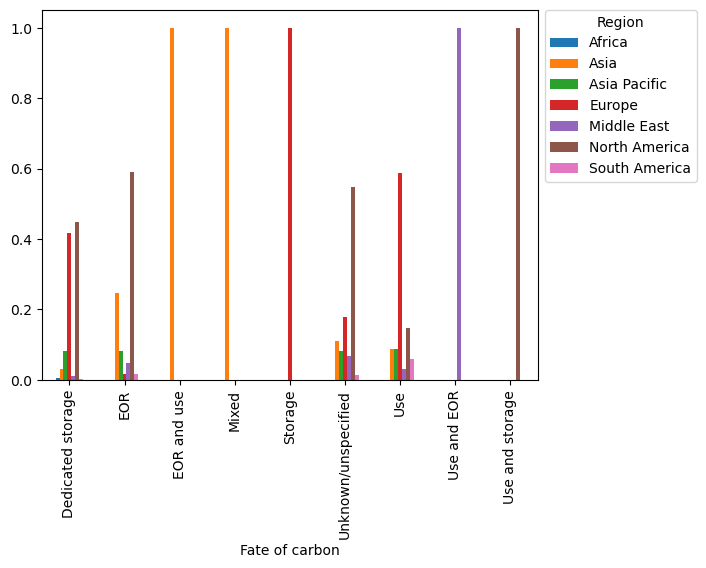

4: Test d'indépendance


Not enough values to run a test



____________ Test #  8   Fate of carbon  vs  Operation  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Fate of carbon  =  Dedicated storage  et  Operation  =  1972


Operation            1972  1982  1986  1992  1996  1997  2000  2003  2008  \
Fate of carbon                                                              
Dedicated storage       0     0     0     0     1     0     0     0     1   
EOR                     1     1     1     1     0     0     1     1     0   
EOR and use             0     0     0     0     0     0     0     0     0   
Mixed                   0     0     0     0     0     0     0     0     0   
Unknown/unspecified     0     0     0     0     0     0     0     0     0   
Use                     0     0     0     0     0     1     0     0     0   
Use and EOR             0     0     0     0     0     0     0     0     0   
Use and storage         0     0     0     0     0     0     0     0     0   

Operation            2009  ...  2025  2026  2027  2028  2029  2030  2031  \
Fate of carbon             ...                                             
Dedicated storage       0  ...    41    25    34    16     4    31     2   
EOR                     1  ...     6     4     2     1     1     5     0   
EOR and use             0  ...     1     0     0     0     0     0     0   
Mixed                   0  ...     0     0     0     0     0     0     0   
Unknown/unspecified     0  ...    10     1     2     6     0    11     0   
Use                     1  ...     6     5     2     0     2     1     0   
Use and EOR             0  ...     0     0     0     0     0     0     0   
Use and storage         0  ...     2     0     0     0     0     0     0   

Operation            2032  2035  2040  
Fate of carbon                         
Dedicated storage       3     5     1  
EOR                     0     0     0  
EOR and use             0     0     0  
Mixed                   0     0     0  
Unknown/unspecified     0     0     0  
Use                     0     0     0  
Use and EOR             0     0     0  
Use and storage         0     0     0  

[8 rows x 35 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Fate of carbon  =  Dedicated storage ;  0.0 % sont des projets tels que  Operation  =  1972 
 tandis que Parmi les projets tels que  Fate of carbon  =  EOR ;  1.7241379310344827 % sont des projets tels que  Operation  =  1972


Operation                1972      1982      1986      1992      1996  \
Fate of carbon                                                          
Dedicated storage    0.000000  0.000000  0.000000  0.000000  0.004405   
EOR                  0.017241  0.017241  0.017241  0.017241  0.000000   
EOR and use          0.000000  0.000000  0.000000  0.000000  0.000000   
Mixed                0.000000  0.000000  0.000000  0.000000  0.000000   
Unknown/unspecified  0.000000  0.000000  0.000000  0.000000  0.000000   
Use                  0.000000  0.000000  0.000000  0.000000  0.000000   
Use and EOR          0.000000  0.000000  0.000000  0.000000  0.000000   
Use and storage      0.000000  0.000000  0.000000  0.000000  0.000000   

Operation                1997      2000      2003      2008      2009  ...  \
Fate of carbon                                                         ...   
Dedicated storage    0.000000  0.000000  0.000000  0.004405  0.000000  ...   
EOR                  0.000000  0.017241  0.017241  0.000000  0.017241  ...   
EOR and use          0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Mixed                0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Unknown/unspecified  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Use                  0.041667  0.000000  0.000000  0.000000  0.041667  ...   
Use and EOR          0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Use and storage      0.000000  0.000000  0.000000  0.000000  0.000000  ...   

Operation                2025      2026      2027      2028      2029  \
Fate of carbon                                                          
Dedicated storage    0.180617  0.110132  0.149780  0.070485  0.017621   
EOR                  0.103448  0.068966  0.034483  0.017241  0.017241   
EOR and use          1.000000  0.000000  0.000000  0.000000  0.000000   
Mixed                0.000000  0.000000  0.000000  0.000000  0.000000   
Unknown/unspecified  0.270270  0.027027  0.054054  0.162162  0.000000   
Use                  0.250000  0.208333  0.083333  0.000000  0.083333   
Use and EOR          0.000000  0.000000  0.000000  0.000000  0.000000   
Use and storage      1.000000  0.000000  0.000000  0.000000  0.000000   

Operation                2030      2031      2032      2035      2040  
Fate of carbon                                                         
Dedicated storage    0.136564  0.008811  0.013216  0.022026  0.004405  
EOR                  0.086207  0.000000  0.000000  0.000000  0.000000  
EOR and use          0.000000  0.000000  0.000000  0.000000  0.000000  
Mixed                0.000000  0.000000  0.000000  0.000000  0.000000  
Unknown/unspecified  0.297297  0.000000  0.000000  0.000000  0.000000  
Use                  0.041667  0.000000  0.000000  0.000000  0.000000  
Use and EOR          0.000000  0.000000  0.000000  0.000000  0.000000  
Use and storage      0.000000  0.000000  0.000000  0.000000  0.000000  

[8 rows x 35 columns]

3: Histograms to compare distributions 




<Figure size 4000x17500 with 0 Axes>

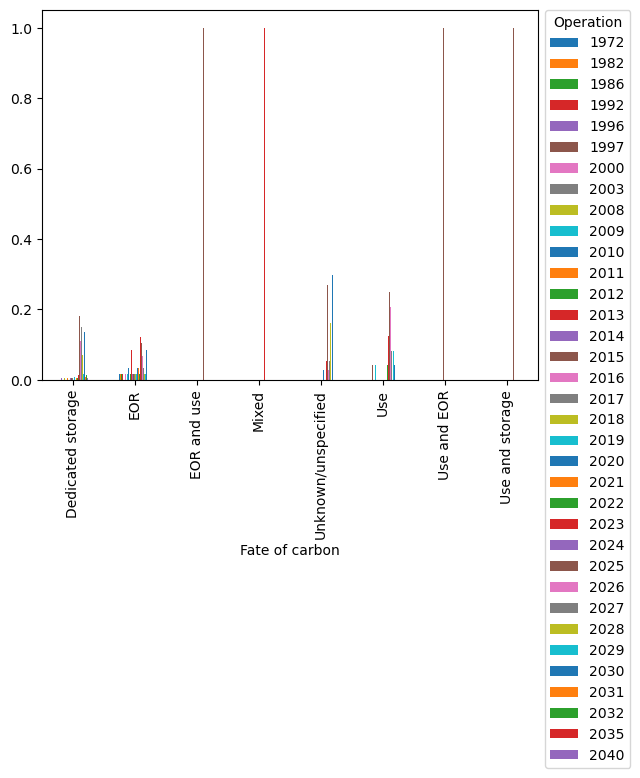

4: Test d'indépendance


Not enough values to run a test



____________ Test #  7   Fate of carbon  vs  Announcement  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Fate of carbon  =  Dedicated storage  et  Announcement  =  1991


Announcement         1991  1997  2002  2006  2007  2008  2009  2010  2011  \
Fate of carbon                                                              
Dedicated storage       1     0     1     0     0     1     4     3     0   
EOR                     0     1     0     1     1     3     2     2     7   
EOR and use             0     0     0     0     0     0     0     0     0   
Mixed                   0     0     0     0     0     0     0     0     0   
Storage                 0     0     0     0     0     0     0     0     0   
Unknown/unspecified     0     0     0     0     0     0     0     0     1   
Use                     0     0     0     0     0     0     0     0     1   
Use and EOR             0     0     0     0     0     0     0     0     0   
Use and storage         0     0     0     0     0     0     1     0     0   

Announcement         2012  ...  2014  2015  2016  2017  2018  2019  2020  \
Fate of carbon             ...                                             
Dedicated storage       2  ...     1     0     6     6    12    19    31   
EOR                     1  ...     0     2     0     0     5     9     4   
EOR and use             0  ...     0     0     0     0     0     0     0   
Mixed                   0  ...     0     0     0     0     0     0     0   
Storage                 0  ...     0     0     0     0     0     0     0   
Unknown/unspecified     0  ...     0     0     2     0     5     2     6   
Use                     0  ...     0     0     0     1     0     3     5   
Use and EOR             0  ...     0     0     0     0     0     0     0   
Use and storage         0  ...     0     0     0     0     0     0     0   

Announcement         2021  2022  2023  
Fate of carbon                         
Dedicated storage     123   116    22  
EOR                    11     3     0  
EOR and use             1     0     0  
Mixed                   1     0     0  
Storage                 0     0     1  
Unknown/unspecified    30    20     4  
Use                    15     6     1  
Use and EOR             0     0     0  
Use and storage         1     0     0  

[9 rows x 21 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Fate of carbon  =  Dedicated storage ;  0.2857142857142857 % sont des projets tels que  Announcement  =  1991 
 tandis que Parmi les projets tels que  Fate of carbon  =  EOR ;  0.0 % sont des projets tels que  Announcement  =  1991


Announcement             1991      1997      2002      2006      2007  \
Fate of carbon                                                          
Dedicated storage    0.002857  0.000000  0.002857  0.000000  0.000000   
EOR                  0.000000  0.018868  0.000000  0.018868  0.018868   
EOR and use          0.000000  0.000000  0.000000  0.000000  0.000000   
Mixed                0.000000  0.000000  0.000000  0.000000  0.000000   
Storage              0.000000  0.000000  0.000000  0.000000  0.000000   
Unknown/unspecified  0.000000  0.000000  0.000000  0.000000  0.000000   
Use                  0.000000  0.000000  0.000000  0.000000  0.000000   
Use and EOR          0.000000  0.000000  0.000000  0.000000  0.000000   
Use and storage      0.000000  0.000000  0.000000  0.000000  0.000000   

Announcement             2008      2009      2010      2011      2012  ...  \
Fate of carbon                                                         ...   
Dedicated storage    0.002857  0.011429  0.008571  0.000000  0.005714  ...   
EOR                  0.056604  0.037736  0.037736  0.132075  0.018868  ...   
EOR and use          0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Mixed                0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Storage              0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Unknown/unspecified  0.000000  0.000000  0.000000  0.014085  0.000000  ...   
Use                  0.000000  0.000000  0.000000  0.031250  0.000000  ...   
Use and EOR          0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Use and storage      0.000000  0.500000  0.000000  0.000000  0.000000  ...   

Announcement             2014      2015      2016      2017      2018  \
Fate of carbon                                                          
Dedicated storage    0.002857  0.000000  0.017143  0.017143  0.034286   
EOR                  0.000000  0.037736  0.000000  0.000000  0.094340   
EOR and use          0.000000  0.000000  0.000000  0.000000  0.000000   
Mixed                0.000000  0.000000  0.000000  0.000000  0.000000   
Storage              0.000000  0.000000  0.000000  0.000000  0.000000   
Unknown/unspecified  0.000000  0.000000  0.028169  0.000000  0.070423   
Use                  0.000000  0.000000  0.000000  0.031250  0.000000   
Use and EOR          0.000000  0.000000  0.000000  0.000000  0.000000   
Use and storage      0.000000  0.000000  0.000000  0.000000  0.000000   

Announcement             2019      2020      2021      2022      2023  
Fate of carbon                                                         
Dedicated storage    0.054286  0.088571  0.351429  0.331429  0.062857  
EOR                  0.169811  0.075472  0.207547  0.056604  0.000000  
EOR and use          0.000000  0.000000  1.000000  0.000000  0.000000  
Mixed                0.000000  0.000000  1.000000  0.000000  0.000000  
Storage              0.000000  0.000000  0.000000  0.000000  1.000000  
Unknown/unspecified  0.028169  0.084507  0.422535  0.281690  0.056338  
Use                  0.093750  0.156250  0.468750  0.187500  0.031250  
Use and EOR          0.000000  0.000000  0.000000  0.000000  0.000000  
Use and storage      0.000000  0.000000  0.500000  0.000000  0.000000  

[9 rows x 21 columns]

3: Histograms to compare distributions 




<Figure size 4500x10500 with 0 Axes>

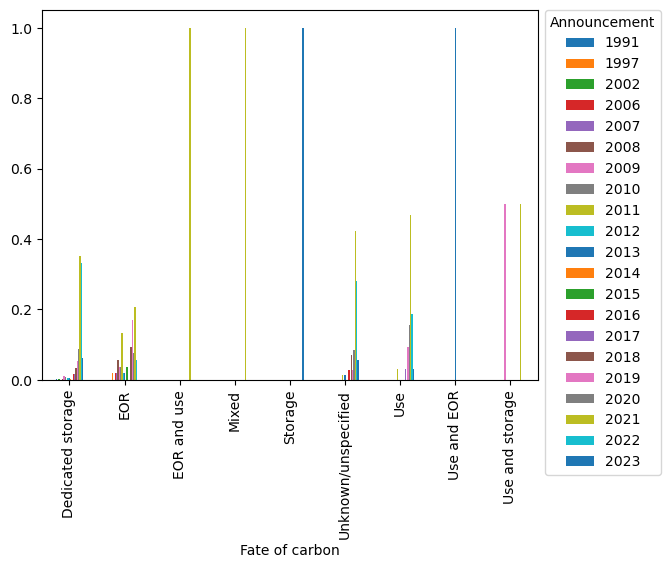

4: Test d'indépendance


Not enough values to run a test



____________ Test #  8   Fate of carbon  vs  Project Status  ______________


1.: Counts


A lire de la façon suivante:  2  projets sont tels que  Fate of carbon  =  Dedicated storage  et  Project Status  =  Decommissioned


Project Status       Decommissioned  Operational  Planned  Suspended  \
Fate of carbon                                                         
Dedicated storage                 2            9      328          0   
EOR                               1           26       30          1   
EOR and use                       0            0        1          0   
Mixed                             0            0        0          0   
Storage                           0            0        1          0   
Unknown/unspecified               0            1       69          0   
Use                               0            3       28          0   
Use and EOR                       0            1        0          0   
Use and storage                   0            0        2          0   

Project Status       Under construction  
Fate of carbon                           
Dedicated storage                    13  
EOR                                   3  
EOR and use                           0  
Mixed                                 1  
Storage                               0  
Unknown/unspecified                   3  
Use                                   3  
Use and EOR                           0  
Use and storage                       0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Fate of carbon  =  Dedicated storage ;  0.5681818181818182 % sont des projets tels que  Project Status  =  Decommissioned 
 tandis que Parmi les projets tels que  Fate of carbon  =  EOR ;  1.639344262295082 % sont des projets tels que  Project Status  =  Decommissioned


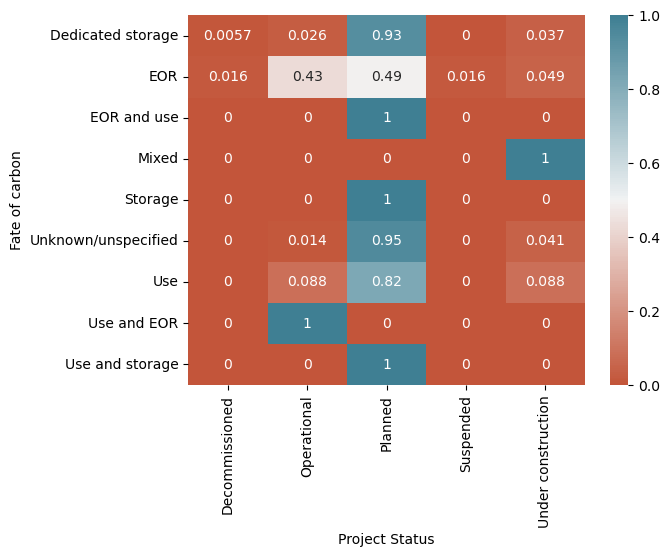

3: Histograms to compare distributions 




<Figure size 4500x2500 with 0 Axes>

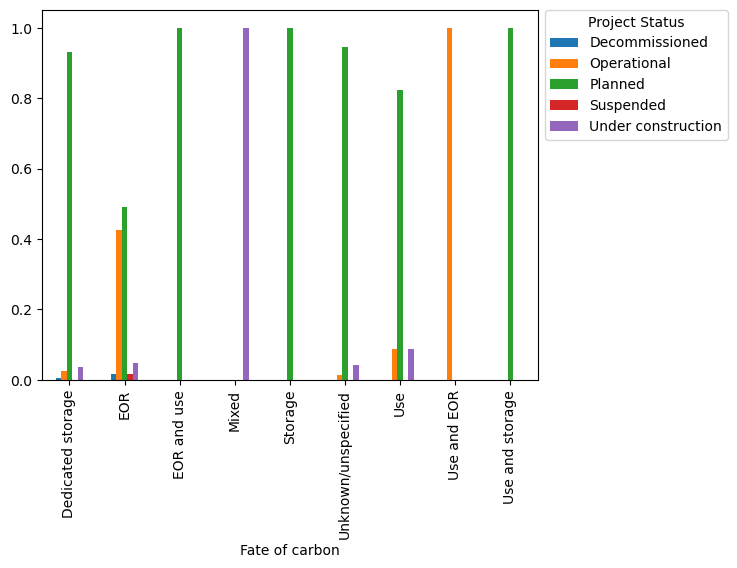

4: Test d'indépendance


Not enough values to run a test



____________ Test #  8   Region  vs  Project type  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Region  =  Africa  et  Project type  =  CCU


Project type            CCU  Capture  Full chain  Storage  T&S  Transport
Region                                                                   
Africa                    0        0           2        0    0          0
Asia                      2        7          25        0    5          0
Asia Pacific              3        9          18        6    7          1
Europe                   19      108          11        6   38         34
Europe + North America    0        0           0        0    0          1
Middle East               1        3           9        0    1          0
North America             5      106          76       40   13         10
South America             2        1           2        0    0          0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Region  =  Africa ;  0.0 % sont des projets tels que  Project type  =  CCU 
 tandis que Parmi les projets tels que  Region  =  Asia ;  5.128205128205128 % sont des projets tels que  Project type  =  CCU


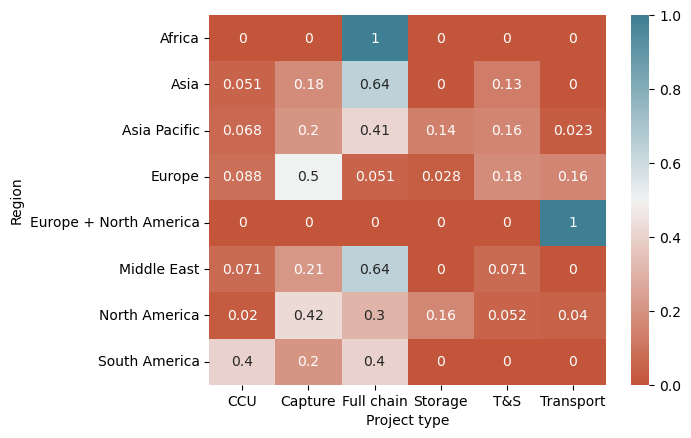

3: Histograms to compare distributions 




<Figure size 4000x3000 with 0 Axes>

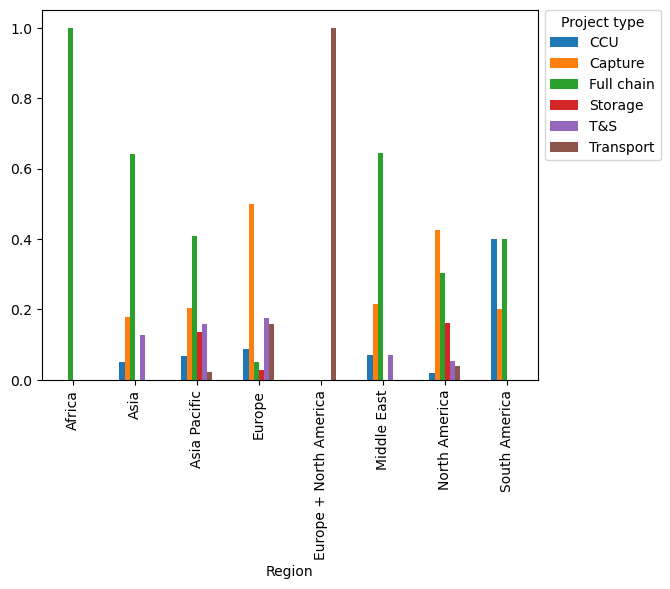

4: Test d'indépendance


Not enough values to run a test



____________ Test #  7   Region  vs  Sector  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Region  =  Africa  et  Sector  =  Biofuels


Sector                  Biofuels  CO2 T&S  CO2 storage  CO2 transport  Cement  \
Region                                                                          
Africa                         0        0            0              0       0   
Asia                           0        6            0              0       1   
Asia Pacific                   0        9            4              1       0   
Europe                         4       37            7             34      19   
Europe + North America         0        0            0              1       0   
Middle East                    0        1            0              0       0   
North America                 55       13           40             10       7   
South America                  1        0            0              0       0   

Sector                  Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Region                                                                         
Africa                                   0                 0               0   
Asia                                     0                 9               0   
Asia Pacific                             0                10               0   
Europe                                  10                29               4   
Europe + North America                   0                 0               0   
Middle East                              1                 2               1   
North America                           17                23               2   
South America                            2                 0               0   

Sector                  Natural gas processing  Other fuel transformation  \
Region                                                                      
Africa                                       2                          0   
Asia                                         4                          6   
Asia Pacific                                13                          2   
Europe                                       5                         16   
Europe + North America                       0                          0   
Middle East                                  7                          0   
North America                               18                         16   
South America                                1                          1   

Sector                  Other industry  Power and heat  
Region                                                  
Africa                               0               0  
Asia                                 5               8  
Asia Pacific                         4               1  
Europe                              11              40  
Europe + North America               0               0  
Middle East                          2               0  
North America                       15              34  
South America                        0               0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Region  =  Africa ;  0.0 % sont des projets tels que  Sector  =  Biofuels 
 tandis que Parmi les projets tels que  Region  =  Asia ;  0.0 % sont des projets tels que  Sector  =  Biofuels


Sector                  Biofuels   CO2 T&S  CO2 storage  CO2 transport  \
Region                                                                   
Africa                  0.000000  0.000000     0.000000       0.000000   
Asia                    0.000000  0.153846     0.000000       0.000000   
Asia Pacific            0.000000  0.204545     0.090909       0.022727   
Europe                  0.018519  0.171296     0.032407       0.157407   
Europe + North America  0.000000  0.000000     0.000000       1.000000   
Middle East             0.000000  0.071429     0.000000       0.000000   
North America           0.220000  0.052000     0.160000       0.040000   
South America           0.200000  0.000000     0.000000       0.000000   

Sector                    Cement  Direct Air Capture  Hydrogen/ammonia  \
Region                                                                   
Africa                  0.000000            0.000000          0.000000   
Asia                    0.025641            0.000000          0.230769   
Asia Pacific            0.000000            0.000000          0.227273   
Europe                  0.087963            0.046296          0.134259   
Europe + North America  0.000000            0.000000          0.000000   
Middle East             0.000000            0.071429          0.142857   
North America           0.028000            0.068000          0.092000   
South America           0.000000            0.400000          0.000000   

Sector                  Iron and steel  Natural gas processing  \
Region                                                           
Africa                        0.000000                1.000000   
Asia                          0.000000                0.102564   
Asia Pacific                  0.000000                0.295455   
Europe                        0.018519                0.023148   
Europe + North America        0.000000                0.000000   
Middle East                   0.071429                0.500000   
North America                 0.008000                0.072000   
South America                 0.000000                0.200000   

Sector                  Other fuel transformation  Other industry  \
Region                                                              
Africa                                   0.000000        0.000000   
Asia                                     0.153846        0.128205   
Asia Pacific                             0.045455        0.090909   
Europe                                   0.074074        0.050926   
Europe + North America                   0.000000        0.000000   
Middle East                              0.000000        0.142857   
North America                            0.064000        0.060000   
South America                            0.200000        0.000000   

Sector                  Power and heat  
Region                                  
Africa                        0.000000  
Asia                          0.205128  
Asia Pacific                  0.022727  
Europe                        0.185185  
Europe + North America        0.000000  
Middle East                   0.000000  
North America                 0.136000  
South America                 0.000000

3: Histograms to compare distributions 




<Figure size 4000x6000 with 0 Axes>

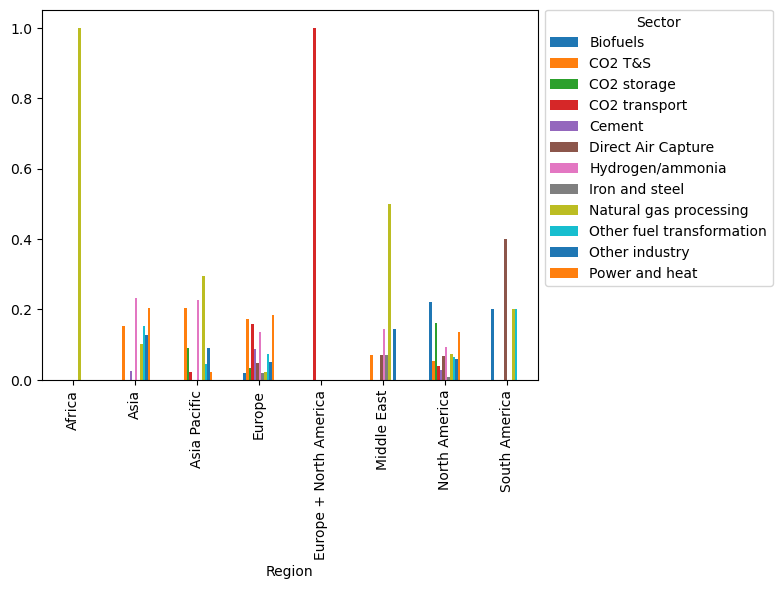

4: Test d'indépendance


Not enough values to run a test



____________ Test #  7   Region  vs  Fate of carbon  ______________


1.: Counts


A lire de la façon suivante:  2  projets sont tels que  Region  =  Africa  et  Fate of carbon  =  Dedicated storage


Fate of carbon  Dedicated storage  EOR  EOR and use  Mixed  Storage  \
Region                                                                
Africa                          2    0            0      0        0   
Asia                           11   15            1      1        0   
Asia Pacific                   29    5            0      0        0   
Europe                        146    1            0      0        1   
Middle East                     4    3            0      0        0   
North America                 157   36            0      0        0   
South America                   1    1            0      0        0   

Fate of carbon  Unknown/unspecified  Use  Use and EOR  Use and storage  
Region                                                                  
Africa                            0    0            0                0  
Asia                              8    3            0                0  
Asia Pacific                      6    3            0                0  
Europe                           13   20            0                0  
Middle East                       5    1            1                0  
North America                    40    5            0                2  
South America                     1    2            0                0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Region  =  Africa ;  100.0 % sont des projets tels que  Fate of carbon  =  Dedicated storage 
 tandis que Parmi les projets tels que  Region  =  Asia ;  28.205128205128204 % sont des projets tels que  Fate of carbon  =  Dedicated storage


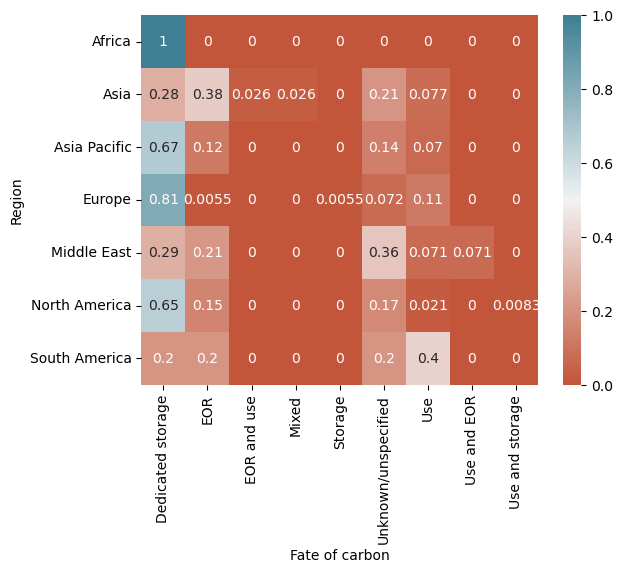

3: Histograms to compare distributions 




<Figure size 3500x4500 with 0 Axes>

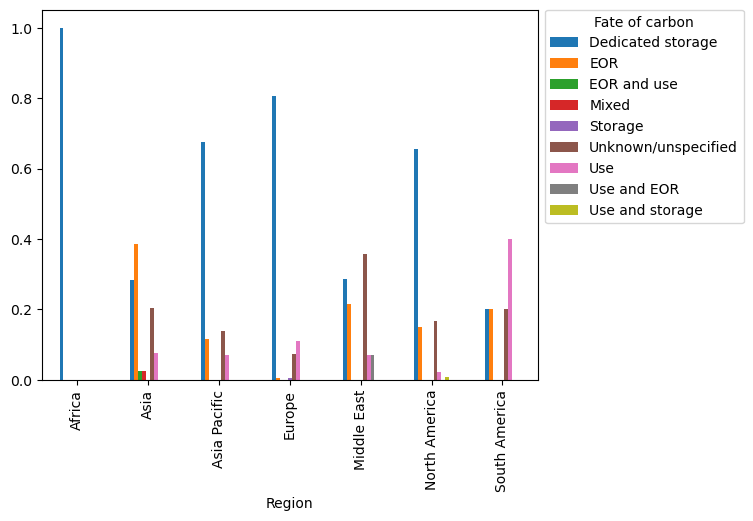

4: Test d'indépendance


Not enough values to run a test



____________ Test #  6   Region  vs  Operation  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Region  =  Africa  et  Operation  =  1972


Operation               1972  1982  1983  1986  1992  1996  1997  2000  2001  \
Region                                                                         
Africa                     0     0     0     0     0     0     0     0     0   
Asia                       0     0     0     0     0     0     0     0     0   
Asia Pacific               0     0     0     0     0     0     0     0     0   
Europe                     0     0     0     0     1     1     1     0     0   
Europe + North America     0     0     0     0     0     0     0     0     0   
Middle East                0     0     0     0     0     0     0     0     0   
North America              1     1     1     1     0     0     0     1     1   
South America              0     0     0     0     0     0     0     0     0   

Operation               2003  ...  2028  2029  2030  2031  2032  2033  2035  \
Region                        ...                                             
Africa                     0  ...     0     0     0     0     0     0     0   
Asia                       0  ...     0     0     9     0     0     0     0   
Asia Pacific               0  ...     5     0     3     0     0     0     0   
Europe                     0  ...    18     7    30     5     3     1     4   
Europe + North America     0  ...     0     1     0     0     0     0     0   
Middle East                0  ...     0     0     2     0     0     0     0   
North America              1  ...     4     1     8     0     1     0     1   
South America              0  ...     0     0     1     0     0     0     0   

Operation               2036  2037  2040  
Region                                    
Africa                     0     0     0  
Asia                       0     0     0  
Asia Pacific               0     0     0  
Europe                     1     1     2  
Europe + North America     0     0     0  
Middle East                0     0     0  
North America              0     0     0  
South America              0     0     0  

[8 rows x 42 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Region  =  Africa ;  0.0 % sont des projets tels que  Operation  =  1972 
 tandis que Parmi les projets tels que  Region  =  Asia ;  0.0 % sont des projets tels que  Operation  =  1972


Operation                   1972      1982      1983      1986      1992  \
Region                                                                     
Africa                  0.000000  0.000000  0.000000  0.000000  0.000000   
Asia                    0.000000  0.000000  0.000000  0.000000  0.000000   
Asia Pacific            0.000000  0.000000  0.000000  0.000000  0.000000   
Europe                  0.000000  0.000000  0.000000  0.000000  0.006173   
Europe + North America  0.000000  0.000000  0.000000  0.000000  0.000000   
Middle East             0.000000  0.000000  0.000000  0.000000  0.000000   
North America           0.006711  0.006711  0.006711  0.006711  0.000000   
South America           0.000000  0.000000  0.000000  0.000000  0.000000   

Operation                   1996      1997      2000      2001      2003  ...  \
Region                                                                    ...   
Africa                  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Asia                    0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Asia Pacific            0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Europe                  0.006173  0.006173  0.000000  0.000000  0.000000  ...   
Europe + North America  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Middle East             0.000000  0.000000  0.000000  0.000000  0.000000  ...   
North America           0.000000  0.000000  0.006711  0.006711  0.006711  ...   
South America           0.000000  0.000000  0.000000  0.000000  0.000000  ...   

Operation                   2028      2029      2030      2031      2032  \
Region                                                                     
Africa                  0.000000  0.000000  0.000000  0.000000  0.000000   
Asia                    0.000000  0.000000  0.281250  0.000000  0.000000   
Asia Pacific            0.200000  0.000000  0.120000  0.000000  0.000000   
Europe                  0.111111  0.043210  0.185185  0.030864  0.018519   
Europe + North America  0.000000  1.000000  0.000000  0.000000  0.000000   
Middle East             0.000000  0.000000  0.181818  0.000000  0.000000   
North America           0.026846  0.006711  0.053691  0.000000  0.006711   
South America           0.000000  0.000000  0.250000  0.000000  0.000000   

Operation                   2033      2035      2036      2037      2040  
Region                                                                    
Africa                  0.000000  0.000000  0.000000  0.000000  0.000000  
Asia                    0.000000  0.000000  0.000000  0.000000  0.000000  
Asia Pacific            0.000000  0.000000  0.000000  0.000000  0.000000  
Europe                  0.006173  0.024691  0.006173  0.006173  0.012346  
Europe + North America  0.000000  0.000000  0.000000  0.000000  0.000000  
Middle East             0.000000  0.000000  0.000000  0.000000  0.000000  
North America           0.000000  0.006711  0.000000  0.000000  0.000000  
South America           0.000000  0.000000  0.000000  0.000000  0.000000  

[8 rows x 42 columns]

3: Histograms to compare distributions 




<Figure size 4000x21000 with 0 Axes>

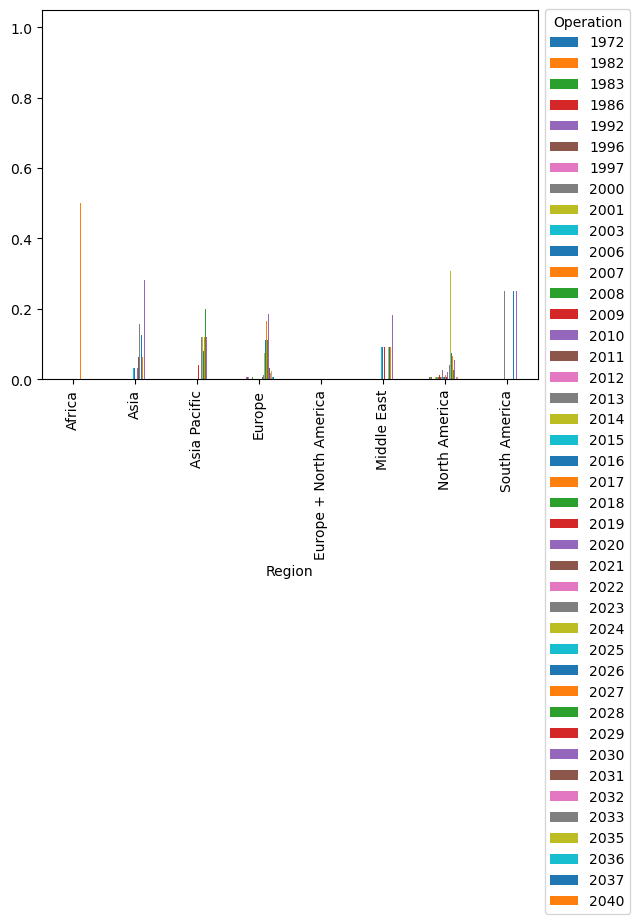

4: Test d'indépendance


Not enough values to run a test



____________ Test #  7   Region  vs  Announcement  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Region  =  Africa  et  Announcement  =  1991


Announcement            1991  1997  2002  2006  2007  2008  2009  2010  2011  \
Region                                                                         
Africa                     0     0     0     0     0     0     0     0     0   
Asia                       0     0     0     1     0     1     0     0     2   
Asia Pacific               0     0     0     0     0     0     1     3     0   
Europe                     1     0     1     0     0     0     0     0     1   
Europe + North America     0     0     0     0     0     0     0     0     0   
Middle East                0     0     0     0     1     0     0     0     0   
North America              0     1     0     0     0     3     6     2     6   
South America              0     0     0     0     0     0     0     0     1   

Announcement            2012  ...  2014  2015  2016  2017  2018  2019  2020  \
Region                        ...                                             
Africa                     0  ...     0     0     0     0     1     0     0   
Asia                       1  ...     0     2     1     0     1     4     0   
Asia Pacific               0  ...     0     0     0     0     4     2     3   
Europe                     2  ...     1     0     4     5    11    18    31   
Europe + North America     0  ...     0     0     0     0     0     0     0   
Middle East                0  ...     0     0     0     0     1     1     3   
North America              0  ...     0     0     3     2     4    10    10   
South America              0  ...     0     0     0     0     0     0     0   

Announcement            2021  2022  2023  
Region                                    
Africa                     0     0     0  
Asia                      12     9     2  
Asia Pacific              15    15     1  
Europe                    73    49    16  
Europe + North America     0     1     0  
Middle East                1     4     2  
North America             86    85    16  
South America              3     0     0  

[8 rows x 21 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Region  =  Africa ;  0.0 % sont des projets tels que  Announcement  =  1991 
 tandis que Parmi les projets tels que  Region  =  Asia ;  0.0 % sont des projets tels que  Announcement  =  1991


Announcement                1991      1997      2002      2006      2007  \
Region                                                                     
Africa                  0.000000  0.000000  0.000000  0.000000  0.000000   
Asia                    0.000000  0.000000  0.000000  0.027027  0.000000   
Asia Pacific            0.000000  0.000000  0.000000  0.000000  0.000000   
Europe                  0.004695  0.000000  0.004695  0.000000  0.000000   
Europe + North America  0.000000  0.000000  0.000000  0.000000  0.000000   
Middle East             0.000000  0.000000  0.000000  0.000000  0.071429   
North America           0.000000  0.004219  0.000000  0.000000  0.000000   
South America           0.000000  0.000000  0.000000  0.000000  0.000000   

Announcement                2008      2009      2010      2011      2012  ...  \
Region                                                                    ...   
Africa                  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Asia                    0.027027  0.000000  0.000000  0.054054  0.027027  ...   
Asia Pacific            0.000000  0.022727  0.068182  0.000000  0.000000  ...   
Europe                  0.000000  0.000000  0.000000  0.004695  0.009390  ...   
Europe + North America  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Middle East             0.000000  0.000000  0.000000  0.000000  0.000000  ...   
North America           0.012658  0.025316  0.008439  0.025316  0.000000  ...   
South America           0.000000  0.000000  0.000000  0.250000  0.000000  ...   

Announcement                2014      2015      2016      2017      2018  \
Region                                                                     
Africa                  0.000000  0.000000  0.000000  0.000000  1.000000   
Asia                    0.000000  0.054054  0.027027  0.000000  0.027027   
Asia Pacific            0.000000  0.000000  0.000000  0.000000  0.090909   
Europe                  0.004695  0.000000  0.018779  0.023474  0.051643   
Europe + North America  0.000000  0.000000  0.000000  0.000000  0.000000   
Middle East             0.000000  0.000000  0.000000  0.000000  0.071429   
North America           0.000000  0.000000  0.012658  0.008439  0.016878   
South America           0.000000  0.000000  0.000000  0.000000  0.000000   

Announcement                2019      2020      2021      2022      2023  
Region                                                                    
Africa                  0.000000  0.000000  0.000000  0.000000  0.000000  
Asia                    0.108108  0.000000  0.324324  0.243243  0.054054  
Asia Pacific            0.045455  0.068182  0.340909  0.340909  0.022727  
Europe                  0.084507  0.145540  0.342723  0.230047  0.075117  
Europe + North America  0.000000  0.000000  0.000000  1.000000  0.000000  
Middle East             0.071429  0.214286  0.071429  0.285714  0.142857  
North America           0.042194  0.042194  0.362869  0.358650  0.067511  
South America           0.000000  0.000000  0.750000  0.000000  0.000000  

[8 rows x 21 columns]

3: Histograms to compare distributions 




<Figure size 4000x10500 with 0 Axes>

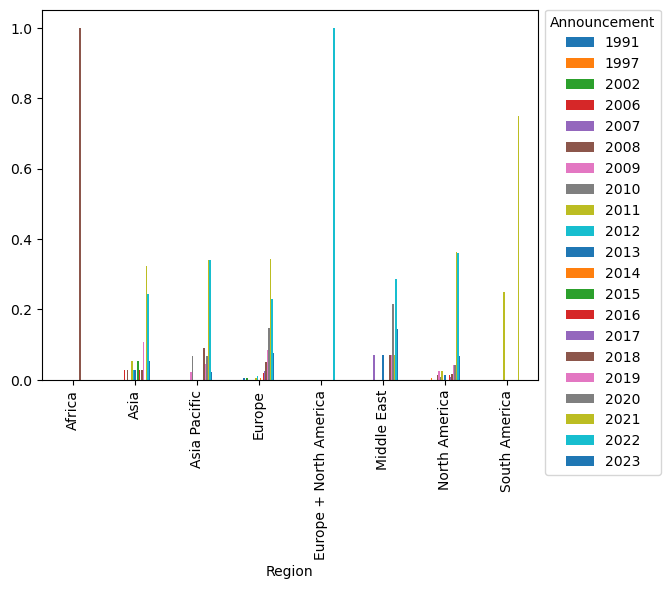

4: Test d'indépendance


Not enough values to run a test



____________ Test #  7   Region  vs  Project Status  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Region  =  Africa  et  Project Status  =  Decommissioned


Project Status          Decommissioned  Operational  Planned  Suspended  \
Region                                                                    
Africa                               1            0        1          0   
Asia                                 0            8       27          0   
Asia Pacific                         0            1       39          0   
Europe                               0            6      204          0   
Europe + North America               0            0        1          0   
Middle East                          0            3       10          0   
North America                        2           28      211          1   
South America                        0            1        4          0   

Project Status          Under construction  
Region                                      
Africa                                   0  
Asia                                     4  
Asia Pacific                             4  
Europe                                   6  
Europe + North America                   0  
Middle East                              1  
North America                            8  
South America                            0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Region  =  Africa ;  50.0 % sont des projets tels que  Project Status  =  Decommissioned 
 tandis que Parmi les projets tels que  Region  =  Asia ;  0.0 % sont des projets tels que  Project Status  =  Decommissioned


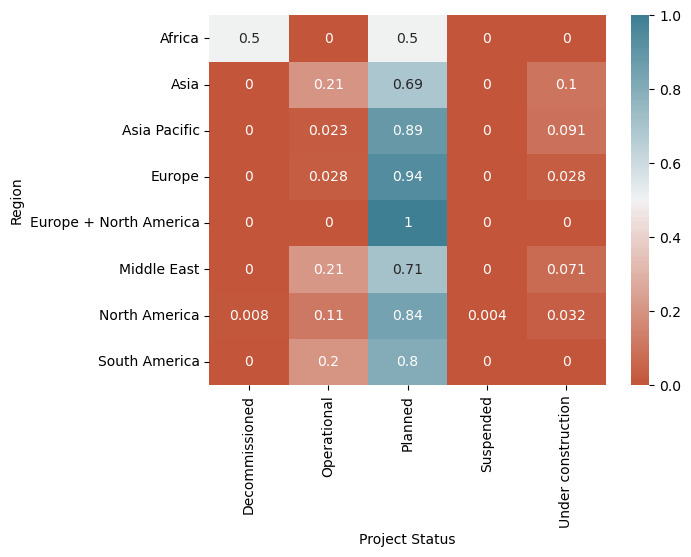

3: Histograms to compare distributions 




<Figure size 4000x2500 with 0 Axes>

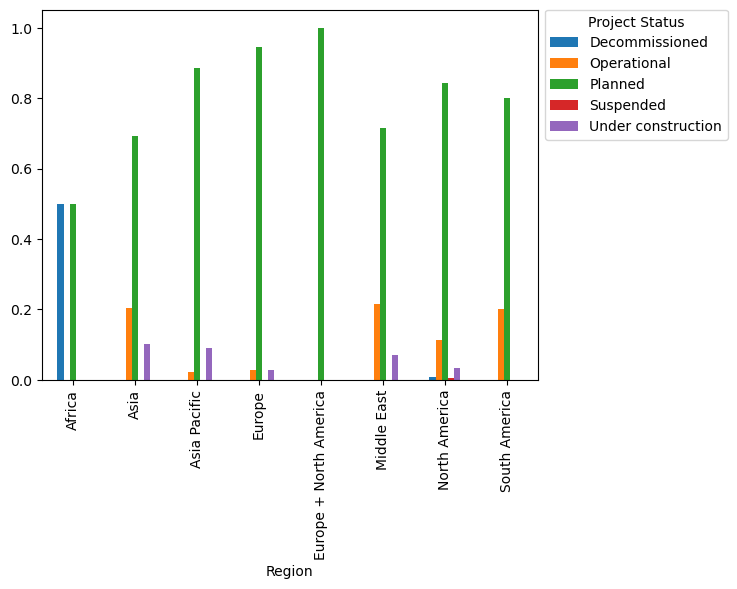

4: Test d'indépendance


Not enough values to run a test



____________ Test #  7   Operation  vs  Project type  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Operation  =  1972  et  Project type  =  CCU


Project type  CCU  Capture  Full chain  Storage  T&S  Transport
Operation                                                      
1972            0        0           1        0    0          0
1982            0        0           1        0    0          0
1983            0        0           0        0    0          1
1986            0        0           1        0    0          0
1992            0        0           1        0    0          0
1996            0        0           1        0    0          0
1997            1        0           0        0    0          0
2000            0        0           1        0    0          0
2001            0        0           0        0    0          1
2003            0        0           1        0    0          0
2006            0        0           0        0    0          1
2007            0        0           0        0    0          1
2008            0        0           1        0    0          1
2009            1        0           1        0    0          0
2010            0        0           2        0    0          1
2011            0        0           1        0    0          0
2012            0        0           1        0    0          0
2013            0        0           5        0    0          0
2014            0        0           2        0    0          0
2015            0        0           3        0    0          0
2016            0        0           3        0    0          0
2017            0        0           2        0    0          0
2018            0        0           1        0    0          0
2019            0        1           2        0    0          0
2020            0        2           0        1    0          1
2021            0        0           3        0    0          0
2022            1        0           2        0    0          0
2023            3        2           9        0    2          0
2024            2       44          11        2    3          0
2025            5       31          21        3    7          2
2026            5       11          13        3    3          2
2027            2       20          10        1    7          4
2028            0       13           7        1    2          4
2029            2        3           0        0    2          2
2030            0       27           9        2   10          6
2031            0        0           0        0    2          3
2032            0        1           1        0    1          1
2033            0        0           0        0    0          1
2035            0        2           1        0    2          1
2036            0        0           0        0    0          1
2037            0        0           0        0    0          1
2040            0        1           0        0    0          1

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Operation  =  1972 ;  0.0 % sont des projets tels que  Project type  =  CCU 
 tandis que Parmi les projets tels que  Operation  =  1982 ;  0.0 % sont des projets tels que  Project type  =  CCU


Project type       CCU   Capture  Full chain   Storage       T&S  Transport
Operation                                                                  
1972          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
1982          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
1983          0.000000  0.000000    0.000000  0.000000  0.000000   1.000000
1986          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
1992          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
1996          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
1997          1.000000  0.000000    0.000000  0.000000  0.000000   0.000000
2000          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2001          0.000000  0.000000    0.000000  0.000000  0.000000   1.000000
2003          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2006          0.000000  0.000000    0.000000  0.000000  0.000000   1.000000
2007          0.000000  0.000000    0.000000  0.000000  0.000000   1.000000
2008          0.000000  0.000000    0.500000  0.000000  0.000000   0.500000
2009          0.500000  0.000000    0.500000  0.000000  0.000000   0.000000
2010          0.000000  0.000000    0.666667  0.000000  0.000000   0.333333
2011          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2012          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2013          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2014          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2015          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2016          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2017          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2018          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2019          0.000000  0.333333    0.666667  0.000000  0.000000   0.000000
2020          0.000000  0.500000    0.000000  0.250000  0.000000   0.250000
2021          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2022          0.333333  0.000000    0.666667  0.000000  0.000000   0.000000
2023          0.187500  0.125000    0.562500  0.000000  0.125000   0.000000
2024          0.032258  0.709677    0.177419  0.032258  0.048387   0.000000
2025          0.072464  0.449275    0.304348  0.043478  0.101449   0.028986
2026          0.135135  0.297297    0.351351  0.081081  0.081081   0.054054
2027          0.045455  0.454545    0.227273  0.022727  0.159091   0.090909
2028          0.000000  0.481481    0.259259  0.037037  0.074074   0.148148
2029          0.222222  0.333333    0.000000  0.000000  0.222222   0.222222
2030          0.000000  0.500000    0.166667  0.037037  0.185185   0.111111
2031          0.000000  0.000000    0.000000  0.000000  0.400000   0.600000
2032          0.000000  0.250000    0.250000  0.000000  0.250000   0.250000
2033          0.000000  0.000000    0.000000  0.000000  0.000000   1.000000
2035          0.000000  0.333333    0.166667  0.000000  0.333333   0.166667
2036          0.000000  0.000000    0.000000  0.000000  0.000000   1.000000
2037          0.000000  0.000000    0.000000  0.000000  0.000000   1.000000
2040          0.000000  0.500000    0.000000  0.000000  0.000000   0.500000

3: Histograms to compare distributions 




<Figure size 21000x3000 with 0 Axes>

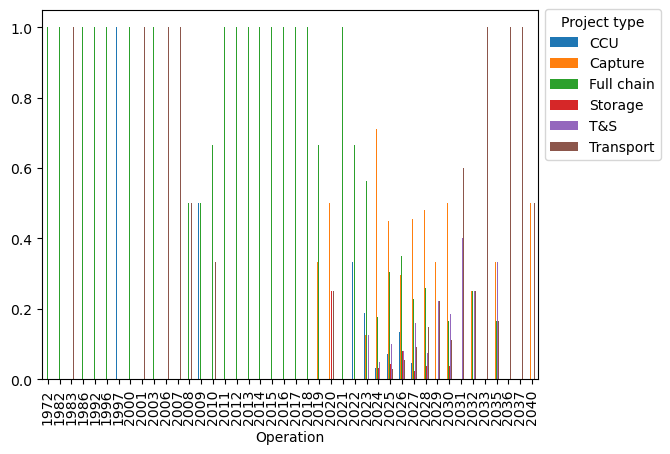

4: Test d'indépendance


Not enough values to run a test



____________ Test #  41   Operation  vs  Sector  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Operation  =  1972  et  Sector  =  Biofuels


Sector     Biofuels  CO2 T&S  CO2 storage  CO2 transport  Cement  \
Operation                                                          
1972              0        0            0              0       0   
1982              0        0            0              0       0   
1983              0        0            0              1       0   
1986              0        0            0              0       0   
1992              0        0            0              0       0   
1996              0        0            0              0       0   
1997              0        0            0              0       0   
2000              0        0            0              0       0   
2001              0        0            0              1       0   
2003              0        0            0              0       0   
2006              0        0            0              1       0   
2007              0        0            0              1       0   
2008              0        0            0              1       0   
2009              1        0            0              0       0   
2010              0        0            0              1       0   
2011              1        0            0              0       0   
2012              1        0            0              0       0   
2013              0        0            0              0       0   
2014              0        0            0              0       0   
2015              0        0            0              0       0   
2016              0        0            0              0       0   
2017              1        0            0              0       0   
2018              0        0            0              0       0   
2019              0        0            0              0       0   
2020              0        0            1              1       0   
2021              0        0            0              0       0   
2022              1        0            0              0       0   
2023              3        2            0              0       0   
2024             37        3            2              0       2   
2025              2        7            3              2       3   
2026              1        3            3              2       2   
2027              1        7            1              4       4   
2028              1        2            1              4       5   
2029              0        2            0              2       0   
2030              1       11            2              6       4   
2031              0        2            0              3       0   
2032              0        1            0              1       0   
2033              0        0            0              1       0   
2035              0        2            0              1       0   
2036              0        0            0              1       0   
2037              0        0            0              1       0   
2040              0        0            0              1       0   

Sector     Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Operation                                                         
1972                        0                 0               0   
1982                        0                 0               0   
1983                        0                 0               0   
1986                        0                 0               0   
1992                        0                 0               0   
1996                        0                 0               0   
1997                        0                 0               0   
2000                        0                 0               0   
2001                        0                 0               0   
2003                        0                 0               0   
2006                        0                 0               0   
2007                        0                 0               0   
2008                        0                 0               0   
20

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Operation  =  1972 ;  0.0 % sont des projets tels que  Sector  =  Biofuels 
 tandis que Parmi les projets tels que  Operation  =  1982 ;  0.0 % sont des projets tels que  Sector  =  Biofuels


Sector     Biofuels   CO2 T&S  CO2 storage  CO2 transport    Cement  \
Operation                                                             
1972       0.000000  0.000000     0.000000       0.000000  0.000000   
1982       0.000000  0.000000     0.000000       0.000000  0.000000   
1983       0.000000  0.000000     0.000000       1.000000  0.000000   
1986       0.000000  0.000000     0.000000       0.000000  0.000000   
1992       0.000000  0.000000     0.000000       0.000000  0.000000   
1996       0.000000  0.000000     0.000000       0.000000  0.000000   
1997       0.000000  0.000000     0.000000       0.000000  0.000000   
2000       0.000000  0.000000     0.000000       0.000000  0.000000   
2001       0.000000  0.000000     0.000000       1.000000  0.000000   
2003       0.000000  0.000000     0.000000       0.000000  0.000000   
2006       0.000000  0.000000     0.000000       1.000000  0.000000   
2007       0.000000  0.000000     0.000000       1.000000  0.000000   
2008       0.000000  0.000000     0.000000       0.500000  0.000000   
2009       0.500000  0.000000     0.000000       0.000000  0.000000   
2010       0.000000  0.000000     0.000000       0.333333  0.000000   
2011       1.000000  0.000000     0.000000       0.000000  0.000000   
2012       1.000000  0.000000     0.000000       0.000000  0.000000   
2013       0.000000  0.000000     0.000000       0.000000  0.000000   
2014       0.000000  0.000000     0.000000       0.000000  0.000000   
2015       0.000000  0.000000     0.000000       0.000000  0.000000   
2016       0.000000  0.000000     0.000000       0.000000  0.000000   
2017       0.500000  0.000000     0.000000       0.000000  0.000000   
2018       0.000000  0.000000     0.000000       0.000000  0.000000   
2019       0.000000  0.000000     0.000000       0.000000  0.000000   
2020       0.000000  0.000000     0.250000       0.250000  0.000000   
2021       0.000000  0.000000     0.000000       0.000000  0.000000   
2022       0.333333  0.000000     0.000000       0.000000  0.000000   
2023       0.187500  0.125000     0.000000       0.000000  0.000000   
2024       0.596774  0.048387     0.032258       0.000000  0.032258   
2025       0.028986  0.101449     0.043478       0.028986  0.043478   
2026       0.027027  0.081081     0.081081       0.054054  0.054054   
2027       0.022727  0.159091     0.022727       0.090909  0.090909   
2028       0.037037  0.074074     0.037037       0.148148  0.185185   
2029       0.000000  0.222222     0.000000       0.222222  0.000000   
2030       0.018519  0.203704     0.037037       0.111111  0.074074   
2031       0.000000  0.400000     0.000000       0.600000  0.000000   
2032       0.000000  0.250000     0.000000       0.250000  0.000000   
2033       0.000000  0.000000     0.000000       1.000000  0.000000   
2035       0.000000  0.333333     0.000000       0.166667  0.000000   
2036       0.000000  0.000000     0.000000       1.000000  0.000000   
2037       0.000000  0.000000     0.000000       1.000000  0.000000   
2040       0.000000  0.000000     0.000000       0.500000  0.000000   

Sector     Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Operation                                                         
1972                 0.000000          0.000000        0.000000   
1982                 0.000000          0.000000        0.000000   
1983                 0.000000          0.000000        0.000000   
1986                 0.000000          0.000000        0.000000   
1992                 0.000000          0.000000        0.000000   
1996                 0.000000          0.000000        0.000000   
1997                 0.000000          0.000000        0.000000   
2000                 0.000000          0.000000        0.000000   
2001                 0.000000          0.000000        0.000000   
2003                 0.000000          0.000000        0.000000   
2006                 0.000000          0.000000        0.000000   
2007

3: Histograms to compare distributions 




<Figure size 21000x6000 with 0 Axes>

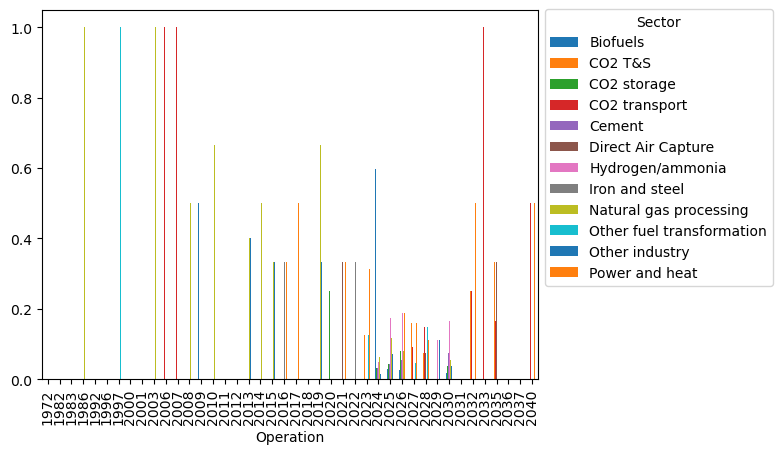

4: Test d'indépendance


Not enough values to run a test



____________ Test #  41   Operation  vs  Fate of carbon  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Operation  =  1972  et  Fate of carbon  =  Dedicated storage


Fate of carbon  Dedicated storage  EOR  EOR and use  Mixed  \
Operation                                                    
1972                            0    1            0      0   
1982                            0    1            0      0   
1986                            0    1            0      0   
1992                            0    1            0      0   
1996                            1    0            0      0   
1997                            0    0            0      0   
2000                            0    1            0      0   
2003                            0    1            0      0   
2008                            1    0            0      0   
2009                            0    1            0      0   
2010                            0    2            0      0   
2011                            1    0            0      0   
2012                            0    1            0      0   
2013                            0    5            0      0   
2014                            1    1            0      0   
2015                            1    1            0      0   
2016                            1    2            0      0   
2017                            1    1            0      0   
2018                            0    1            0      0   
2019                            2    1            0      0   
2020                            0    2            0      0   
2021                            1    2            0      0   
2022                            1    1            0      0   
2023                            3    7            0      1   
2024                           51    5            0      0   
2025                           41    6            1      0   
2026                           25    4            0      0   
2027                           34    2            0      0   
2028                           16    1            0      0   
2029                            4    1            0      0   
2030                           31    5            0      0   
2031                            2    0            0      0   
2032                            3    0            0      0   
2035                            5    0            0      0   
2040                            1    0            0      0   

Fate of carbon  Unknown/unspecified  Use  Use and EOR  Use and storage  
Operation                                                               
1972                              0    0            0                0  
1982                              0    0            0                0  
1986                              0    0            0                0  
1992                              0    0            0                0  
1996                              0    0            0                0  
1997                              0    1            0                0  
2000                              0    0            0                0  
2003                              0    0            0                0  
2008                              0    0            0                0  
2009                              0    1            0                0  
2010                              0    0            0                0  
2011                              0    0            0                0  
2012                              0    0            0                0  
2013                              0    0            0                0  
2014                              0    0            0                0  
2015                              0    0            1                0  
2016                              0    0            0                0  
2017                              0    0            0                0  
2018                              0    0            0                0  
2019                              0    0            0                0  
2020                              1    0            0                0  
2021                      

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Operation  =  1972 ;  0.0 % sont des projets tels que  Fate of carbon  =  Dedicated storage 
 tandis que Parmi les projets tels que  Operation  =  1982 ;  0.0 % sont des projets tels que  Fate of carbon  =  Dedicated storage


Fate of carbon  Dedicated storage       EOR  EOR and use   Mixed  \
Operation                                                          
1972                     0.000000  1.000000     0.000000  0.0000   
1982                     0.000000  1.000000     0.000000  0.0000   
1986                     0.000000  1.000000     0.000000  0.0000   
1992                     0.000000  1.000000     0.000000  0.0000   
1996                     1.000000  0.000000     0.000000  0.0000   
1997                     0.000000  0.000000     0.000000  0.0000   
2000                     0.000000  1.000000     0.000000  0.0000   
2003                     0.000000  1.000000     0.000000  0.0000   
2008                     1.000000  0.000000     0.000000  0.0000   
2009                     0.000000  0.500000     0.000000  0.0000   
2010                     0.000000  1.000000     0.000000  0.0000   
2011                     1.000000  0.000000     0.000000  0.0000   
2012                     0.000000  1.000000     0.000000  0.0000   
2013                     0.000000  1.000000     0.000000  0.0000   
2014                     0.500000  0.500000     0.000000  0.0000   
2015                     0.333333  0.333333     0.000000  0.0000   
2016                     0.333333  0.666667     0.000000  0.0000   
2017                     0.500000  0.500000     0.000000  0.0000   
2018                     0.000000  1.000000     0.000000  0.0000   
2019                     0.666667  0.333333     0.000000  0.0000   
2020                     0.000000  0.666667     0.000000  0.0000   
2021                     0.333333  0.666667     0.000000  0.0000   
2022                     0.333333  0.333333     0.000000  0.0000   
2023                     0.187500  0.437500     0.000000  0.0625   
2024                     0.822581  0.080645     0.000000  0.0000   
2025                     0.621212  0.090909     0.015152  0.0000   
2026                     0.714286  0.114286     0.000000  0.0000   
2027                     0.850000  0.050000     0.000000  0.0000   
2028                     0.695652  0.043478     0.000000  0.0000   
2029                     0.571429  0.142857     0.000000  0.0000   
2030                     0.645833  0.104167     0.000000  0.0000   
2031                     1.000000  0.000000     0.000000  0.0000   
2032                     1.000000  0.000000     0.000000  0.0000   
2035                     1.000000  0.000000     0.000000  0.0000   
2040                     1.000000  0.000000     0.000000  0.0000   

Fate of carbon  Unknown/unspecified       Use  Use and EOR  Use and storage  
Operation                                                                    
1972                       0.000000  0.000000     0.000000         0.000000  
1982                       0.000000  0.000000     0.000000         0.000000  
1986                       0.000000  0.000000     0.000000         0.000000  
1992                       0.000000  0.000000     0.000000         0.000000  
1996                       0.000000  0.000000     0.000000         0.000000  
1997                       0.000000  1.000000     0.000000         0.000000  
2000                       0.000000  0.000000     0.000000         0.000000  
2003                       0.000000  0.000000     0.000000         0.000000  
2008                       0.000000  0.000000     0.000000         0.000000  
2009                       0.000000  0.500000     0.000000         0.000000  
2010                       0.000000  0.000000     0.000000         0.000000  
2011                       0.000000  0.000000     0.000000         0.000000  
2012                       0.000000  0.000000     0.000000         0.000000  
2013                       0.000000  0.000000     0.000000         0.000000  
2014                       0.000000  0.000000     0.000000         0.000000  
2015                       0.000000  0.000000     0.333333         0.000000  
2016                       0.000000  0.000000     0.000000         0.000000  
2

3: Histograms to compare distributions 




<Figure size 17500x4000 with 0 Axes>

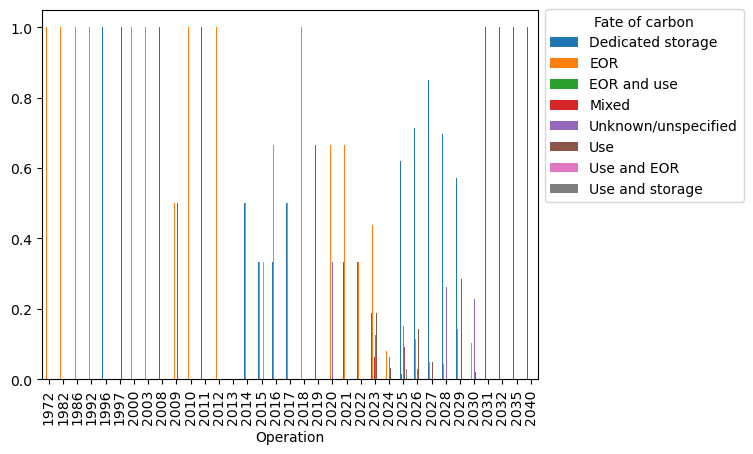

4: Test d'indépendance


Not enough values to run a test



____________ Test #  34   Operation  vs  Region  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Operation  =  1972  et  Region  =  Africa


Region     Africa  Asia  Asia Pacific  Europe  Europe + North America  \
Operation                                                               
1972            0     0             0       0                       0   
1982            0     0             0       0                       0   
1983            0     0             0       0                       0   
1986            0     0             0       0                       0   
1992            0     0             0       1                       0   
1996            0     0             0       1                       0   
1997            0     0             0       1                       0   
2000            0     0             0       0                       0   
2001            0     0             0       0                       0   
2003            0     0             0       0                       0   
2006            0     0             0       0                       0   
2007            0     0             0       0                       0   
2008            0     0             0       1                       0   
2009            0     0             0       0                       0   
2010            0     0             0       0                       0   
2011            0     0             0       0                       0   
2012            0     0             0       0                       0   
2013            0     0             0       0                       0   
2014            1     0             0       0                       0   
2015            0     1             0       0                       0   
2016            0     1             0       0                       0   
2017            0     0             0       0                       0   
2018            0     1             0       0                       0   
2019            0     0             1       0                       0   
2020            0     1             0       0                       0   
2021            0     2             0       1                       0   
2022            0     1             0       1                       0   
2023            0     5             3       2                       0   
2024            0     0             3      12                       0   
2025            0     5             5      25                       0   
2026            0     4             2      18                       0   
2027            1     2             3      27                       0   
2028            0     0             5      18                       0   
2029            0     0             0       7                       1   
2030            0     9             3      30                       0   
2031            0     0             0       5                       0   
2032            0     0             0       3                       0   
2033            0     0             0       1                       0   
2035            0     0             0       4                       0   
2036            0     0             0       1                       0   
2037            0     0             0       1                       0   
2040            0     0             0       2                       0   

Region     Middle East  North America  South America  
Operation                                             
1972                 0              1              0  
1982                 0              1              0  
1983                 0              1              0  
1986                 0              1              0  
1992                 0              0              0  
1996                 0              0              0  
1997                 0              0              0  
2000                 0              1              0  
2001                 0              1              0  
2003                 0              1              0  
2006                 0              1              0  
2007                 0              1              0  
2008             

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Operation  =  1972 ;  0.0 % sont des projets tels que  Region  =  Africa 
 tandis que Parmi les projets tels que  Operation  =  1982 ;  0.0 % sont des projets tels que  Region  =  Africa


Region       Africa      Asia  Asia Pacific    Europe  Europe + North America  \
Operation                                                                       
1972       0.000000  0.000000      0.000000  0.000000                0.000000   
1982       0.000000  0.000000      0.000000  0.000000                0.000000   
1983       0.000000  0.000000      0.000000  0.000000                0.000000   
1986       0.000000  0.000000      0.000000  0.000000                0.000000   
1992       0.000000  0.000000      0.000000  1.000000                0.000000   
1996       0.000000  0.000000      0.000000  1.000000                0.000000   
1997       0.000000  0.000000      0.000000  1.000000                0.000000   
2000       0.000000  0.000000      0.000000  0.000000                0.000000   
2001       0.000000  0.000000      0.000000  0.000000                0.000000   
2003       0.000000  0.000000      0.000000  0.000000                0.000000   
2006       0.000000  0.000000      0.000000  0.000000                0.000000   
2007       0.000000  0.000000      0.000000  0.000000                0.000000   
2008       0.000000  0.000000      0.000000  0.500000                0.000000   
2009       0.000000  0.000000      0.000000  0.000000                0.000000   
2010       0.000000  0.000000      0.000000  0.000000                0.000000   
2011       0.000000  0.000000      0.000000  0.000000                0.000000   
2012       0.000000  0.000000      0.000000  0.000000                0.000000   
2013       0.000000  0.000000      0.000000  0.000000                0.000000   
2014       0.500000  0.000000      0.000000  0.000000                0.000000   
2015       0.000000  0.333333      0.000000  0.000000                0.000000   
2016       0.000000  0.333333      0.000000  0.000000                0.000000   
2017       0.000000  0.000000      0.000000  0.000000                0.000000   
2018       0.000000  1.000000      0.000000  0.000000                0.000000   
2019       0.000000  0.000000      0.333333  0.000000                0.000000   
2020       0.000000  0.250000      0.000000  0.000000                0.000000   
2021       0.000000  0.666667      0.000000  0.333333                0.000000   
2022       0.000000  0.333333      0.000000  0.333333                0.000000   
2023       0.000000  0.312500      0.187500  0.125000                0.000000   
2024       0.000000  0.000000      0.048387  0.193548                0.000000   
2025       0.000000  0.072464      0.072464  0.362319                0.000000   
2026       0.000000  0.108108      0.054054  0.486486                0.000000   
2027       0.022727  0.045455      0.068182  0.613636                0.000000   
2028       0.000000  0.000000      0.185185  0.666667                0.000000   
2029       0.000000  0.000000      0.000000  0.777778                0.111111   
2030       0.000000  0.169811      0.056604  0.566038                0.000000   
2031       0.000000  0.000000      0.000000  1.000000                0.000000   
2032       0.000000  0.000000      0.000000  0.750000                0.000000   
2033       0.000000  0.000000      0.000000  1.000000                0.000000   
2035       0.000000  0.000000      0.000000  0.800000                0.000000   
2036       0.000000  0.000000      0.000000  1.000000                0.000000   
2037       0.000000  0.000000      0.000000  1.000000                0.000000   
2040       0.000000  0.000000      0.000000  1.000000                0.000000   

Region     Middle East  North America  South America  
Operation                                             
1972          0.000000       1.000000       0.000000  
1982          0.000000       1.000000       0.000000  
1983          0.000000       1.000000       0.000000  
1986          0.000000       1.000000       0.000000  
1992          0.000000       0.000000       0.000000  
1996          0.000000       0.000000       0.0000

3: Histograms to compare distributions 




<Figure size 21000x4000 with 0 Axes>

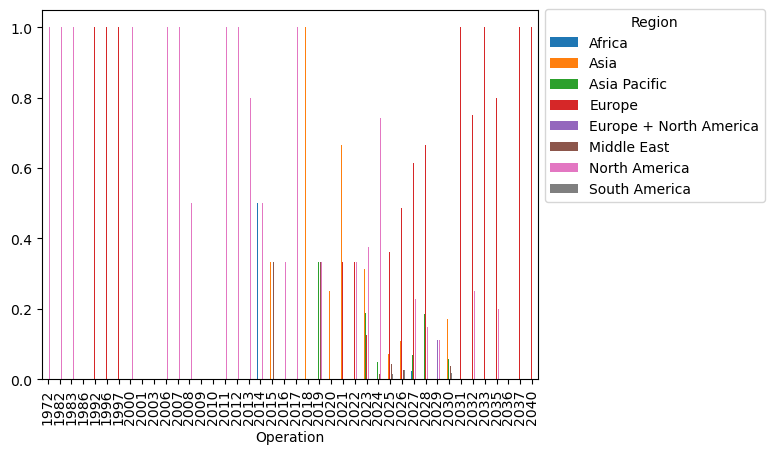

4: Test d'indépendance


Not enough values to run a test



____________ Test #  41   Operation  vs  Announcement  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Operation  =  1996  et  Announcement  =  1991


Announcement  1991  1997  2002  2006  2007  2008  2009  2010  2011  2012  ...  \
Operation                                                                 ...   
1996             1     0     0     0     0     0     0     0     0     0  ...   
2000             0     1     0     0     0     0     0     0     0     0  ...   
2008             0     0     1     0     0     0     0     0     0     0  ...   
2010             0     0     0     0     0     2     0     0     0     0  ...   
2011             0     0     0     0     0     0     1     0     0     0  ...   
2012             0     0     0     0     0     0     0     1     0     0  ...   
2013             0     0     0     0     0     0     1     1     3     0  ...   
2014             0     0     0     0     0     1     0     0     0     0  ...   
2015             0     0     0     0     0     0     1     0     0     0  ...   
2016             0     0     0     0     1     1     1     0     0     0  ...   
2017             0     0     0     0     0     0     1     0     0     0  ...   
2018             0     0     0     1     0     0     0     0     0     0  ...   
2019             0     0     0     0     0     0     1     0     1     0  ...   
2020             0     0     0     0     0     0     0     0     3     0  ...   
2021             0     0     0     0     0     0     0     0     0     0  ...   
2022             0     0     0     0     0     0     0     0     1     1  ...   
2023             0     0     0     0     0     0     0     1     0     0  ...   
2024             0     0     0     0     0     0     0     0     0     1  ...   
2025             0     0     0     0     0     0     1     0     0     1  ...   
2026             0     0     0     0     0     0     0     0     0     0  ...   
2027             0     0     0     0     0     0     0     0     0     0  ...   
2028             0     0     0     0     0     0     0     0     0     0  ...   
2029             0     0     0     0     0     0     0     0     0     0  ...   
2030             0     0     0     0     0     0     0     1     2     0  ...   
2031             0     0     0     0     0     0     0     0     0     0  ...   
2032             0     0     0     0     0     0     0     0     0     0  ...   
2033             0     0     0     0     0     0     0     0     0     0  ...   
2035             0     0     0     0     0     0     0     0     0     0  ...   
2036             0     0     0     0     0     0     0     0     0     0  ...   
2037             0     0     0     0     0     0     0     0     0     0  ...   
2040             0     0     0     0     0     0     0     0     0     0  ...   

Announcement  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
Operation                                                                 
1996             0     0     0     0     0     0     0     0     0     0  
2000             0     0     0     0     0     0     0     0     0     0  
2008             0     0     0     0     0     0     0     0     0     0  
2010             0     0     0     0     0     0     0     0     0     0  
2011             0     0     0     0     0     0     0     0     0     0  
2012             0     0     0     0     0     0     0     0     0     0  
2013             0     0     0     0     0     0     0     0     0     0  
2014             0     0     0     0     0     0     0     0     0     0  
2015             0     0     0     0     0     0     0     0     0     0  
2016             0     0     0     0     0     0     0     0     0     0  
2017             0     0     0     0     0     0     0     0     0     0  
2018             0     0     0     0     0     0     0     0     0     0  
2019             0     0     0     0     0     1     0     0     0     0  
2020             0     0     1     0     0     0     0     0     0     0  
2021             0     1     0     0     1     0     0     0     0     0  
2022             0     0     1     0     0     0   

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Operation  =  1996 ;  100.0 % sont des projets tels que  Announcement  =  1991 
 tandis que Parmi les projets tels que  Operation  =  2000 ;  0.0 % sont des projets tels que  Announcement  =  1991


Announcement  1991  1997  2002  2006      2007      2008      2009      2010  \
Operation                                                                      
1996           1.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2000           0.0   1.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2008           0.0   0.0   1.0   0.0  0.000000  0.000000  0.000000  0.000000   
2010           0.0   0.0   0.0   0.0  0.000000  1.000000  0.000000  0.000000   
2011           0.0   0.0   0.0   0.0  0.000000  0.000000  1.000000  0.000000   
2012           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  1.000000   
2013           0.0   0.0   0.0   0.0  0.000000  0.000000  0.200000  0.200000   
2014           0.0   0.0   0.0   0.0  0.000000  1.000000  0.000000  0.000000   
2015           0.0   0.0   0.0   0.0  0.000000  0.000000  0.500000  0.000000   
2016           0.0   0.0   0.0   0.0  0.333333  0.333333  0.333333  0.000000   
2017           0.0   0.0   0.0   0.0  0.000000  0.000000  1.000000  0.000000   
2018           0.0   0.0   0.0   1.0  0.000000  0.000000  0.000000  0.000000   
2019           0.0   0.0   0.0   0.0  0.000000  0.000000  0.333333  0.000000   
2020           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2021           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2022           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2023           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.062500   
2024           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2025           0.0   0.0   0.0   0.0  0.000000  0.000000  0.014493  0.000000   
2026           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2027           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2028           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2029           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2030           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.018519   
2031           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2032           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2033           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2035           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2036           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2037           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2040           0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   

Announcement      2011      2012  ...      2014    2015      2016      2017  \
Operation                         ...                                         
1996          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2000          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2008          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2010          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2011          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2012          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2013          0.600000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2014          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2015          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2016          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2017          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2018          0.000000  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2019          0.333333  0.000000  ...  0.000000  0.0000  0.000000  0.000000   
2020          0.750000  0.000000  ...  0.000000  0.0000  0.250000  0.000000   
2021          0.000000  0.000000  ...  0.000000  0.5000  0.000000  0.000000   
2022          0.

3: Histograms to compare distributions 




<Figure size 15500x10500 with 0 Axes>

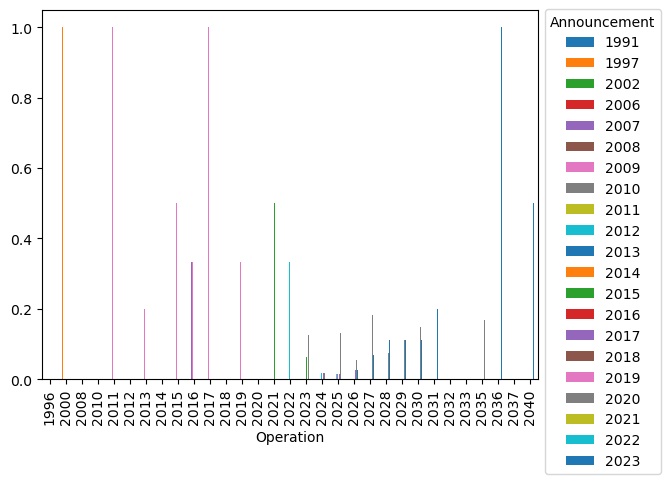

4: Test d'indépendance


Not enough values to run a test



____________ Test #  30   Operation  vs  Project Status  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Operation  =  1972  et  Project Status  =  Decommissioned


Project Status  Decommissioned  Operational  Planned  Suspended  \
Operation                                                         
1972                         0            1        0          0   
1982                         0            1        0          0   
1983                         0            1        0          0   
1986                         0            1        0          0   
1992                         0            1        0          0   
1996                         0            1        0          0   
1997                         0            1        0          0   
2000                         0            1        0          0   
2001                         0            1        0          0   
2003                         0            1        0          0   
2006                         0            1        0          0   
2007                         0            1        0          0   
2008                         0            2        0          0   
2009                         0            2        0          0   
2010                         0            3        0          0   
2011                         1            0        0          0   
2012                         0            1        0          0   
2013                         0            5        0          0   
2014                         1            1        0          0   
2015                         0            3        0          0   
2016                         0            2        0          1   
2017                         1            1        0          0   
2018                         0            1        0          0   
2019                         0            3        0          0   
2020                         0            4        0          0   
2021                         0            3        0          0   
2022                         0            3        0          0   
2023                         0            1        8          0   
2024                         0            0       56          0   
2025                         0            0       61          0   
2026                         0            0       37          0   
2027                         0            0       43          0   
2028                         0            0       27          0   
2029                         0            0        9          0   
2030                         0            0       54          0   
2031                         0            0        5          0   
2032                         0            0        4          0   
2033                         0            0        1          0   
2035                         0            0        6          0   
2036                         0            0        1          0   
2037                         0            0        1          0   
2040                         0            0        2          0   

Project Status  Under construction  
Operation                           
1972                             0  
1982                             0  
1983                             0  
1986                             0  
1992                             0  
1996                             0  
1997                             0  
2000                             0  
2001                             0  
2003                             0  
2006                             0  
2007                             0  
2008                             0  
2009                             0  
2010                             0  
2011                             0  
2012                             0  
2013                             0  
2014                             0  
2015                             0  
2016                             0  
2017                             0  
2018                             0  
2019                             0  
2020                             0  
2021                             0  
2022           

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Operation  =  1972 ;  0.0 % sont des projets tels que  Project Status  =  Decommissioned 
 tandis que Parmi les projets tels que  Operation  =  1982 ;  0.0 % sont des projets tels que  Project Status  =  Decommissioned


Project Status  Decommissioned  Operational   Planned  Suspended  \
Operation                                                          
1972                       0.0     1.000000  0.000000   0.000000   
1982                       0.0     1.000000  0.000000   0.000000   
1983                       0.0     1.000000  0.000000   0.000000   
1986                       0.0     1.000000  0.000000   0.000000   
1992                       0.0     1.000000  0.000000   0.000000   
1996                       0.0     1.000000  0.000000   0.000000   
1997                       0.0     1.000000  0.000000   0.000000   
2000                       0.0     1.000000  0.000000   0.000000   
2001                       0.0     1.000000  0.000000   0.000000   
2003                       0.0     1.000000  0.000000   0.000000   
2006                       0.0     1.000000  0.000000   0.000000   
2007                       0.0     1.000000  0.000000   0.000000   
2008                       0.0     1.000000  0.000000   0.000000   
2009                       0.0     1.000000  0.000000   0.000000   
2010                       0.0     1.000000  0.000000   0.000000   
2011                       1.0     0.000000  0.000000   0.000000   
2012                       0.0     1.000000  0.000000   0.000000   
2013                       0.0     1.000000  0.000000   0.000000   
2014                       0.5     0.500000  0.000000   0.000000   
2015                       0.0     1.000000  0.000000   0.000000   
2016                       0.0     0.666667  0.000000   0.333333   
2017                       0.5     0.500000  0.000000   0.000000   
2018                       0.0     1.000000  0.000000   0.000000   
2019                       0.0     1.000000  0.000000   0.000000   
2020                       0.0     1.000000  0.000000   0.000000   
2021                       0.0     1.000000  0.000000   0.000000   
2022                       0.0     1.000000  0.000000   0.000000   
2023                       0.0     0.062500  0.500000   0.000000   
2024                       0.0     0.000000  0.903226   0.000000   
2025                       0.0     0.000000  0.884058   0.000000   
2026                       0.0     0.000000  1.000000   0.000000   
2027                       0.0     0.000000  0.977273   0.000000   
2028                       0.0     0.000000  1.000000   0.000000   
2029                       0.0     0.000000  1.000000   0.000000   
2030                       0.0     0.000000  1.000000   0.000000   
2031                       0.0     0.000000  1.000000   0.000000   
2032                       0.0     0.000000  1.000000   0.000000   
2033                       0.0     0.000000  1.000000   0.000000   
2035                       0.0     0.000000  1.000000   0.000000   
2036                       0.0     0.000000  1.000000   0.000000   
2037                       0.0     0.000000  1.000000   0.000000   
2040                       0.0     0.000000  1.000000   0.000000   

Project Status  Under construction  
Operation                           
1972                      0.000000  
1982                      0.000000  
1983                      0.000000  
1986                      0.000000  
1992                      0.000000  
1996                      0.000000  
1997                      0.000000  
2000                      0.000000  
2001                      0.000000  
2003                      0.000000  
2006                      0.000000  
2007                      0.000000  
2008                      0.000000  
2009                      0.000000  
2010                      0.000000  
2011                      0.000000  
2012                      0.000000  
2013                      0.000000  
2014                      0.000000  
2015                      0.000000  
2016                      0.000000  
2017                      0.000000  
2018                      0.000000  
2019                      0.000000  
2020                      0.000000  
2021    

3: Histograms to compare distributions 




<Figure size 21000x2500 with 0 Axes>

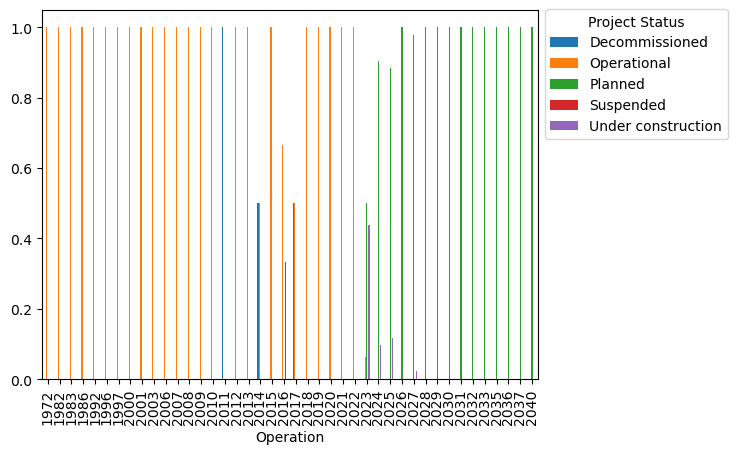

4: Test d'indépendance


Not enough values to run a test



____________ Test #  41   Announcement  vs  Project type  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Announcement  =  1991  et  Project type  =  CCU


Project type  CCU  Capture  Full chain  Storage  T&S  Transport
Announcement                                                   
1991            0        0           1        0    0          0
1997            0        0           1        0    0          0
2002            0        0           1        0    0          0
2006            0        0           1        0    0          0
2007            0        0           1        0    0          0
2008            0        0           4        0    0          0
2009            0        1           6        0    0          0
2010            0        0           3        1    1          0
2011            1        2           5        1    0          1
2012            0        1           2        0    0          0
2013            0        4           1        0    0          0
2014            0        1           0        0    0          0
2015            0        0           2        0    0          0
2016            0        4           3        0    1          0
2017            1        1           0        0    5          0
2018            0       12           7        0    3          0
2019            2       19           7        1    4          2
2020            5       17          10        1   13          1
2021           14      107          38        4   19          8
2022            6       56          36       34   14         19
2023            1        8           5       10    4          9

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Announcement  =  1991 ;  0.0 % sont des projets tels que  Project type  =  CCU 
 tandis que Parmi les projets tels que  Announcement  =  1997 ;  0.0 % sont des projets tels que  Project type  =  CCU


Project type       CCU   Capture  Full chain   Storage       T&S  Transport
Announcement                                                               
1991          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
1997          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2002          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2006          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2007          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2008          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2009          0.000000  0.142857    0.857143  0.000000  0.000000   0.000000
2010          0.000000  0.000000    0.600000  0.200000  0.200000   0.000000
2011          0.100000  0.200000    0.500000  0.100000  0.000000   0.100000
2012          0.000000  0.333333    0.666667  0.000000  0.000000   0.000000
2013          0.000000  0.800000    0.200000  0.000000  0.000000   0.000000
2014          0.000000  1.000000    0.000000  0.000000  0.000000   0.000000
2015          0.000000  0.000000    1.000000  0.000000  0.000000   0.000000
2016          0.000000  0.500000    0.375000  0.000000  0.125000   0.000000
2017          0.142857  0.142857    0.000000  0.000000  0.714286   0.000000
2018          0.000000  0.545455    0.318182  0.000000  0.136364   0.000000
2019          0.057143  0.542857    0.200000  0.028571  0.114286   0.057143
2020          0.106383  0.361702    0.212766  0.021277  0.276596   0.021277
2021          0.073684  0.563158    0.200000  0.021053  0.100000   0.042105
2022          0.036364  0.339394    0.218182  0.206061  0.084848   0.115152
2023          0.027027  0.216216    0.135135  0.270270  0.108108   0.243243

3: Histograms to compare distributions 




<Figure size 10500x3000 with 0 Axes>

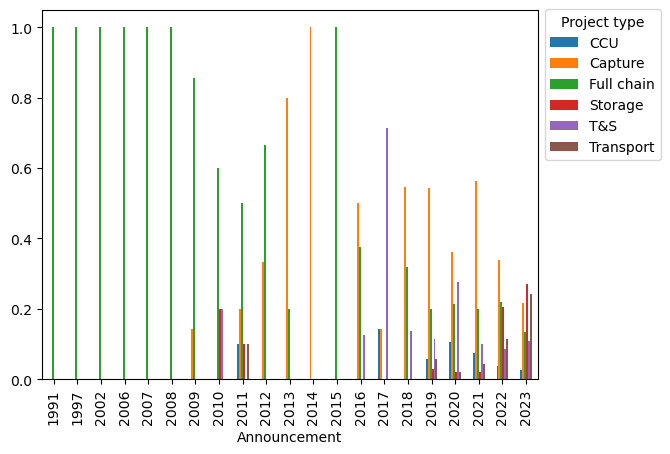

4: Test d'indépendance


Not enough values to run a test



____________ Test #  20   Announcement  vs  Sector  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Announcement  =  1991  et  Sector  =  Biofuels


Sector        Biofuels  CO2 T&S  CO2 storage  CO2 transport  Cement  \
Announcement                                                          
1991                 0        0            0              0       0   
1997                 0        0            0              0       0   
2002                 0        0            0              0       0   
2006                 0        0            0              0       0   
2007                 0        0            0              0       0   
2008                 0        0            0              0       0   
2009                 2        0            0              0       0   
2010                 1        2            0              0       0   
2011                 0        0            1              1       0   
2012                 0        0            0              0       0   
2013                 1        0            0              0       0   
2014                 0        0            0              0       0   
2015                 0        0            0              0       0   
2016                 1        1            0              0       1   
2017                 0        4            1              0       0   
2018                 2        3            0              0       0   
2019                 1        5            0              2       2   
2020                 3       13            1              1       4   
2021                39       18            5              8      10   
2022                 8       15           33             19       6   
2023                 1        5           10              9       4   

Sector        Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Announcement                                                         
1991                           0                 0               0   
1997                           0                 0               0   
2002                           0                 0               0   
2006                           0                 0               0   
2007                           0                 0               1   
2008                           0                 1               0   
2009                           0                 0               0   
2010                           0                 0               0   
2011                           0                 0               1   
2012                           0                 0               0   
2013                           0                 0               0   
2014                           0                 1               0   
2015                           0                 0               0   
2016                           0                 1               0   
2017                           0                 1               1   
2018                           0                 5               0   
2019                           2                 3               1   
2020                           3                 6               2   
2021                           7                35               0   
2022                          19                16               1   
2023                           0                 4               0   

Sector        Natural gas processing  Other fuel transformation  \
Announcement                                                      
1991                               1                          0   
1997                               0                          1   
2002                               1                          0   
2006                               1                          0   
2007                               0                          0   
2008                               2                          0   
2009                               1                          2   
2010                               1                          0   
2011                               1                          1   
2012              

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Announcement  =  1991 ;  0.0 % sont des projets tels que  Sector  =  Biofuels 
 tandis que Parmi les projets tels que  Announcement  =  1997 ;  0.0 % sont des projets tels que  Sector  =  Biofuels


Sector        Biofuels   CO2 T&S  CO2 storage  CO2 transport    Cement  \
Announcement                                                             
1991          0.000000  0.000000     0.000000       0.000000  0.000000   
1997          0.000000  0.000000     0.000000       0.000000  0.000000   
2002          0.000000  0.000000     0.000000       0.000000  0.000000   
2006          0.000000  0.000000     0.000000       0.000000  0.000000   
2007          0.000000  0.000000     0.000000       0.000000  0.000000   
2008          0.000000  0.000000     0.000000       0.000000  0.000000   
2009          0.285714  0.000000     0.000000       0.000000  0.000000   
2010          0.200000  0.400000     0.000000       0.000000  0.000000   
2011          0.000000  0.000000     0.100000       0.100000  0.000000   
2012          0.000000  0.000000     0.000000       0.000000  0.000000   
2013          0.200000  0.000000     0.000000       0.000000  0.000000   
2014          0.000000  0.000000     0.000000       0.000000  0.000000   
2015          0.000000  0.000000     0.000000       0.000000  0.000000   
2016          0.125000  0.125000     0.000000       0.000000  0.125000   
2017          0.000000  0.571429     0.142857       0.000000  0.000000   
2018          0.090909  0.136364     0.000000       0.000000  0.000000   
2019          0.028571  0.142857     0.000000       0.057143  0.057143   
2020          0.063830  0.276596     0.021277       0.021277  0.085106   
2021          0.205263  0.094737     0.026316       0.042105  0.052632   
2022          0.048485  0.090909     0.200000       0.115152  0.036364   
2023          0.027027  0.135135     0.270270       0.243243  0.108108   

Sector        Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Announcement                                                         
1991                    0.000000          0.000000        0.000000   
1997                    0.000000          0.000000        0.000000   
2002                    0.000000          0.000000        0.000000   
2006                    0.000000          0.000000        0.000000   
2007                    0.000000          0.000000        1.000000   
2008                    0.000000          0.250000        0.000000   
2009                    0.000000          0.000000        0.000000   
2010                    0.000000          0.000000        0.000000   
2011                    0.000000          0.000000        0.100000   
2012                    0.000000          0.000000        0.000000   
2013                    0.000000          0.000000        0.000000   
2014                    0.000000          1.000000        0.000000   
2015                    0.000000          0.000000        0.000000   
2016                    0.000000          0.125000        0.000000   
2017                    0.000000          0.142857        0.142857   
2018                    0.000000          0.227273        0.000000   
2019                    0.057143          0.085714        0.028571   
2020                    0.063830          0.127660        0.042553   
2021                    0.036842          0.184211        0.000000   
2022                    0.115152          0.096970        0.006061   
2023                    0.000000          0.108108        0.000000   

Sector        Natural gas processing  Other fuel transformation  \
Announcement                                                      
1991                        1.000000                   0.000000   
1997                        0.000000                   1.000000   
2002                        1.000000                   0.000000   
2006                        1.000000                   0.000000   
2007                        0.000000                   0.000000   
2008                        0.500000                   0.000000   
2009                        0.142857                   0.285714   
2010                        0.200000                   0.000000   
2011            

3: Histograms to compare distributions 




<Figure size 10500x6000 with 0 Axes>

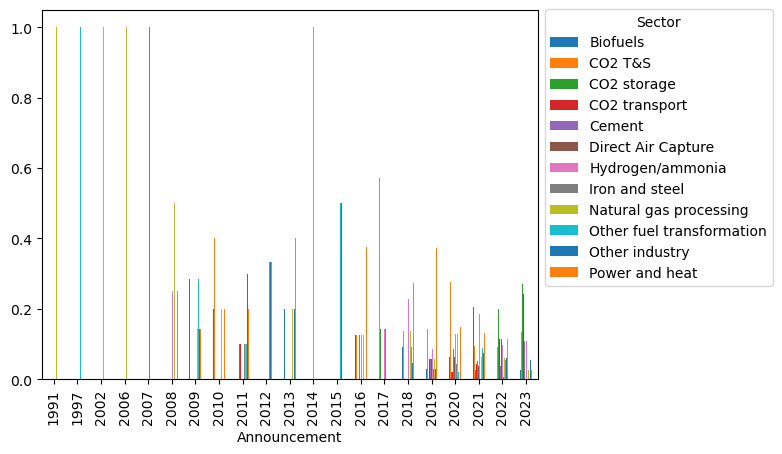

4: Test d'indépendance


Not enough values to run a test



____________ Test #  20   Announcement  vs  Fate of carbon  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Announcement  =  1991  et  Fate of carbon  =  Dedicated storage


Fate of carbon  Dedicated storage  EOR  EOR and use  Mixed  Storage  \
Announcement                                                          
1991                            1    0            0      0        0   
1997                            0    1            0      0        0   
2002                            1    0            0      0        0   
2006                            0    1            0      0        0   
2007                            0    1            0      0        0   
2008                            1    3            0      0        0   
2009                            4    2            0      0        0   
2010                            3    2            0      0        0   
2011                            0    7            0      0        0   
2012                            2    1            0      0        0   
2013                            2    1            0      0        0   
2014                            1    0            0      0        0   
2015                            0    2            0      0        0   
2016                            6    0            0      0        0   
2017                            6    0            0      0        0   
2018                           12    5            0      0        0   
2019                           19    9            0      0        0   
2020                           31    4            0      0        0   
2021                          123   11            1      1        0   
2022                          116    3            0      0        0   
2023                           22    0            0      0        1   

Fate of carbon  Unknown/unspecified  Use  Use and EOR  Use and storage  
Announcement                                                            
1991                              0    0            0                0  
1997                              0    0            0                0  
2002                              0    0            0                0  
2006                              0    0            0                0  
2007                              0    0            0                0  
2008                              0    0            0                0  
2009                              0    0            0                1  
2010                              0    0            0                0  
2011                              1    1            0                0  
2012                              0    0            0                0  
2013                              1    0            1                0  
2014                              0    0            0                0  
2015                              0    0            0                0  
2016                              2    0            0                0  
2017                              0    1            0                0  
2018                              5    0            0                0  
2019                              2    3            0                0  
2020                              6    5            0                0  
2021                             30   15            0                1  
2022                             20    6            0                0  
2023                              4    1            0                0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Announcement  =  1991 ;  100.0 % sont des projets tels que  Fate of carbon  =  Dedicated storage 
 tandis que Parmi les projets tels que  Announcement  =  1997 ;  0.0 % sont des projets tels que  Fate of carbon  =  Dedicated storage


Fate of carbon  Dedicated storage       EOR  EOR and use     Mixed   Storage  \
Announcement                                                                   
1991                     1.000000  0.000000     0.000000  0.000000  0.000000   
1997                     0.000000  1.000000     0.000000  0.000000  0.000000   
2002                     1.000000  0.000000     0.000000  0.000000  0.000000   
2006                     0.000000  1.000000     0.000000  0.000000  0.000000   
2007                     0.000000  1.000000     0.000000  0.000000  0.000000   
2008                     0.250000  0.750000     0.000000  0.000000  0.000000   
2009                     0.571429  0.285714     0.000000  0.000000  0.000000   
2010                     0.600000  0.400000     0.000000  0.000000  0.000000   
2011                     0.000000  0.777778     0.000000  0.000000  0.000000   
2012                     0.666667  0.333333     0.000000  0.000000  0.000000   
2013                     0.400000  0.200000     0.000000  0.000000  0.000000   
2014                     1.000000  0.000000     0.000000  0.000000  0.000000   
2015                     0.000000  1.000000     0.000000  0.000000  0.000000   
2016                     0.750000  0.000000     0.000000  0.000000  0.000000   
2017                     0.857143  0.000000     0.000000  0.000000  0.000000   
2018                     0.545455  0.227273     0.000000  0.000000  0.000000   
2019                     0.575758  0.272727     0.000000  0.000000  0.000000   
2020                     0.673913  0.086957     0.000000  0.000000  0.000000   
2021                     0.675824  0.060440     0.005495  0.005495  0.000000   
2022                     0.800000  0.020690     0.000000  0.000000  0.000000   
2023                     0.785714  0.000000     0.000000  0.000000  0.035714   

Fate of carbon  Unknown/unspecified       Use  Use and EOR  Use and storage  
Announcement                                                                 
1991                       0.000000  0.000000          0.0         0.000000  
1997                       0.000000  0.000000          0.0         0.000000  
2002                       0.000000  0.000000          0.0         0.000000  
2006                       0.000000  0.000000          0.0         0.000000  
2007                       0.000000  0.000000          0.0         0.000000  
2008                       0.000000  0.000000          0.0         0.000000  
2009                       0.000000  0.000000          0.0         0.142857  
2010                       0.000000  0.000000          0.0         0.000000  
2011                       0.111111  0.111111          0.0         0.000000  
2012                       0.000000  0.000000          0.0         0.000000  
2013                       0.200000  0.000000          0.2         0.000000  
2014                       0.000000  0.000000          0.0         0.000000  
2015                       0.000000  0.000000          0.0         0.000000  
2016                       0.250000  0.000000          0.0         0.000000  
2017                       0.000000  0.142857          0.0         0.000000  
2018                       0.227273  0.000000          0.0         0.000000  
2019                       0.060606  0.090909          0.0         0.000000  
2020                       0.130435  0.108696          0.0         0.000000  
2021                       0.164835  0.082418          0.0         0.005495  
2022                       0.137931  0.041379          0.0         0.000000  
2023                       0.142857  0.035714          0.0         0.000000

3: Histograms to compare distributions 




<Figure size 10500x4500 with 0 Axes>

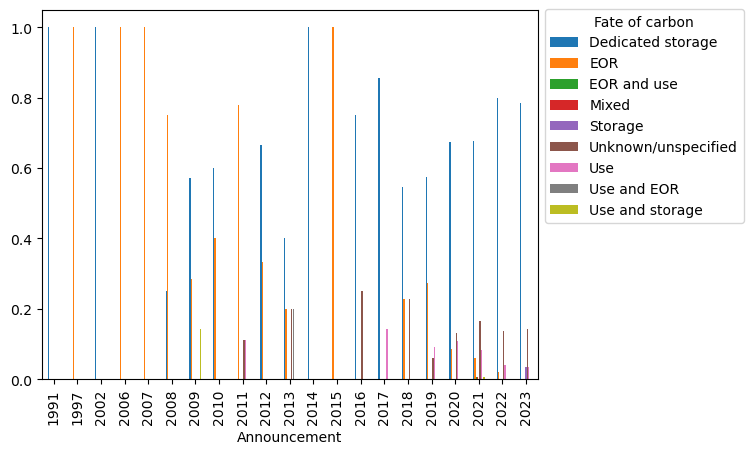

4: Test d'indépendance


Not enough values to run a test



____________ Test #  20   Announcement  vs  Region  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Announcement  =  1991  et  Region  =  Africa


Region        Africa  Asia  Asia Pacific  Europe  Europe + North America  \
Announcement                                                               
1991               0     0             0       1                       0   
1997               0     0             0       0                       0   
2002               0     0             0       1                       0   
2006               0     1             0       0                       0   
2007               0     0             0       0                       0   
2008               0     1             0       0                       0   
2009               0     0             1       0                       0   
2010               0     0             3       0                       0   
2011               0     2             0       1                       0   
2012               0     1             0       2                       0   
2013               0     1             0       0                       0   
2014               0     0             0       1                       0   
2015               0     2             0       0                       0   
2016               0     1             0       4                       0   
2017               0     0             0       5                       0   
2018               1     1             4      11                       0   
2019               0     4             2      18                       0   
2020               0     0             3      31                       0   
2021               0    12            15      73                       0   
2022               0     9            15      49                       1   
2023               0     2             1      16                       0   

Region        Middle East  North America  South America  
Announcement                                             
1991                    0              0              0  
1997                    0              1              0  
2002                    0              0              0  
2006                    0              0              0  
2007                    1              0              0  
2008                    0              3              0  
2009                    0              6              0  
2010                    0              2              0  
2011                    0              6              1  
2012                    0              0              0  
2013                    1              3              0  
2014                    0              0              0  
2015                    0              0              0  
2016                    0              3              0  
2017                    0              2              0  
2018                    1              4              0  
2019                    1             10              0  
2020                    3             10              0  
2021                    1             86              3  
2022                    4             85              0  
2023                    2             16              0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Announcement  =  1991 ;  0.0 % sont des projets tels que  Region  =  Africa 
 tandis que Parmi les projets tels que  Announcement  =  1997 ;  0.0 % sont des projets tels que  Region  =  Africa


Region          Africa      Asia  Asia Pacific    Europe  \
Announcement                                               
1991          0.000000  0.000000      0.000000  1.000000   
1997          0.000000  0.000000      0.000000  0.000000   
2002          0.000000  0.000000      0.000000  1.000000   
2006          0.000000  1.000000      0.000000  0.000000   
2007          0.000000  0.000000      0.000000  0.000000   
2008          0.000000  0.250000      0.000000  0.000000   
2009          0.000000  0.000000      0.142857  0.000000   
2010          0.000000  0.000000      0.600000  0.000000   
2011          0.000000  0.200000      0.000000  0.100000   
2012          0.000000  0.333333      0.000000  0.666667   
2013          0.000000  0.200000      0.000000  0.000000   
2014          0.000000  0.000000      0.000000  1.000000   
2015          0.000000  1.000000      0.000000  0.000000   
2016          0.000000  0.125000      0.000000  0.500000   
2017          0.000000  0.000000      0.000000  0.714286   
2018          0.045455  0.045455      0.181818  0.500000   
2019          0.000000  0.114286      0.057143  0.514286   
2020          0.000000  0.000000      0.063830  0.659574   
2021          0.000000  0.063158      0.078947  0.384211   
2022          0.000000  0.055215      0.092025  0.300613   
2023          0.000000  0.054054      0.027027  0.432432   

Region        Europe + North America  Middle East  North America  \
Announcement                                                       
1991                        0.000000     0.000000       0.000000   
1997                        0.000000     0.000000       1.000000   
2002                        0.000000     0.000000       0.000000   
2006                        0.000000     0.000000       0.000000   
2007                        0.000000     1.000000       0.000000   
2008                        0.000000     0.000000       0.750000   
2009                        0.000000     0.000000       0.857143   
2010                        0.000000     0.000000       0.400000   
2011                        0.000000     0.000000       0.600000   
2012                        0.000000     0.000000       0.000000   
2013                        0.000000     0.200000       0.600000   
2014                        0.000000     0.000000       0.000000   
2015                        0.000000     0.000000       0.000000   
2016                        0.000000     0.000000       0.375000   
2017                        0.000000     0.000000       0.285714   
2018                        0.000000     0.045455       0.181818   
2019                        0.000000     0.028571       0.285714   
2020                        0.000000     0.063830       0.212766   
2021                        0.000000     0.005263       0.452632   
2022                        0.006135     0.024540       0.521472   
2023                        0.000000     0.054054       0.432432   

Region        South America  
Announcement                 
1991               0.000000  
1997               0.000000  
2002               0.000000  
2006               0.000000  
2007               0.000000  
2008               0.000000  
2009               0.000000  
2010               0.000000  
2011               0.100000  
2012               0.000000  
2013               0.000000  
2014               0.000000  
2015               0.000000  
2016               0.000000  
2017               0.000000  
2018               0.000000  
2019               0.000000  
2020               0.000000  
2021               0.015789  
2022               0.000000  
2023               0.000000

3: Histograms to compare distributions 




<Figure size 10500x4000 with 0 Axes>

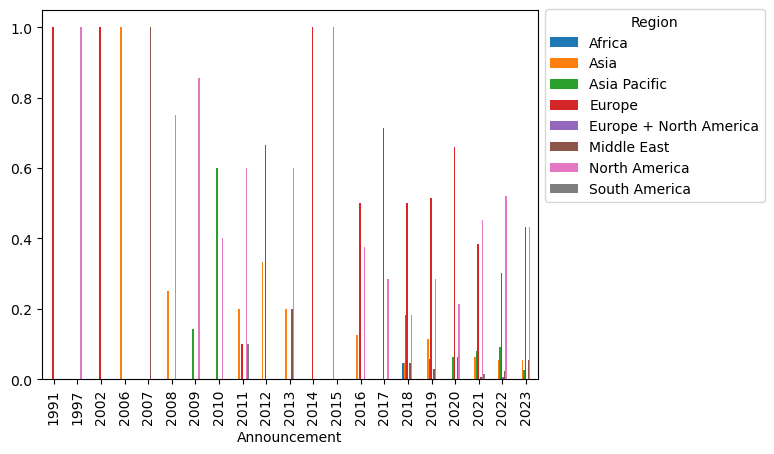

4: Test d'indépendance


Not enough values to run a test



____________ Test #  20   Announcement  vs  Operation  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Announcement  =  1991  et  Operation  =  1996


Operation     1996  2000  2008  2010  2011  2012  2013  2014  2015  2016  ...  \
Announcement                                                              ...   
1991             1     0     0     0     0     0     0     0     0     0  ...   
1997             0     1     0     0     0     0     0     0     0     0  ...   
2002             0     0     1     0     0     0     0     0     0     0  ...   
2006             0     0     0     0     0     0     0     0     0     0  ...   
2007             0     0     0     0     0     0     0     0     0     1  ...   
2008             0     0     0     2     0     0     0     1     0     1  ...   
2009             0     0     0     0     1     0     1     0     1     1  ...   
2010             0     0     0     0     0     1     1     0     0     0  ...   
2011             0     0     0     0     0     0     3     0     0     0  ...   
2012             0     0     0     0     0     0     0     0     0     0  ...   
2013             0     0     0     0     0     0     0     0     1     0  ...   
2014             0     0     0     0     0     0     0     0     0     0  ...   
2015             0     0     0     0     0     0     0     0     0     0  ...   
2016             0     0     0     0     0     0     0     0     0     0  ...   
2017             0     0     0     0     0     0     0     0     0     0  ...   
2018             0     0     0     0     0     0     0     0     0     0  ...   
2019             0     0     0     0     0     0     0     0     0     0  ...   
2020             0     0     0     0     0     0     0     0     0     0  ...   
2021             0     0     0     0     0     0     0     0     0     0  ...   
2022             0     0     0     0     0     0     0     0     0     0  ...   
2023             0     0     0     0     0     0     0     0     0     0  ...   

Operation     2028  2029  2030  2031  2032  2033  2035  2036  2037  2040  
Announcement                                                              
1991             0     0     0     0     0     0     0     0     0     0  
1997             0     0     0     0     0     0     0     0     0     0  
2002             0     0     0     0     0     0     0     0     0     0  
2006             0     0     0     0     0     0     0     0     0     0  
2007             0     0     0     0     0     0     0     0     0     0  
2008             0     0     0     0     0     0     0     0     0     0  
2009             0     0     0     0     0     0     0     0     0     0  
2010             0     0     1     0     0     0     0     0     0     0  
2011             0     0     2     0     0     0     0     0     0     0  
2012             0     0     0     0     0     0     0     0     0     0  
2013             0     0     1     0     0     0     0     0     0     0  
2014             0     0     0     0     0     0     1     0     0     0  
2015             0     0     0     0     0     0     0     0     0     0  
2016             0     0     0     0     0     0     0     0     0     0  
2017             0     0     0     0     0     0     0     0     0     0  
2018             3     0     3     0     0     0     0     0     0     0  
2019             0     0     5     0     0     0     0     0     0     0  
2020             2     1     8     0     0     0     1     0     0     0  
2021            10     4    15     3     1     1     2     0     0     0  
2022             9     3    13     1     3     0     2     0     1     1  
2023             3     1     6     1     0     0     0     1     0     1  

[21 rows x 31 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Announcement  =  1991 ;  100.0 % sont des projets tels que  Operation  =  1996 
 tandis que Parmi les projets tels que  Announcement  =  1997 ;  0.0 % sont des projets tels que  Operation  =  1996


Operation     1996  2000  2008  2010      2011  2012      2013  2014  \
Announcement                                                           
1991           1.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
1997           0.0   1.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2002           0.0   0.0   1.0   0.0  0.000000  0.00  0.000000  0.00   
2006           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2007           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2008           0.0   0.0   0.0   0.5  0.000000  0.00  0.000000  0.25   
2009           0.0   0.0   0.0   0.0  0.142857  0.00  0.142857  0.00   
2010           0.0   0.0   0.0   0.0  0.000000  0.25  0.250000  0.00   
2011           0.0   0.0   0.0   0.0  0.000000  0.00  0.300000  0.00   
2012           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2013           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2014           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2015           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2016           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2017           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2018           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2019           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2020           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2021           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2022           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   
2023           0.0   0.0   0.0   0.0  0.000000  0.00  0.000000  0.00   

Operation         2015      2016  ...      2028      2029      2030      2031  \
Announcement                      ...                                           
1991          0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1997          0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2002          0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2006          0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2007          0.000000  1.000000  ...  0.000000  0.000000  0.000000  0.000000   
2008          0.000000  0.250000  ...  0.000000  0.000000  0.000000  0.000000   
2009          0.142857  0.142857  ...  0.000000  0.000000  0.000000  0.000000   
2010          0.000000  0.000000  ...  0.000000  0.000000  0.250000  0.000000   
2011          0.000000  0.000000  ...  0.000000  0.000000  0.200000  0.000000   
2012          0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2013          0.250000  0.000000  ...  0.000000  0.000000  0.250000  0.000000   
2014          0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2015          0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2016          0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2017          0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2018          0.000000  0.000000  ...  0.157895  0.000000  0.157895  0.000000   
2019          0.000000  0.000000  ...  0.000000  0.000000  0.178571  0.000000   
2020          0.000000  0.000000  ...  0.058824  0.029412  0.235294  0.000000   
2021          0.000000  0.000000  ...  0.068493  0.027397  0.102740  0.020548   
2022          0.000000  0.000000  ...  0.120000  0.040000  0.173333  0.013333   
2023          0.000000  0.000000  ...  0.176471  0.058824  0.352941  0.058824   

Operation         2032      2033      2035      2036      2037      2040  
Announcement                                                              
1991          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1997          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2002          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2006          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2007          0.000000  0.000

3: Histograms to compare distributions 




<Figure size 10500x15500 with 0 Axes>

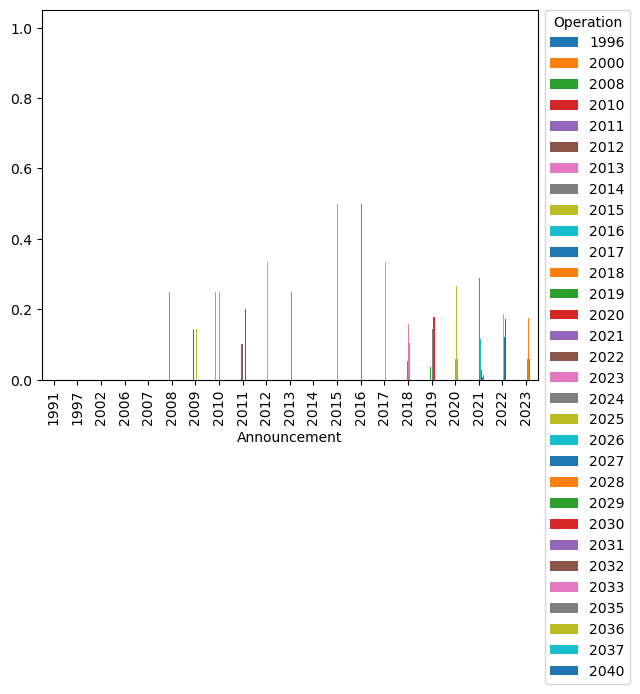

4: Test d'indépendance


Not enough values to run a test



____________ Test #  20   Announcement  vs  Project Status  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Announcement  =  1991  et  Project Status  =  Decommissioned


Project Status  Decommissioned  Operational  Planned  Suspended  \
Announcement                                                      
1991                         0            1        0          0   
1997                         0            1        0          0   
2002                         0            1        0          0   
2006                         0            1        0          0   
2007                         0            1        0          0   
2008                         0            4        0          0   
2009                         1            4        1          1   
2010                         0            2        2          0   
2011                         0            8        2          0   
2012                         0            1        2          0   
2013                         0            1        4          0   
2014                         0            0        1          0   
2015                         0            1        1          0   
2016                         0            2        4          0   
2017                         0            0        6          0   
2018                         0            1       20          0   
2019                         0            1       31          0   
2020                         0            0       45          0   
2021                         0            1      181          0   
2022                         0            0      160          0   
2023                         0            0       37          0   

Project Status  Under construction  
Announcement                        
1991                             0  
1997                             0  
2002                             0  
2006                             0  
2007                             0  
2008                             0  
2009                             0  
2010                             1  
2011                             0  
2012                             0  
2013                             0  
2014                             0  
2015                             0  
2016                             2  
2017                             1  
2018                             1  
2019                             3  
2020                             2  
2021                             8  
2022                             5  
2023                             0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Announcement  =  1991 ;  0.0 % sont des projets tels que  Project Status  =  Decommissioned 
 tandis que Parmi les projets tels que  Announcement  =  1997 ;  0.0 % sont des projets tels que  Project Status  =  Decommissioned


Project Status  Decommissioned  Operational   Planned  Suspended  \
Announcement                                                       
1991                  0.000000     1.000000  0.000000   0.000000   
1997                  0.000000     1.000000  0.000000   0.000000   
2002                  0.000000     1.000000  0.000000   0.000000   
2006                  0.000000     1.000000  0.000000   0.000000   
2007                  0.000000     1.000000  0.000000   0.000000   
2008                  0.000000     1.000000  0.000000   0.000000   
2009                  0.142857     0.571429  0.142857   0.142857   
2010                  0.000000     0.400000  0.400000   0.000000   
2011                  0.000000     0.800000  0.200000   0.000000   
2012                  0.000000     0.333333  0.666667   0.000000   
2013                  0.000000     0.200000  0.800000   0.000000   
2014                  0.000000     0.000000  1.000000   0.000000   
2015                  0.000000     0.500000  0.500000   0.000000   
2016                  0.000000     0.250000  0.500000   0.000000   
2017                  0.000000     0.000000  0.857143   0.000000   
2018                  0.000000     0.045455  0.909091   0.000000   
2019                  0.000000     0.028571  0.885714   0.000000   
2020                  0.000000     0.000000  0.957447   0.000000   
2021                  0.000000     0.005263  0.952632   0.000000   
2022                  0.000000     0.000000  0.969697   0.000000   
2023                  0.000000     0.000000  1.000000   0.000000   

Project Status  Under construction  
Announcement                        
1991                      0.000000  
1997                      0.000000  
2002                      0.000000  
2006                      0.000000  
2007                      0.000000  
2008                      0.000000  
2009                      0.000000  
2010                      0.200000  
2011                      0.000000  
2012                      0.000000  
2013                      0.000000  
2014                      0.000000  
2015                      0.000000  
2016                      0.250000  
2017                      0.142857  
2018                      0.045455  
2019                      0.085714  
2020                      0.042553  
2021                      0.042105  
2022                      0.030303  
2023                      0.000000

3: Histograms to compare distributions 




<Figure size 10500x2500 with 0 Axes>

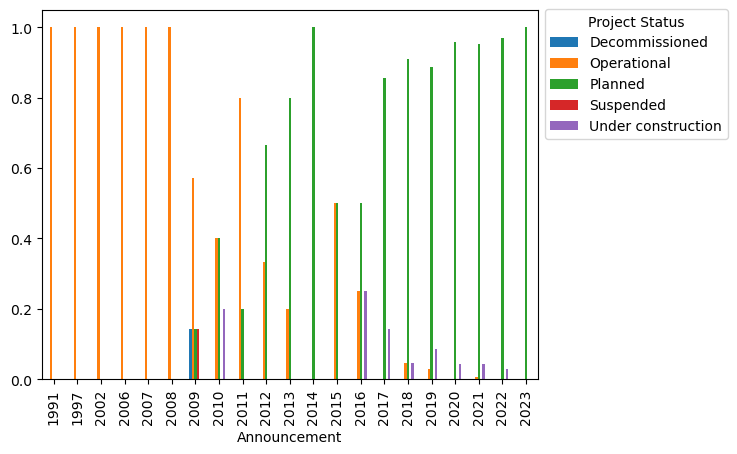

4: Test d'indépendance


Not enough values to run a test



____________ Test #  20   Project Status  vs  Project type  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Project Status  =  Decommissioned  et  Project type  =  CCU


Project type        CCU  Capture  Full chain  Storage  T&S  Transport
Project Status                                                       
Decommissioned        0        0           3        0    0          0
Operational           3        3          33        1    0          7
Planned              26      223          98       51   62         39
Suspended             0        0           1        0    0          0
Under construction    3        8          10        0    2          0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project Status  =  Decommissioned ;  0.0 % sont des projets tels que  Project type  =  CCU 
 tandis que Parmi les projets tels que  Project Status  =  Operational ;  6.382978723404255 % sont des projets tels que  Project type  =  CCU


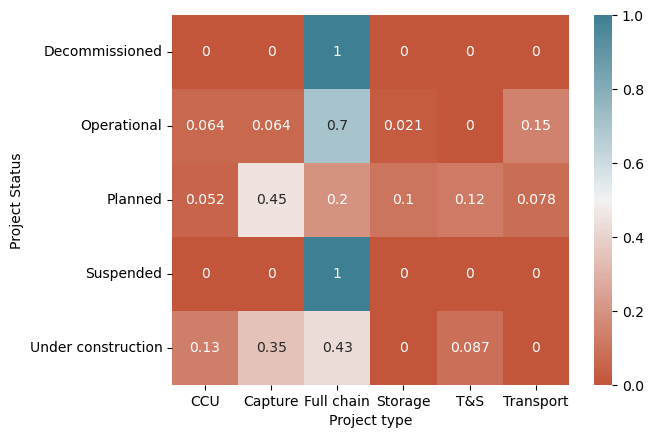

3: Histograms to compare distributions 




<Figure size 2500x3000 with 0 Axes>

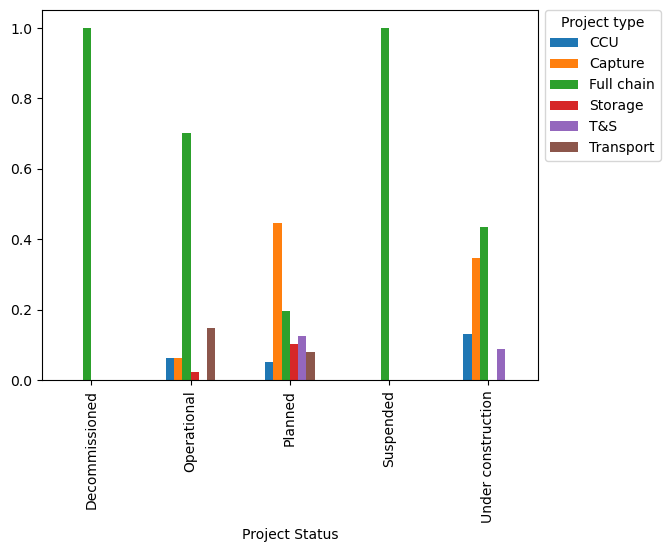

4: Test d'indépendance


Not enough values to run a test



____________ Test #  4   Project Status  vs  Sector  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Project Status  =  Decommissioned  et  Sector  =  Biofuels


Sector              Biofuels  CO2 T&S  CO2 storage  CO2 transport  Cement  \
Project Status                                                              
Decommissioned             1        0            0              0       0   
Operational                4        0            1              7       0   
Planned                   54       64           50             39      26   
Suspended                  0        0            0              0       0   
Under construction         1        2            0              0       1   

Sector              Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Project Status                                                             
Decommissioned                       0                 0               0   
Operational                          1                 1               2   
Planned                             29                69               5   
Suspended                            0                 0               0   
Under construction                   2                 3               0   

Sector              Natural gas processing  Other fuel transformation  \
Project Status                                                          
Decommissioned                           1                          0   
Operational                             14                          7   
Planned                                 29                         33   
Suspended                                0                          0   
Under construction                       6                          1   

Sector              Other industry  Power and heat  
Project Status                                      
Decommissioned                   0               1  
Operational                      7               3  
Planned                         28              73  
Suspended                        0               1  
Under construction               2               5

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project Status  =  Decommissioned ;  33.33333333333333 % sont des projets tels que  Sector  =  Biofuels 
 tandis que Parmi les projets tels que  Project Status  =  Operational ;  8.51063829787234 % sont des projets tels que  Sector  =  Biofuels


Sector              Biofuels   CO2 T&S  CO2 storage  CO2 transport    Cement  \
Project Status                                                                 
Decommissioned      0.333333  0.000000     0.000000       0.000000  0.000000   
Operational         0.085106  0.000000     0.021277       0.148936  0.000000   
Planned             0.108216  0.128257     0.100200       0.078156  0.052104   
Suspended           0.000000  0.000000     0.000000       0.000000  0.000000   
Under construction  0.043478  0.086957     0.000000       0.000000  0.043478   

Sector              Direct Air Capture  Hydrogen/ammonia  Iron and steel  \
Project Status                                                             
Decommissioned                0.000000          0.000000        0.000000   
Operational                   0.021277          0.021277        0.042553   
Planned                       0.058116          0.138277        0.010020   
Suspended                     0.000000          0.000000        0.000000   
Under construction            0.086957          0.130435        0.000000   

Sector              Natural gas processing  Other fuel transformation  \
Project Status                                                          
Decommissioned                    0.333333                   0.000000   
Operational                       0.297872                   0.148936   
Planned                           0.058116                   0.066132   
Suspended                         0.000000                   0.000000   
Under construction                0.260870                   0.043478   

Sector              Other industry  Power and heat  
Project Status                                      
Decommissioned            0.000000        0.333333  
Operational               0.148936        0.063830  
Planned                   0.056112        0.146293  
Suspended                 0.000000        1.000000  
Under construction        0.086957        0.217391

3: Histograms to compare distributions 




<Figure size 2500x6000 with 0 Axes>

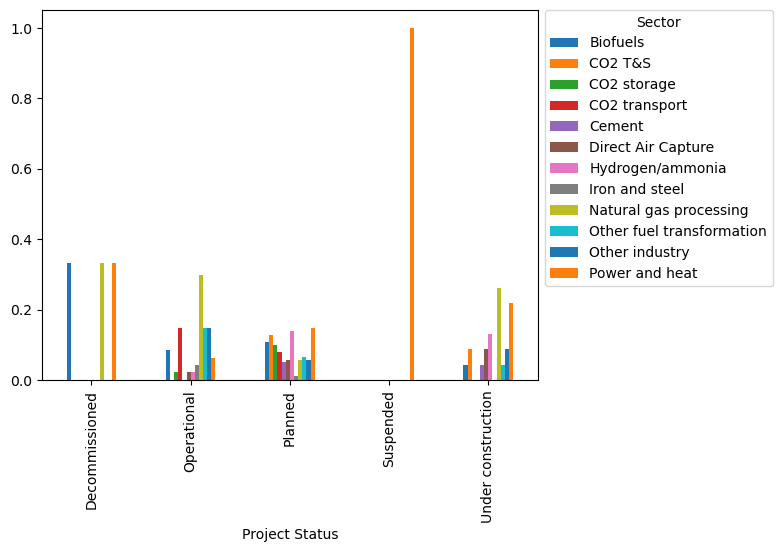

4: Test d'indépendance


Not enough values to run a test



____________ Test #  4   Project Status  vs  Fate of carbon  ______________


1.: Counts


A lire de la façon suivante:  2  projets sont tels que  Project Status  =  Decommissioned  et  Fate of carbon  =  Dedicated storage


Fate of carbon      Dedicated storage  EOR  EOR and use  Mixed  Storage  \
Project Status                                                            
Decommissioned                      2    1            0      0        0   
Operational                         9   26            0      0        0   
Planned                           328   30            1      0        1   
Suspended                           0    1            0      0        0   
Under construction                 13    3            0      1        0   

Fate of carbon      Unknown/unspecified  Use  Use and EOR  Use and storage  
Project Status                                                              
Decommissioned                        0    0            0                0  
Operational                           1    3            1                0  
Planned                              69   28            0                2  
Suspended                             0    0            0                0  
Under construction                    3    3            0                0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project Status  =  Decommissioned ;  66.66666666666666 % sont des projets tels que  Fate of carbon  =  Dedicated storage 
 tandis que Parmi les projets tels que  Project Status  =  Operational ;  22.5 % sont des projets tels que  Fate of carbon  =  Dedicated storage


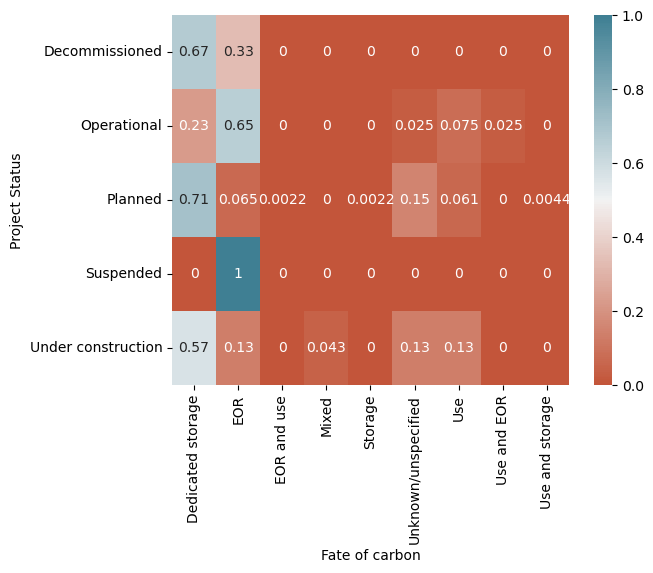

3: Histograms to compare distributions 




<Figure size 2500x4500 with 0 Axes>

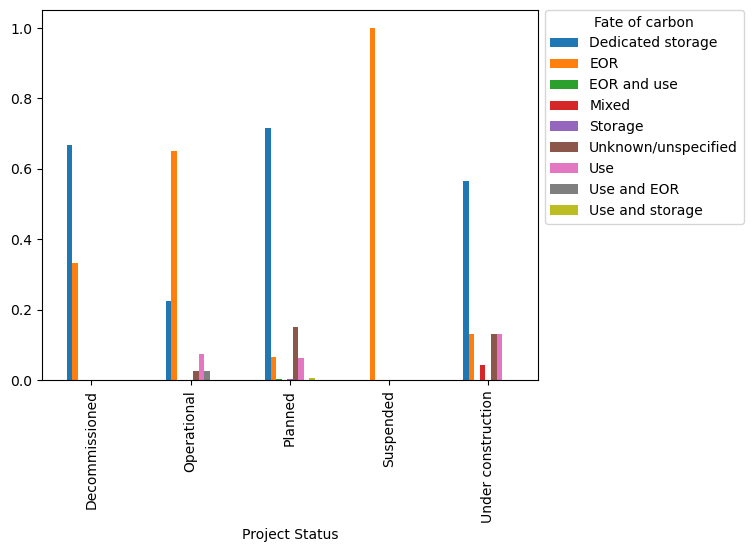

4: Test d'indépendance


Not enough values to run a test



____________ Test #  4   Project Status  vs  Region  ______________


1.: Counts


A lire de la façon suivante:  1  projets sont tels que  Project Status  =  Decommissioned  et  Region  =  Africa


Region              Africa  Asia  Asia Pacific  Europe  \
Project Status                                           
Decommissioned           1     0             0       0   
Operational              0     8             1       6   
Planned                  1    27            39     204   
Suspended                0     0             0       0   
Under construction       0     4             4       6   

Region              Europe + North America  Middle East  North America  \
Project Status                                                           
Decommissioned                           0            0              2   
Operational                              0            3             28   
Planned                                  1           10            211   
Suspended                                0            0              1   
Under construction                       0            1              8   

Region              South America  
Project Status                     
Decommissioned                  0  
Operational                     1  
Planned                         4  
Suspended                       0  
Under construction              0

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project Status  =  Decommissioned ;  33.33333333333333 % sont des projets tels que  Region  =  Africa 
 tandis que Parmi les projets tels que  Project Status  =  Operational ;  0.0 % sont des projets tels que  Region  =  Africa


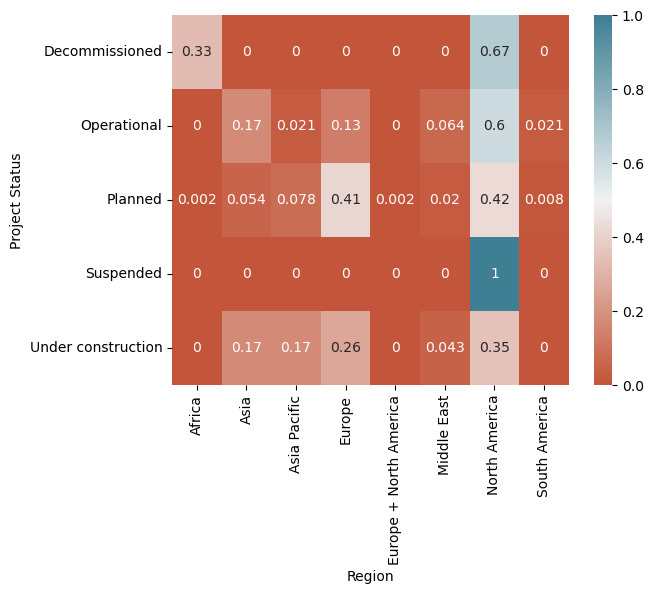

3: Histograms to compare distributions 




<Figure size 2500x4000 with 0 Axes>

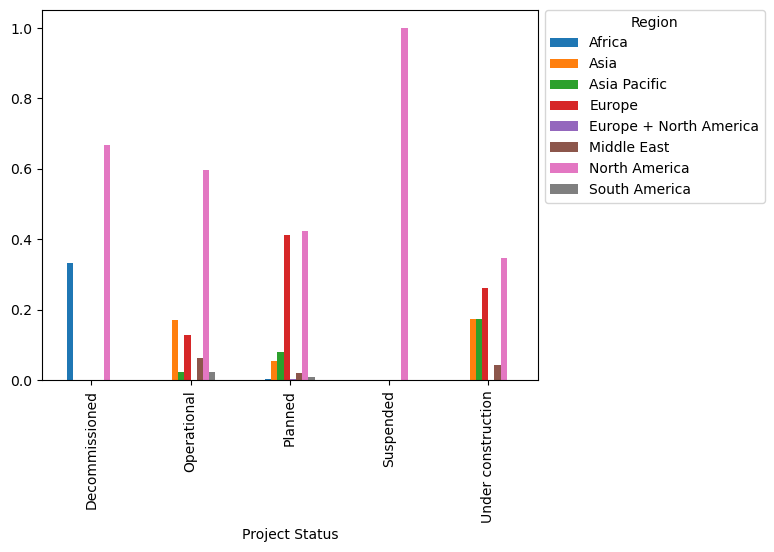

4: Test d'indépendance


Not enough values to run a test



____________ Test #  4   Project Status  vs  Operation  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Project Status  =  Decommissioned  et  Operation  =  1972


Operation           1972  1982  1983  1986  1992  1996  1997  2000  2001  \
Project Status                                                             
Decommissioned         0     0     0     0     0     0     0     0     0   
Operational            1     1     1     1     1     1     1     1     1   
Planned                0     0     0     0     0     0     0     0     0   
Suspended              0     0     0     0     0     0     0     0     0   
Under construction     0     0     0     0     0     0     0     0     0   

Operation           2003  ...  2028  2029  2030  2031  2032  2033  2035  2036  \
Project Status            ...                                                   
Decommissioned         0  ...     0     0     0     0     0     0     0     0   
Operational            1  ...     0     0     0     0     0     0     0     0   
Planned                0  ...    27     9    54     5     4     1     6     1   
Suspended              0  ...     0     0     0     0     0     0     0     0   
Under construction     0  ...     0     0     0     0     0     0     0     0   

Operation           2037  2040  
Project Status                  
Decommissioned         0     0  
Operational            0     0  
Planned                1     2  
Suspended              0     0  
Under construction     0     0  

[5 rows x 42 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project Status  =  Decommissioned ;  0.0 % sont des projets tels que  Operation  =  1972 
 tandis que Parmi les projets tels que  Project Status  =  Operational ;  2.127659574468085 % sont des projets tels que  Operation  =  1972


Operation               1972      1982      1983      1986      1992  \
Project Status                                                         
Decommissioned      0.000000  0.000000  0.000000  0.000000  0.000000   
Operational         0.021277  0.021277  0.021277  0.021277  0.021277   
Planned             0.000000  0.000000  0.000000  0.000000  0.000000   
Suspended           0.000000  0.000000  0.000000  0.000000  0.000000   
Under construction  0.000000  0.000000  0.000000  0.000000  0.000000   

Operation               1996      1997      2000      2001      2003  ...  \
Project Status                                                        ...   
Decommissioned      0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Operational         0.021277  0.021277  0.021277  0.021277  0.021277  ...   
Planned             0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Suspended           0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Under construction  0.000000  0.000000  0.000000  0.000000  0.000000  ...   

Operation               2028      2029      2030      2031      2032  \
Project Status                                                         
Decommissioned      0.000000  0.000000  0.000000  0.000000  0.000000   
Operational         0.000000  0.000000  0.000000  0.000000  0.000000   
Planned             0.085714  0.028571  0.171429  0.015873  0.012698   
Suspended           0.000000  0.000000  0.000000  0.000000  0.000000   
Under construction  0.000000  0.000000  0.000000  0.000000  0.000000   

Operation               2033      2035      2036      2037      2040  
Project Status                                                        
Decommissioned      0.000000  0.000000  0.000000  0.000000  0.000000  
Operational         0.000000  0.000000  0.000000  0.000000  0.000000  
Planned             0.003175  0.019048  0.003175  0.003175  0.006349  
Suspended           0.000000  0.000000  0.000000  0.000000  0.000000  
Under construction  0.000000  0.000000  0.000000  0.000000  0.000000  

[5 rows x 42 columns]

3: Histograms to compare distributions 




<Figure size 2500x21000 with 0 Axes>

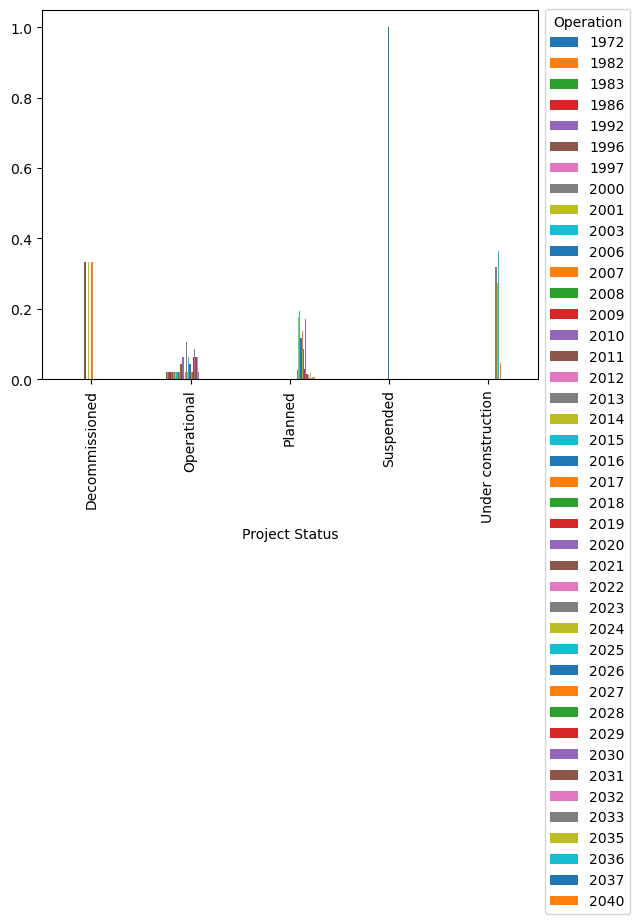

4: Test d'indépendance


Not enough values to run a test



____________ Test #  4   Project Status  vs  Announcement  ______________


1.: Counts


A lire de la façon suivante:  0  projets sont tels que  Project Status  =  Decommissioned  et  Announcement  =  1991


Announcement        1991  1997  2002  2006  2007  2008  2009  2010  2011  \
Project Status                                                             
Decommissioned         0     0     0     0     0     0     1     0     0   
Operational            1     1     1     1     1     4     4     2     8   
Planned                0     0     0     0     0     0     1     2     2   
Suspended              0     0     0     0     0     0     1     0     0   
Under construction     0     0     0     0     0     0     0     1     0   

Announcement        2012  ...  2014  2015  2016  2017  2018  2019  2020  2021  \
Project Status            ...                                                   
Decommissioned         0  ...     0     0     0     0     0     0     0     0   
Operational            1  ...     0     1     2     0     1     1     0     1   
Planned                2  ...     1     1     4     6    20    31    45   181   
Suspended              0  ...     0     0     0     0     0     0     0     0   
Under construction     0  ...     0     0     2     1     1     3     2     8   

Announcement        2022  2023  
Project Status                  
Decommissioned         0     0  
Operational            0     0  
Planned              160    37  
Suspended              0     0  
Under construction     5     0  

[5 rows x 21 columns]

2: Percentages


A lire de la façon suivante:  Parmi les projets tels que  Project Status  =  Decommissioned ;  0.0 % sont des projets tels que  Announcement  =  1991 
 tandis que Parmi les projets tels que  Project Status  =  Operational ;  3.225806451612903 % sont des projets tels que  Announcement  =  1991


Announcement            1991      1997      2002      2006      2007  \
Project Status                                                         
Decommissioned      0.000000  0.000000  0.000000  0.000000  0.000000   
Operational         0.032258  0.032258  0.032258  0.032258  0.032258   
Planned             0.000000  0.000000  0.000000  0.000000  0.000000   
Suspended           0.000000  0.000000  0.000000  0.000000  0.000000   
Under construction  0.000000  0.000000  0.000000  0.000000  0.000000   

Announcement            2008      2009      2010      2011      2012  ...  \
Project Status                                                        ...   
Decommissioned      0.000000  1.000000  0.000000  0.000000  0.000000  ...   
Operational         0.129032  0.129032  0.064516  0.258065  0.032258  ...   
Planned             0.000000  0.002012  0.004024  0.004024  0.004024  ...   
Suspended           0.000000  1.000000  0.000000  0.000000  0.000000  ...   
Under construction  0.000000  0.000000  0.043478  0.000000  0.000000  ...   

Announcement            2014      2015      2016      2017      2018  \
Project Status                                                         
Decommissioned      0.000000  0.000000  0.000000  0.000000  0.000000   
Operational         0.000000  0.032258  0.064516  0.000000  0.032258   
Planned             0.002012  0.002012  0.008048  0.012072  0.040241   
Suspended           0.000000  0.000000  0.000000  0.000000  0.000000   
Under construction  0.000000  0.000000  0.086957  0.043478  0.043478   

Announcement            2019      2020      2021      2022      2023  
Project Status                                                        
Decommissioned      0.000000  0.000000  0.000000  0.000000  0.000000  
Operational         0.032258  0.000000  0.032258  0.000000  0.000000  
Planned             0.062374  0.090543  0.364185  0.321932  0.074447  
Suspended           0.000000  0.000000  0.000000  0.000000  0.000000  
Under construction  0.130435  0.086957  0.347826  0.217391  0.000000  

[5 rows x 21 columns]

3: Histograms to compare distributions 




<Figure size 2500x10500 with 0 Axes>

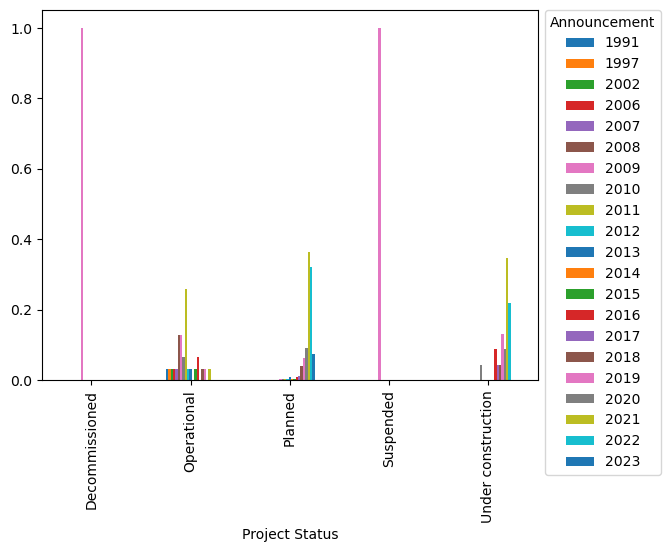

4: Test d'indépendance


Not enough values to run a test





In [9]:
to_run = ["OG_01", "Project type", "Sector", "Fate of carbon", "Region" , "Operation", "Announcement", "Project Status"]
#to_run = ["OG_01", "Region"]

i = 1

for index_1 in range(len(to_run)):
    
    
    
    
    for index_2 in range(1, len(to_run)):
        
        if(index_1 == index_2) : continue
            
            
        name1 = to_run[index_1]
        name2 = to_run[index_2]
        print("____________ Test # ", i, " ", name1, " vs ", name2, " ______________\n\n")
        print("1.: Counts\n\n")
        crosstab_counts = pd.crosstab(df_iea[name1], df_iea[name2])
        values1 = crosstab_counts.index
        values2 = crosstab_counts.columns
        print('A lire de la façon suivante: ', crosstab_counts.iloc[0,0], " projets sont tels que ", name1, " = ", values1[0], " et ", name2, " = ", values2[0])
        display(crosstab_counts)
        print("2: Percentages\n\n")
        crosstab_percentages = pd.crosstab(df_iea[name1], df_iea[name2], normalize = "index")
        values1 = crosstab_percentages.index
        values2 = crosstab_percentages.columns
        print('A lire de la façon suivante: ',
              "Parmi les projets tels que ", name1, " = ", values1[0], "; ", crosstab_percentages.iloc[0,0] * 100, "% sont des projets tels que ", name2, " = ", values2[0], 
              "\n tandis que",
              "Parmi les projets tels que ", name1, " = ", values1[1], "; ", crosstab_percentages.iloc[1,0] * 100, "% sont des projets tels que ", name2, " = ", values2[0]) 
        #figure(figsize = (crosstab_counts.shape[0] * 5, crosstab_counts.shape[1] * 5))
        
        if crosstab_percentages.shape[0] > 10 or crosstab_percentages.shape[1] > 10:
            display(crosstab_percentages)
        else:
            figure()
            sns.heatmap(crosstab_percentages, annot = True, cmap = sns.diverging_palette(20, 220, n=200))
            show()
        print("3: Histograms to compare distributions \n\n")
        figure(figsize = (crosstab_percentages.shape[0] * 5, crosstab_percentages.shape[1] * 5))
        stacked = crosstab_percentages.stack().reset_index()
#         ax = crosstab_percentages.plot(kind = "bar", stacked = True)
#         ax.legend(title = name1, loc = "upper right", bbox_to_anchor=(1, 1.2))
#         for c in ax.containers:
#             ax.bar_label(c, label_type='center')
        ax = crosstab_percentages.plot.bar()
        ax.legend(title = name2, bbox_to_anchor=(1, 1.02), loc = "upper left")
        show(ax)
        
        
        
        crosstab_counts2 = crosstab_counts.values
        #print(crosstab_counts2)
        issues = crosstab_counts2 >= 5
        issues2 = issues[0,:]
        for i in range(1, issues.shape[0]):
            issues2 *= issues[i,:]
        crosstab_counts3 = crosstab_counts2[:, issues2]
        #print(crosstab_counts3)
        print("4: Test d'indépendance\n\n")
        if(crosstab_counts3.size != 0):
            test_value = stats.chi2_contingency(crosstab_counts3)
            print("Running Tests using answers: ", crosstab_counts.columns[issues2])
            print("Test Statistic Value: ", around(test_value[0], 2))
            print("Test P-Value: ", test_value[1] * 100, "%")
            if test_value[1] >= 5/100 :
                print("Conclusion: we cannot reject the hypothesis of independance between ", name1, "and ", name2, 
                      ", that is to say any difference noticed in the distributions of ", name1, " according to ", name2,
                      " may be due to statistical coincidence")
            else:
                 print("Conclusion: we reject the hypothesis of independance between ", name1, "and ", name2, 
                      "that is to say with probability 95% or more, there is at least one value of ", name1, " that impacts significantly ", name2)
        else : 
            print("Not enough values to run a test")
        print("\n\n")
        

### Capacity

#### 1. Capacity by region

D'abord somme de toutes les capacités annoncées par région

In [10]:
capacity_region_df = df_iea[["Region", "Announced capacity (low) (Mt CO2/yr)", "Announced capacity (high) (Mt CO2/yr)"]]

capacity_region_df.groupby("Region").sum()

Announced capacity (low) (Mt CO2/yr)  \
Region                                                         
Africa                                              1.500000   
Asia                                               24.660000   
Asia Pacific                                       72.393793   
Europe                                            520.704500   
Europe + North America                             10.000000   
Middle East                                        19.801000   
North America                                     441.296117   
South America                                       4.530000   

                        Announced capacity (high) (Mt CO2/yr)  
Region                                                         
Africa                                               1.500000  
Asia                                                26.140000  
Asia Pacific                                        83.983793  
Europe                                             564.824500  
Europe + North America                              10.000000  
Middle East                                         19.801000  
North America                                      466.841017  
South America                                       10.230000

Regardons maintenant la dispersion des capacités par région min et max par région

Ce type de graphe en français s'appelle "boîte à moustache" :)

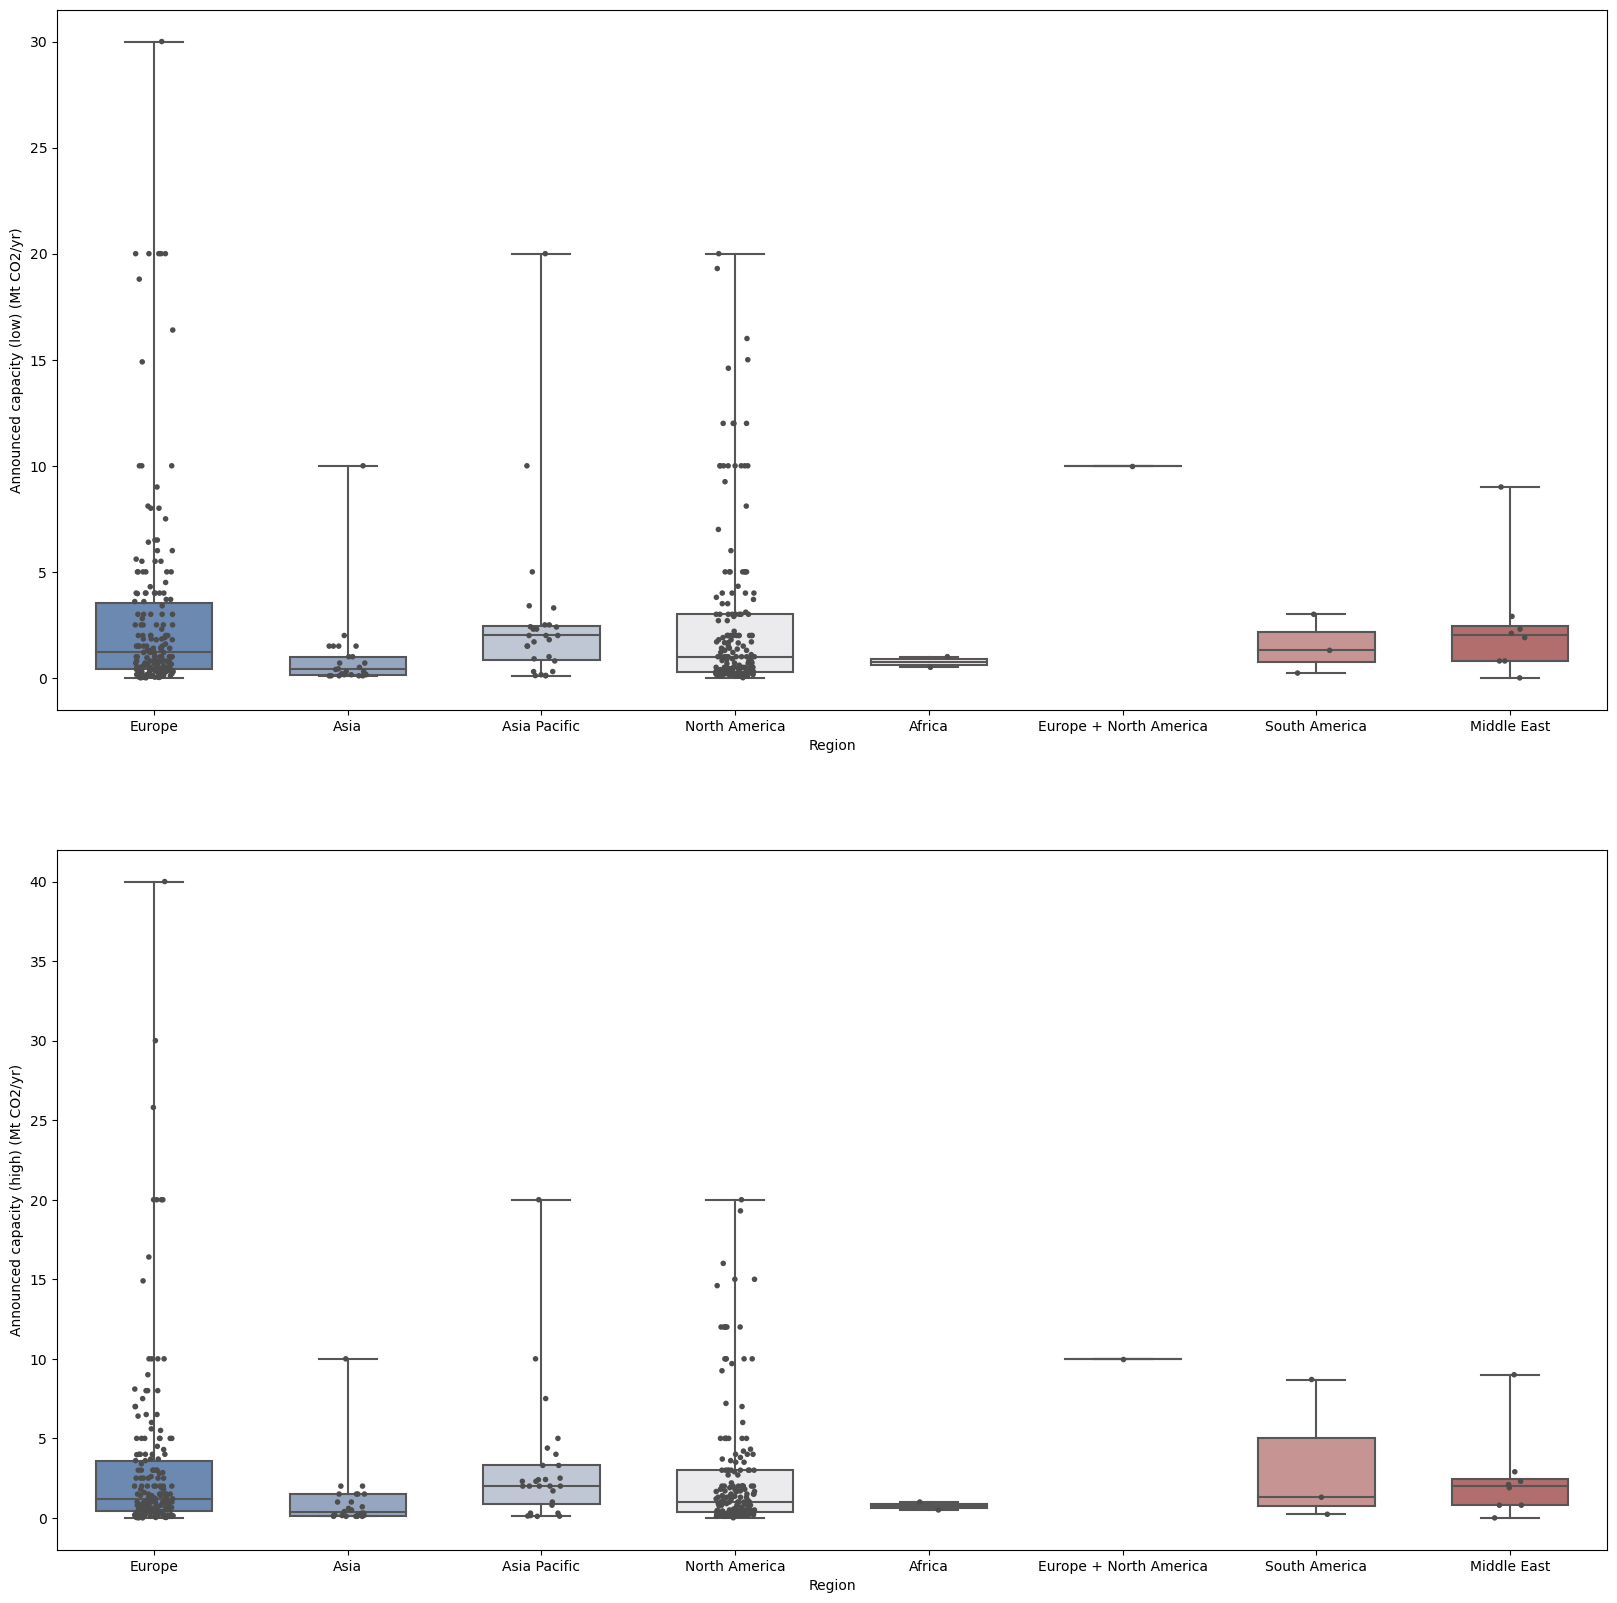

In [11]:
figure(figsize = (20, 20))
ax1 = subplot(211)
# Plot the orbital period with horizontal boxes
sns.boxplot(x = "Region", y = "Announced capacity (low) (Mt CO2/yr)", data=capacity_region_df, whis=[0, 100], width=.6, palette="vlag", ax = ax1)
# Add in points to show each observation
sns.stripplot(x = "Region", y = "Announced capacity (low) (Mt CO2/yr)", data=capacity_region_df, size=4, color=".3", linewidth=0, ax = ax1)
ax2 = subplot(212)
# Plot the orbital period with horizontal boxes
sns.boxplot(x = "Region", y = "Announced capacity (high) (Mt CO2/yr)", data=capacity_region_df, whis=[0, 100], width=.6, palette="vlag", ax = ax2)
# Add in points to show each observation
sns.stripplot(x = "Region", y = "Announced capacity (high) (Mt CO2/yr)", data=capacity_region_df, size=4, color=".3", linewidth=0, ax = ax2)

show()

#### Capacity per year

In [12]:
capacity_region_df = df_iea[["Announcement", "OG_01", "Announced capacity (low) (Mt CO2/yr)", "Announced capacity (high) (Mt CO2/yr)"]]

capacity_OG = capacity_region_df.loc[capacity_region_df["OG_01"] == 1].drop(["OG_01"], axis = 1).sort_values("Announcement")
capacity_nOG = capacity_region_df.loc[capacity_region_df["OG_01"] == 0].drop(["OG_01"], axis = 1).sort_values("Announcement")




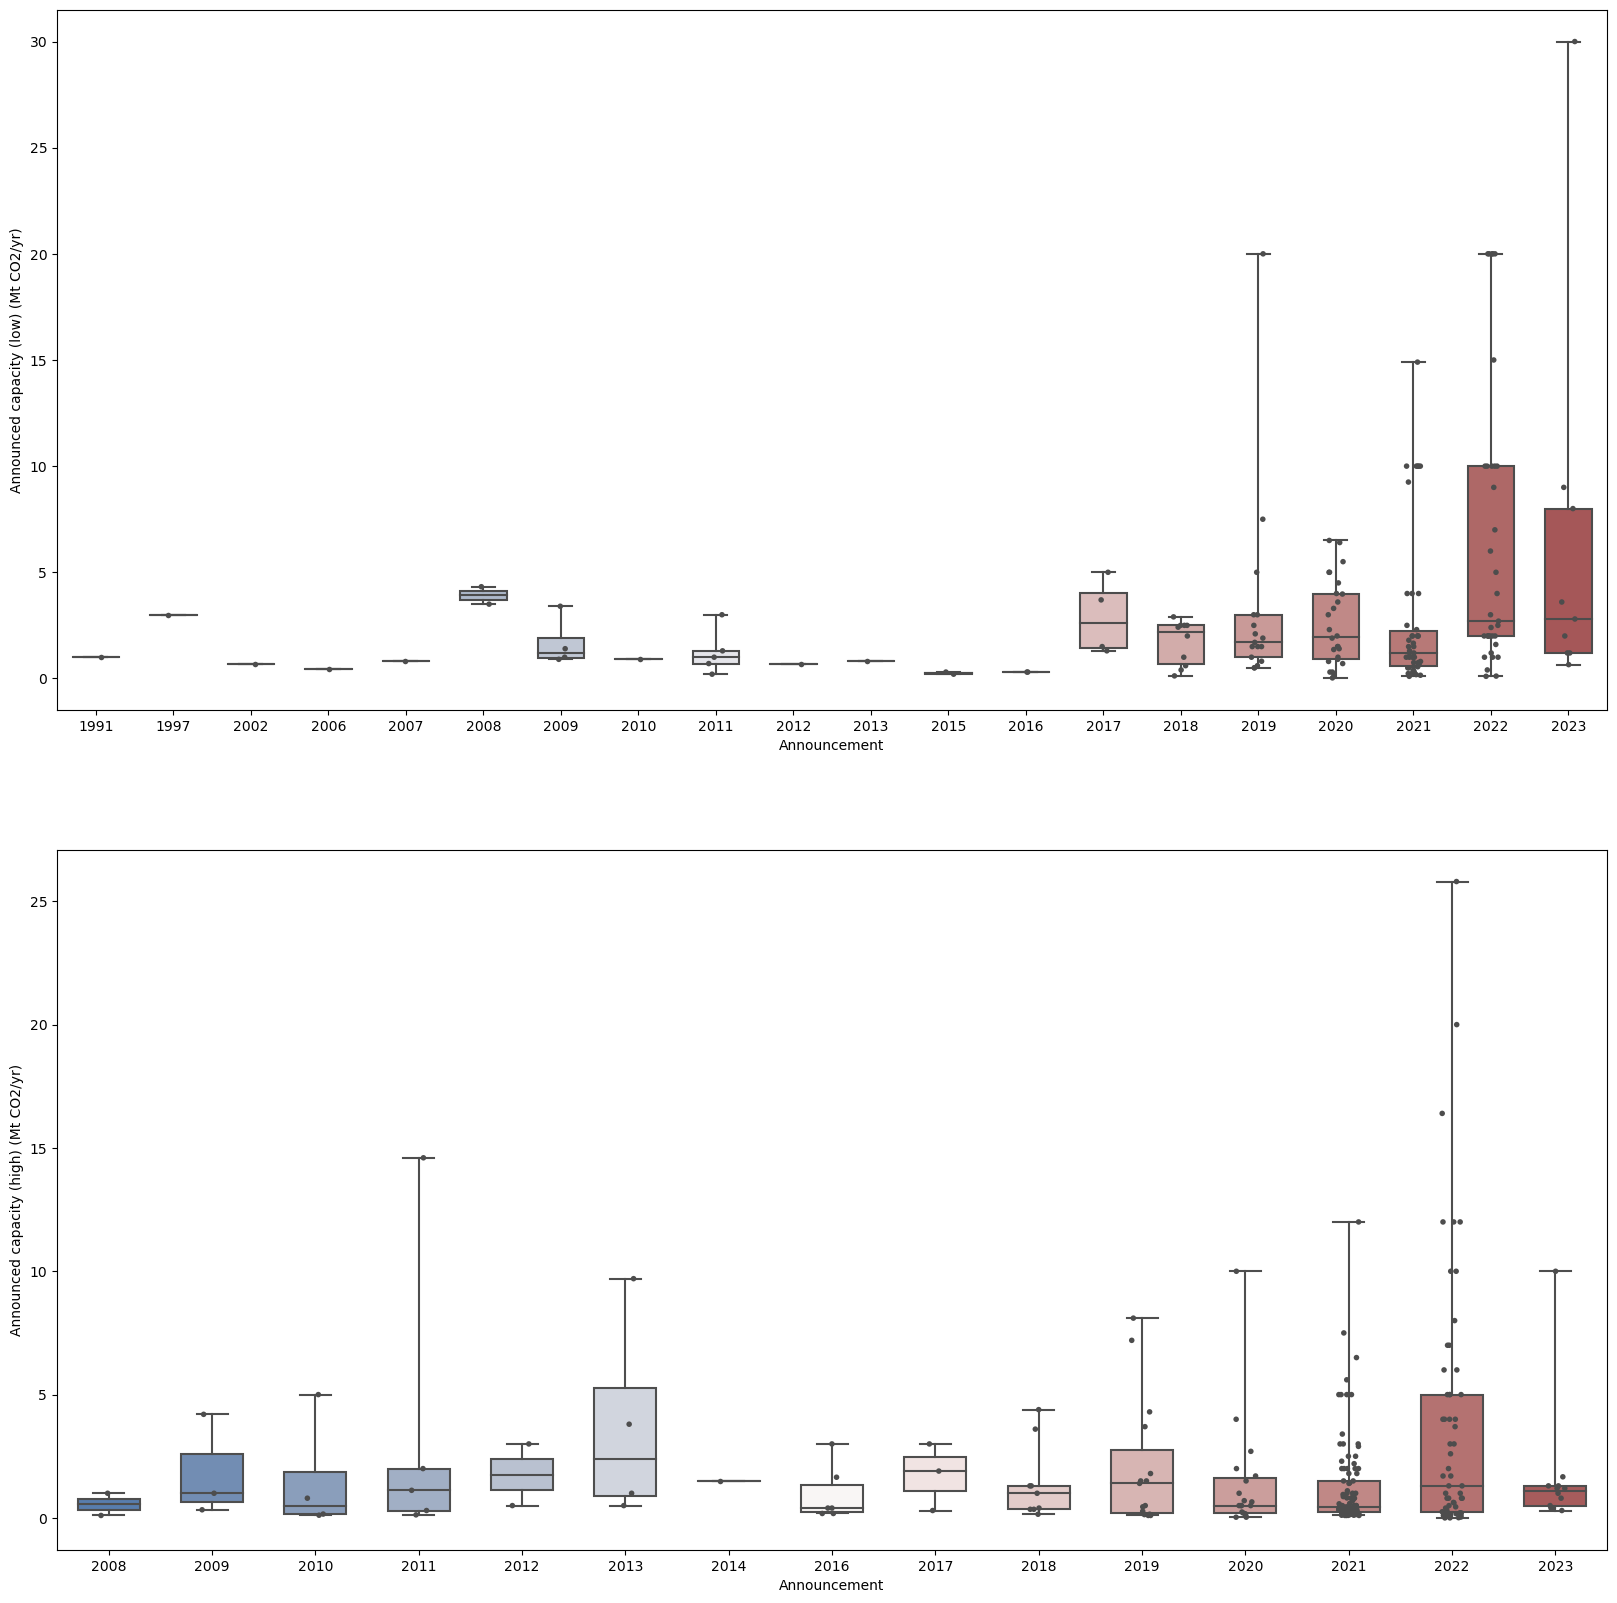

In [13]:
figure(figsize = (20, 20))
ax1 = subplot(211)
# Plot the orbital period with horizontal boxes
sns.boxplot(x = "Announcement", y = "Announced capacity (low) (Mt CO2/yr)", data=capacity_OG, whis=[0, 100], width=.6, palette="vlag", ax = ax1)
# Add in points to show each observation
sns.stripplot(x = "Announcement", y = "Announced capacity (low) (Mt CO2/yr)", data=capacity_OG, size=4, color=".3", linewidth=0, ax = ax1)
ax2 = subplot(212)
# Plot the orbital period with horizontal boxes
sns.boxplot(x = "Announcement", y = "Announced capacity (high) (Mt CO2/yr)", data=capacity_nOG, whis=[0, 100], width=.6, palette="vlag", ax = ax2)
# Add in points to show each observation
sns.stripplot(x = "Announcement", y = "Announced capacity (high) (Mt CO2/yr)", data=capacity_nOG, size=4, color=".3", linewidth=0, ax = ax2)

show()

In [14]:
capacity_region_matrix = capacity_region_df.fillna(0)
capacity_region_matrix["Announcement"] = capacity_region_matrix["Announcement"].astype("int")

announcements = arange(1991, 2024)
OG_capacity_low = list()
OG_capacity_high = list()
OG_capacity_med = list()

for year in announcements:
    tmp = capacity_region_matrix.loc[logical_and(capacity_region_df["OG_01"] == 1, 
                                                 capacity_region_matrix["Announcement"] == year)]
    #print(capacity_region_matrix["Announcement"].dtype)
    capacity_low = sum(tmp["Announced capacity (low) (Mt CO2/yr)"])
    capacity_high = sum(tmp["Announced capacity (high) (Mt CO2/yr)"])
    capacity_med = (capacity_low + capacity_high)/2
    OG_capacity_low.append(capacity_low)
    OG_capacity_high.append(capacity_high)
    OG_capacity_med.append(capacity_med)
    
    
OG_capacity_low_cum = cumsum(OG_capacity_low)
OG_capacity_high_cum = cumsum(OG_capacity_low)
OG_capacity_med_cum = cumsum(OG_capacity_med)


capacity_OG = pd.DataFrame({"Announcement" : announcements,
                            "Announced capacity (low) (Mt CO2/yr)" : OG_capacity_low, 
                            "Announced capacity (median) (Mt CO2/yr)" : OG_capacity_med,
                            "Announced capacity (high) (Mt CO2/yr)" : OG_capacity_high,
                            "Cumulated Announced capacity (low) (Mt CO2/yr)" : OG_capacity_low_cum,
                            "Cumulated Announced capacity (median) (Mt CO2/yr)" : OG_capacity_med_cum,
                            "Cumulated Announced capacity (high) (Mt CO2/yr)" : OG_capacity_high_cum})

capacity_OG

Announcement  Announced capacity (low) (Mt CO2/yr)  \
0           1991                              1.000000   
1           1992                              0.000000   
2           1993                              0.000000   
3           1994                              0.000000   
4           1995                              0.000000   
5           1996                              0.000000   
6           1997                              3.000000   
7           1998                              0.000000   
8           1999                              0.000000   
9           2000                              0.000000   
10          2001                              0.000000   
11          2002                              0.700000   
12          2003                              0.000000   
13          2004                              0.000000   
14          2005                              0.000000   
15          2006                              0.430000   
16          2007                              0.800000   
17          2008                              7.820000   
18          2009                              6.700000   
19          2010                              0.900000   
20          2011                              6.200000   
21          2012                              0.700000   
22          2013                              0.800000   
23          2014                              0.000000   
24          2015                              0.500000   
25          2016                              0.600000   
26          2017                             11.500000   
27          2018                             16.933793   
28          2019                             54.610000   
29          2020                             66.911450   
30          2021                            123.680000   
31          2022                            227.010000   
32          2023                             58.450000   

    Announced capacity (median) (Mt CO2/yr)  \
0                                  1.000000   
1                                  0.000000   
2                                  0.000000   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  3.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.000000   
10                                 0.000000   
11                                 0.700000   
12                                 0.000000   
13                                 0.000000   
14                                 0.000000   
15                                 0.515000   
16                                 0.800000   
17                                 7.820000   
18                                 7.100000   
19                                 0.900000   
20                                 9.700000   
21                                 0.850000   
22                                 0.800000   
23                                 0.000000   
24                                 0.500000   
25                                 0.850000   
26                                11.500000   
27                                16.933793   
28                                54.700000   
29                                68.786450   
30                               129.852500   
31                               241.560000   
32                                58.450000   

    Announced capacity (high) (Mt CO2/yr)  \
0                                1.000000   
1                                0.000000   
2                                0.000000   
3                                0.000000   
4                                0.000000   
5                                0.000000   
6                                3.000000   
7                                0.000000   
8                          

In [15]:
nOG_capacity_low = list()
nOG_capacity_high = list()
nOG_capacity_med = list()

for year in announcements:
    tmp = capacity_region_matrix.loc[logical_and(capacity_region_df["OG_01"] == 0, 
                                                 capacity_region_matrix["Announcement"] == year)]
    #print(capacity_region_matrix["Announcement"].dtype)
    capacity_low = sum(tmp["Announced capacity (low) (Mt CO2/yr)"])
    capacity_high = sum(tmp["Announced capacity (high) (Mt CO2/yr)"])
    capacity_med = (capacity_low + capacity_high)/2
    nOG_capacity_low.append(capacity_low)
    nOG_capacity_high.append(capacity_high)
    nOG_capacity_med.append(capacity_med)
    
    
nOG_capacity_low_cum = cumsum(nOG_capacity_low)
nOG_capacity_high_cum = cumsum(nOG_capacity_low)
nOG_capacity_med_cum = cumsum(nOG_capacity_med)


capacity_nOG = pd.DataFrame({"Announcement" : announcements,
                            "Announced capacity (low) (Mt CO2/yr)" : nOG_capacity_low, 
                            "Announced capacity (median) (Mt CO2/yr)" : nOG_capacity_med,
                            "Announced capacity (high) (Mt CO2/yr)" : nOG_capacity_high,
                            "Cumulated Announced capacity (low) (Mt CO2/yr)" : nOG_capacity_low_cum,
                            "Cumulated Announced capacity (median) (Mt CO2/yr)" : nOG_capacity_med_cum,
                            "Cumulated Announced capacity (high) (Mt CO2/yr)" : nOG_capacity_high_cum})

capacity_nOG

Announcement  Announced capacity (low) (Mt CO2/yr)  \
0           1991                              0.000000   
1           1992                              0.000000   
2           1993                              0.000000   
3           1994                              0.000000   
4           1995                              0.000000   
5           1996                              0.000000   
6           1997                              0.000000   
7           1998                              0.000000   
8           1999                              0.000000   
9           2000                              0.000000   
10          2001                              0.000000   
11          2002                              0.000000   
12          2003                              0.000000   
13          2004                              0.000000   
14          2005                              0.000000   
15          2006                              0.000000   
16          2007                              0.000000   
17          2008                              1.100000   
18          2009                              4.830000   
19          2010                              6.010000   
20          2011                             17.465000   
21          2012                              3.500000   
22          2013                             13.400000   
23          2014                              1.500000   
24          2015                              0.000000   
25          2016                              5.810000   
26          2017                              5.200000   
27          2018                              9.750000   
28          2019                             28.805000   
29          2020                             25.770000   
30          2021                            110.133500   
31          2022                            207.578000   
32          2023                             19.766667   

    Announced capacity (median) (Mt CO2/yr)  \
0                                  0.000000   
1                                  0.000000   
2                                  0.000000   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.000000   
10                                 0.000000   
11                                 0.000000   
12                                 0.000000   
13                                 0.000000   
14                                 0.000000   
15                                 0.000000   
16                                 0.000000   
17                                 1.100000   
18                                 5.180000   
19                                 6.038450   
20                                17.805000   
21                                 3.500000   
22                                14.200000   
23                                 1.500000   
24                                 0.000000   
25                                 5.810000   
26                                 5.200000   
27                                11.295000   
28                                30.005000   
29                                26.395000   
30                               116.480000   
31                               213.228000   
32                                19.916667   

    Announced capacity (high) (Mt CO2/yr)  \
0                                0.000000   
1                                0.000000   
2                                0.000000   
3                                0.000000   
4                                0.000000   
5                                0.000000   
6                                0.000000   
7                                0.000000   
8                          

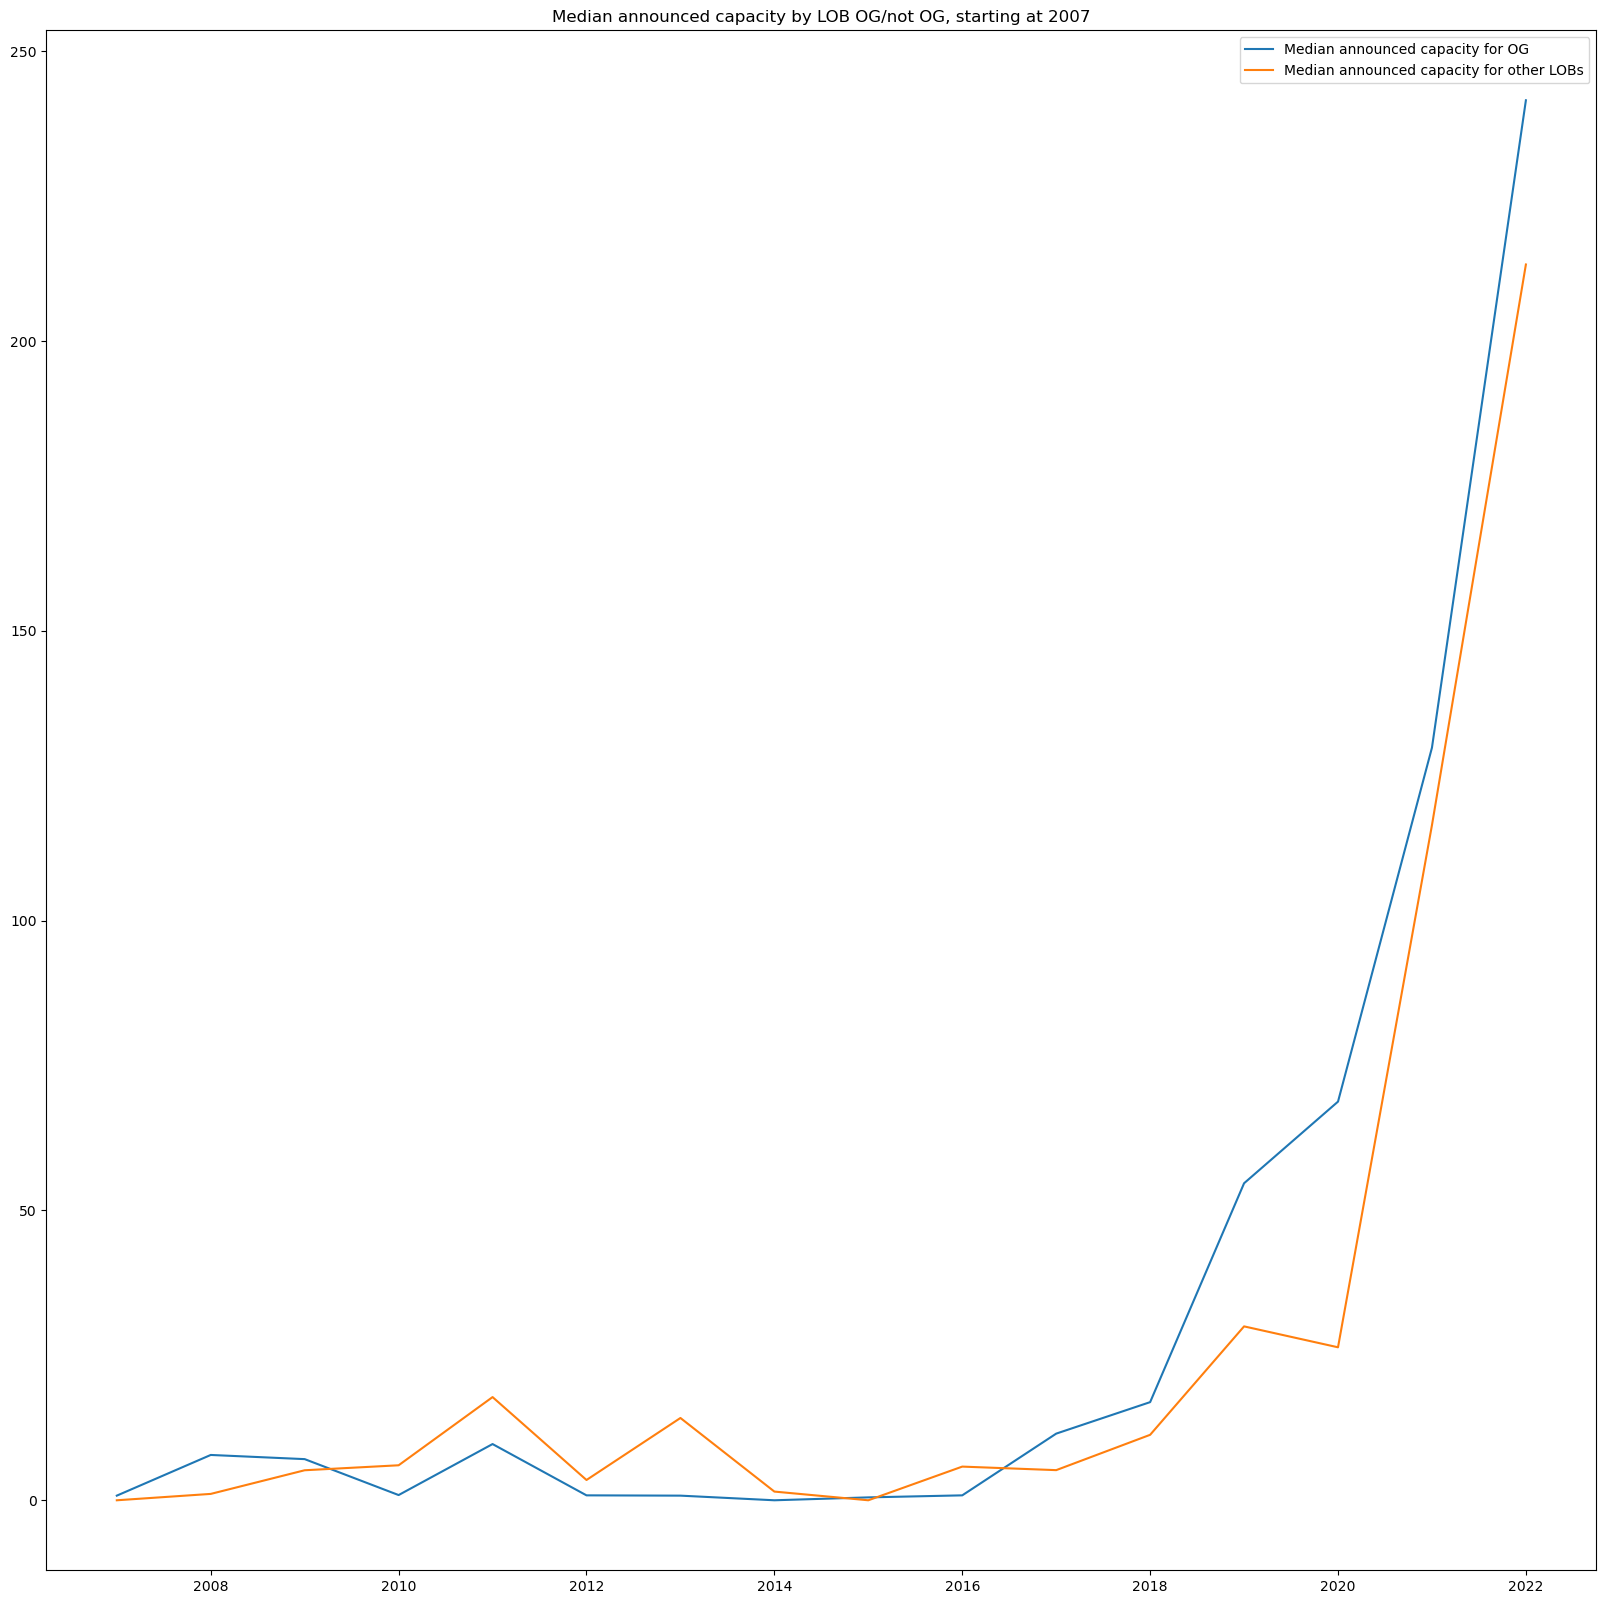

In [16]:


#Starting from 2007
capacity_OG2 = capacity_OG.loc[logical_and(capacity_OG["Announcement"] >= 2007,
                                           capacity_OG["Announcement"] <= 2022)]
capacity_nOG2 = capacity_nOG.loc[logical_and(capacity_nOG["Announcement"] >= 2007,
                                             capacity_nOG["Announcement"] <= 2022)]

figure(figsize = (20,20))
plot(capacity_OG2["Announcement"], capacity_OG2["Announced capacity (median) (Mt CO2/yr)"], 
     label = "Median announced capacity for OG")
plot(capacity_nOG2["Announcement"], capacity_nOG2["Announced capacity (median) (Mt CO2/yr)"], 
     label = "Median announced capacity for other LOBs")

# plot(capacity_OG2["Announcement"], capacity_OG2["Announced capacity (low) (Mt CO2/yr)"], 
#      label = "Lowest announced capacity for OG")
# plot(capacity_OG2["Announcement"], capacity_OG2["Announced capacity (high) (Mt CO2/yr)"], 
#      label = "Highest announced capacity for OG")
# plot(capacity_nOG2["Announcement"], capacity_nOG2["Announced capacity (low) (Mt CO2/yr)"], 
#      label = "Lowest announced capacity for other partners")
# plot(capacity_nOG2["Announcement"], capacity_nOG2["Announced capacity (high) (Mt CO2/yr)"], 
#      label = "Lowest announced capacity for other partners")
legend(["Median announced capacity for OG", "Median announced capacity for other LOBs"])
title("Median announced capacity by LOB OG/not OG, starting at 2007")
show()

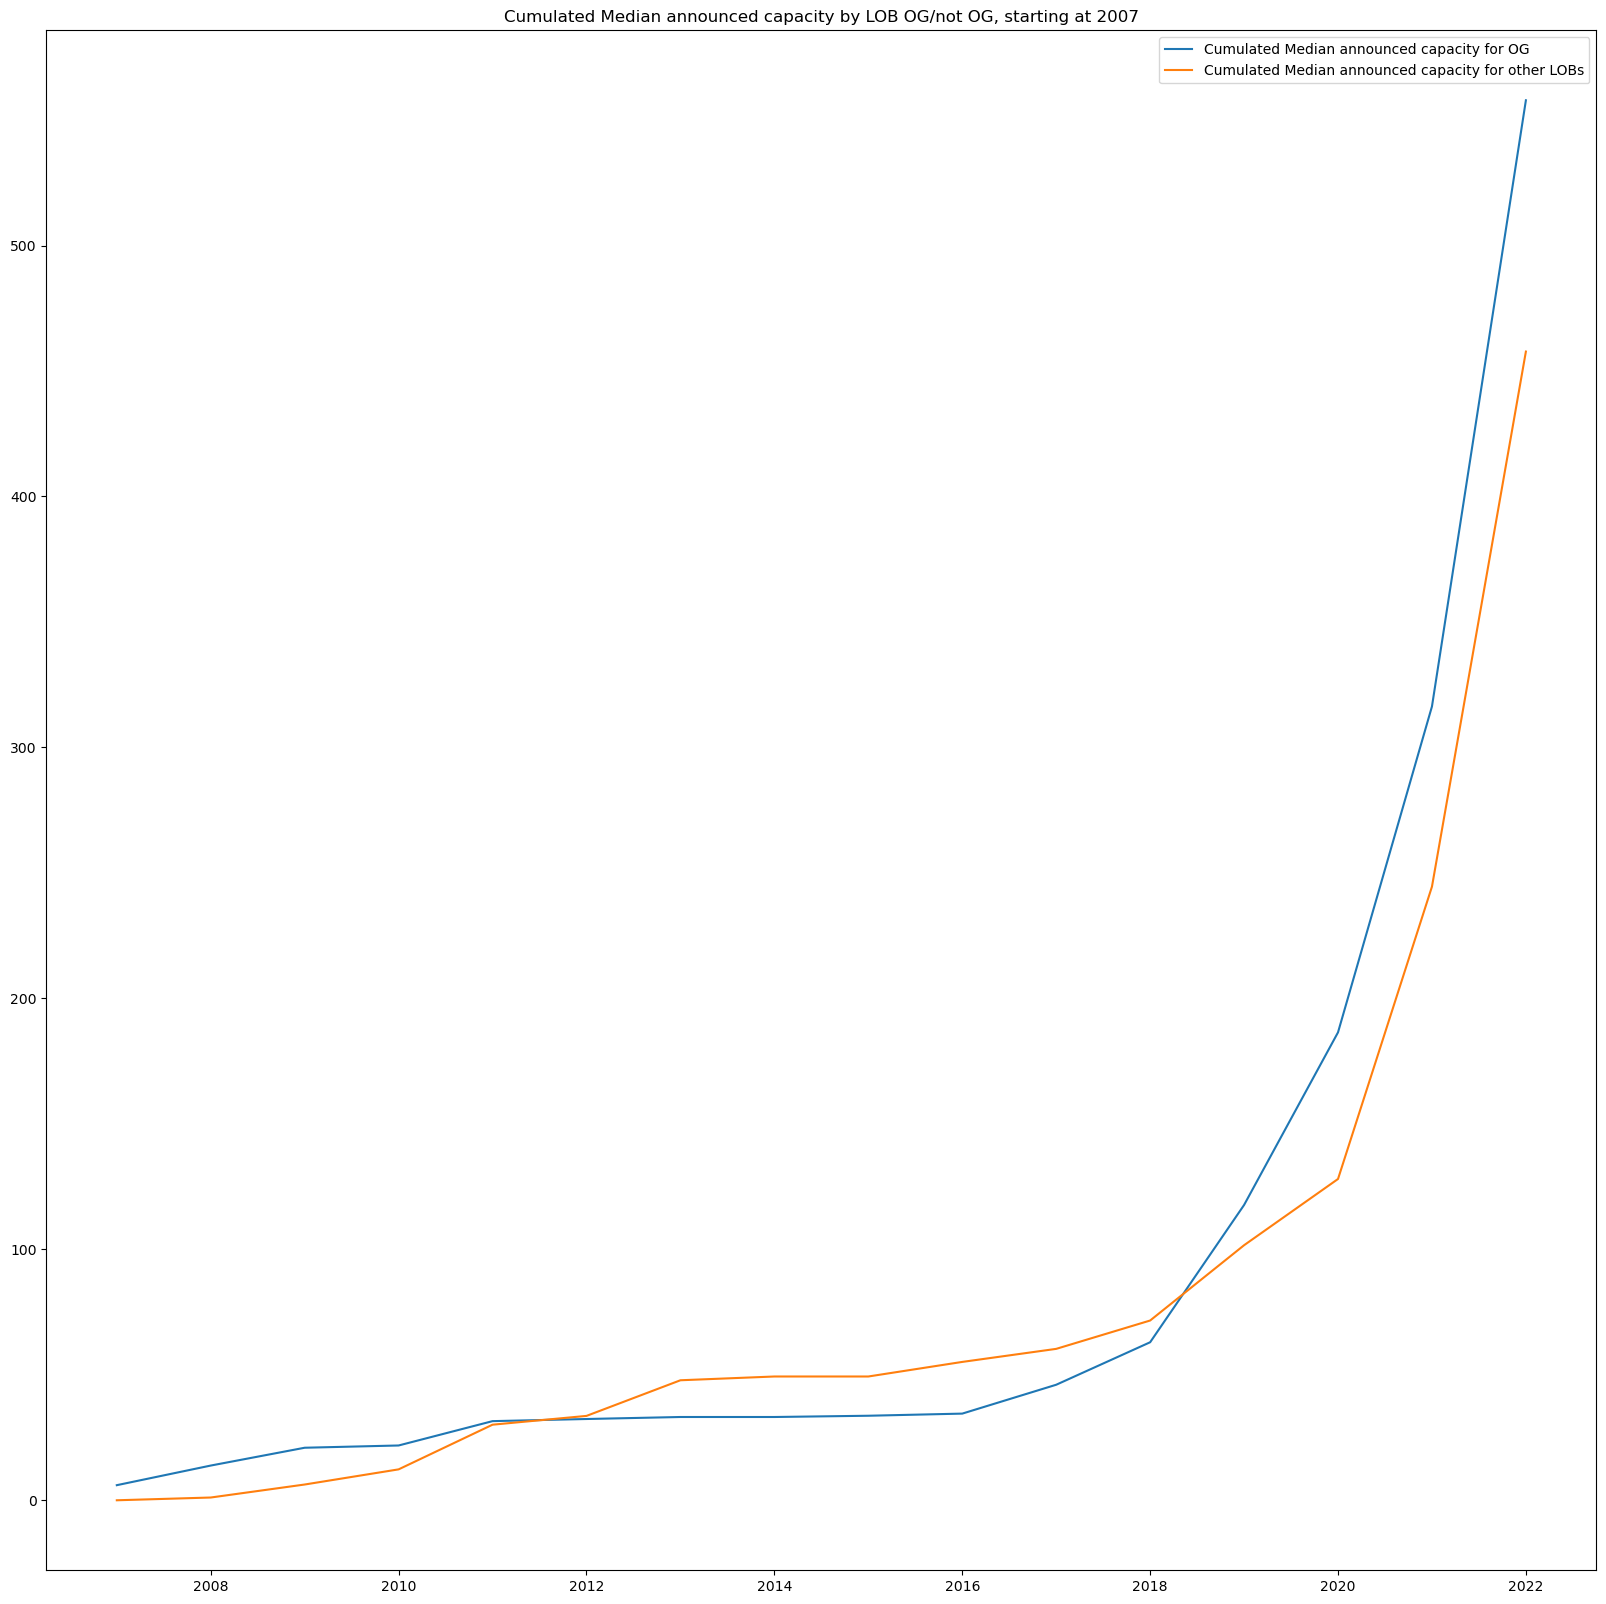

In [17]:
figure(figsize = (20,20))
plot(capacity_OG2["Announcement"], capacity_OG2["Cumulated Announced capacity (median) (Mt CO2/yr)"], 
     label = "Cumulated Median announced capacity for OG")
plot(capacity_nOG2["Announcement"], capacity_nOG2["Cumulated Announced capacity (median) (Mt CO2/yr)"], 
     label = "Cumulated Median announced capacity for other LOBs")

legend(["Cumulated Median announced capacity for OG", "Cumulated Median announced capacity for other LOBs"])
title("Cumulated Median announced capacity by LOB OG/not OG, starting at 2007")
show()

### Etude sur l'intérêt de stocker son CO2 vs émettre du CO2

#### Extraction des données BD IEA

Objectif: Avoir la capcité annoncée médiane par date d'annonce

In [36]:
capacity_df = df_iea[["Announcement", "Announced capacity (low) (Mt CO2/yr)", "Announced capacity (high) (Mt CO2/yr)"]]
capacity_df["Announced capacity (med) (Mt CO2/yr)"] = (df_iea["Announced capacity (low) (Mt CO2/yr)"] + df_iea["Announced capacity (high) (Mt CO2/yr)"])/2
capacity_df = capacity_df.drop(["Announced capacity (low) (Mt CO2/yr)", "Announced capacity (high) (Mt CO2/yr)"], axis = 1)
capacity_df = capacity_df.groupby(["Announcement"]).sum().reset_index()
capacity_df["Announcement"] = capacity_df["Announcement"].astype("int")
capacity_df

C:\Users\louis8613\AppData\Local\Temp\ipykernel_13116\414718159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capacity_df["Announced capacity (med) (Mt CO2/yr)"] = (df_iea["Announced capacity (low) (Mt CO2/yr)"] + df_iea["Announced capacity (high) (Mt CO2/yr)"])/2


Announcement  Announced capacity (med) (Mt CO2/yr)
0           1991                              1.000000
1           1997                              3.000000
2           2002                              0.700000
3           2006                              0.515000
4           2007                              0.800000
5           2008                              8.920000
6           2009                             12.280000
7           2010                              6.938450
8           2011                             27.505000
9           2012                              4.350000
10          2013                             15.000000
11          2014                              1.500000
12          2015                              0.500000
13          2016                              6.660000
14          2017                             16.700000
15          2018                             28.228793
16          2019                             84.705000
17          2020                             95.181450
18          2021                            246.332500
19          2022                            454.788000
20          2023                             78.366667

#### Budget annuel alloué au CCUS

Source: https://www.iea.org/data-and-statistics/charts/annual-venture-capital-investment-in-ccus-projects-and-companies-2015-2022

Taux de conversion euro/dollar
https://www.xe.com/currencyconverter/convert/?Amount=1&From=EUR&To=USD

1 euro = 1.09 dollar au 22/08/2023

In [30]:
euro = 1.09

costs_ccus = pd.read_excel("C:/Users/louis8613/Documents/Analyse_Ambre/CCUS_costs_ww.xlsx",
                           sheet_name = "annual-venture-capital-investme",
                           skiprows = 4)

costs_ccus

year  Project development  Capture  Storage  Utilisation  Total
0  2015                    0       12        0            4     16
1  2016                    0        5        0           42     47
2  2017                   10       12        0            1     23
3  2018                   13       32        0           86    131
4  2019                   18      141        0          154    313
5  2020                   27      137       13           70    247
6  2021                  175      113        9          339    636
7  2022                  907      904        4          484   2299

In [31]:
costs_ccus = costs_ccus.drop(["Project development", "Capture", "Storage", "Utilisation"], axis = 1)
costs_ccus.columns = ["Announcement", "Total in mUSd"]
costs_ccus

Announcement  Total in mUSd
0          2015             16
1          2016             47
2          2017             23
3          2018            131
4          2019            313
5          2020            247
6          2021            636
7          2022           2299

In [37]:
capacity_df = capacity_df.merge(costs_ccus, on = "Announcement")
capacity_df

Announcement  Announced capacity (med) (Mt CO2/yr)  Total in mUSd
0          2015                              0.500000             16
1          2016                              6.660000             47
2          2017                             16.700000             23
3          2018                             28.228793            131
4          2019                             84.705000            313
5          2020                             95.181450            247
6          2021                            246.332500            636
7          2022                            454.788000           2299

In [38]:
capacity_df["Price of CO2 in (EUR/t)"] = (capacity_df["Total in mUSd"]/euro * 1e6)/(capacity_df["Announced capacity (med) (Mt CO2/yr)"] * 1e6) 
capacity_df

Announcement  Announced capacity (med) (Mt CO2/yr)  Total in mUSd  \
0          2015                              0.500000             16   
1          2016                              6.660000             47   
2          2017                             16.700000             23   
3          2018                             28.228793            131   
4          2019                             84.705000            313   
5          2020                             95.181450            247   
6          2021                            246.332500            636   
7          2022                            454.788000           2299   

   Price of CO2 in (EUR/t)  
0                29.357798  
1                 6.474364  
2                 1.263528  
3                 4.257479  
4                 3.390071  
5                 2.380774  
6                 2.368694  
7                 4.637709